In [2]:
import numpy as np 
import os 
import xarray as xr
import pandas as pd

#from scipy.io import savemat
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib as mpl

In [30]:
max_display_options = ['display.max_seq_items', 'display.max_colwidth', 'display.max_dir_items', 'display.max_columns', 'display.max_rows']
for param in range(0,len(max_display_options)):
    pd.set_option(max_display_options[param], None)

In [31]:
pd.set_option('display.max_rows',100)

In [6]:
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_shared/CampaignData_and_Merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.reset_index(inplace=True)
df_alldays.set_index('time_local', inplace=True, drop=False)

In [36]:
# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':False,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':False,
        'APAN_CIMS':False,
        'PPN_CIMS':False,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False,
        'jNO2':True,
        'jBrCl':True,
        'jBr2':True,
        'jCCl4':True,
        'jCH2Oa':True,
        'jCH2Ob':True,
        'jClNO2':True,
        'jClOa':True,
        'jClOb':True,
        'jCl2':True,
        'jHNO2':True,
        'jHNO3':True,
        'jI2':True,
        'jNO3a':True,
        'jNO3b':True,
        'jN2O5':True,
        'jO3':True}
        # 'Time_Start_POPS':False,
        # 'Time_Stop_POPS':False,
        # 'Press_mb_POPS':False,
        # 'Temp_C_POPS':False,
        # 'Aerosol_conc_POPS':False,
        # 'Surface_area_conc_POPS':False,
        # 'Volume_density_POPS':False,
        # 'Effective_radius_POPS':False,
        # 'Extinction_POPS':False,
        # 'Particle_conc_bin01_POPS':False,
        # 'Particle_conc_bin02_POPS':False,
        # 'Particle_conc_bin03_POPS':False,
        # 'Particle_conc_bin04_POPS':False,
        # 'Particle_conc_bin05_POPS':False,
        # 'Particle_conc_bin06_POPS':False,
        # 'Particle_conc_bin07_POPS':False,
        # 'Particle_conc_bin08_POPS':False,
        # 'Particle_conc_bin09_POPS':False,
        # 'Particle_conc_bin10_POPS':False,
        # 'Particle_conc_bin11_POPS':False,
        # 'Particle_conc_bin12_POPS':False,
        # 'Particle_conc_bin13_POPS':False,
        # 'Particle_conc_bin14_POPS':False,
        # 'Particle_conc_bin15_POPS':False,
        # 'Particle_conc_bin16_POPS':False,
        # 'Particle_conc_bin17_POPS':False,
        # 'Particle_conc_bin18_POPS':False,
        # 'Particle_conc_bin19_POPS':False,
        # 'Particle_conc_bin20_POPS':False,
        # 'Particle_conc_bin21_POPS':False,
        # 'Particle_conc_bin22_POPS':False,
        # 'Particle_conc_bin23_POPS':False,
        # 'Particle_conc_bin24_POPS':False,
        # 'Particle_conc_bin25_POPS':False,
        # 'Particle_conc_bin26_POPS':False,
        # 'Particle_conc_bin27_POPS':False,
        # 'Particle_conc_bin28_POPS':False,
        # 'Particle_conc_bin29_POPS':False,
        # 'Particle_conc_bin30_POPS':False,
        # 'Particle_conc_bin31_POPS':False,
        # 'Particle_conc_bin32_POPS':False,
        # 'Particle_conc_bin33_POPS':False,
        # 'Particle_conc_bin34_POPS':False,
        # 'Particle_conc_bin35_POPS':False,
        # 'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]

In [8]:
# Get a list of unique dates we have parked data for: 
all_dates=np.unique(df_alldays.index.date)

data_info=pd.DataFrame(index=all_dates)

# Loop over each individual date we had data on: 
for date in all_dates: 
    # Select ONLY times from this one day (locally): 
    df=df_alldays.loc[str(date)]
    for col in vars2fill:
        # Figure out how many bad pts there are to fill at this date/for this data: 
        data_info.at[date, col]= len([item for item in df[col] if item <0 or np.isnan(item)])
        
# Save info to a spreadsheet: 
data_info.to_csv('/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/USOS_nans_in_parked_data.csv')

## Smoke free days only (first F0AM run)

In [9]:
df_smokefree = df_alldays.sort_index().loc["2024-08-04 00:00:00":"2024-08-08 23:30:00"]

In [10]:
print(df_smokefree['time_local'], df_smokefree['time_UTC'])

time_local
2024-08-04 00:00:00   2024-08-04 00:00:00
2024-08-04 00:30:00   2024-08-04 00:30:00
2024-08-04 01:00:00   2024-08-04 01:00:00
2024-08-04 01:30:00   2024-08-04 01:30:00
2024-08-04 02:00:00   2024-08-04 02:00:00
                              ...        
2024-08-08 21:30:00   2024-08-08 21:30:00
2024-08-08 22:00:00   2024-08-08 22:00:00
2024-08-08 22:30:00   2024-08-08 22:30:00
2024-08-08 23:00:00   2024-08-08 23:00:00
2024-08-08 23:30:00   2024-08-08 23:30:00
Name: time_local, Length: 240, dtype: datetime64[ns] time_local
2024-08-04 00:00:00   2024-08-04 06:00:00
2024-08-04 00:30:00   2024-08-04 06:30:00
2024-08-04 01:00:00   2024-08-04 07:00:00
2024-08-04 01:30:00   2024-08-04 07:30:00
2024-08-04 02:00:00   2024-08-04 08:00:00
                              ...        
2024-08-08 21:30:00   2024-08-09 03:30:00
2024-08-08 22:00:00   2024-08-09 04:00:00
2024-08-08 22:30:00   2024-08-09 04:30:00
2024-08-08 23:00:00   2024-08-09 05:00:00
2024-08-08 23:30:00   2024-08-09 05:30:00
N

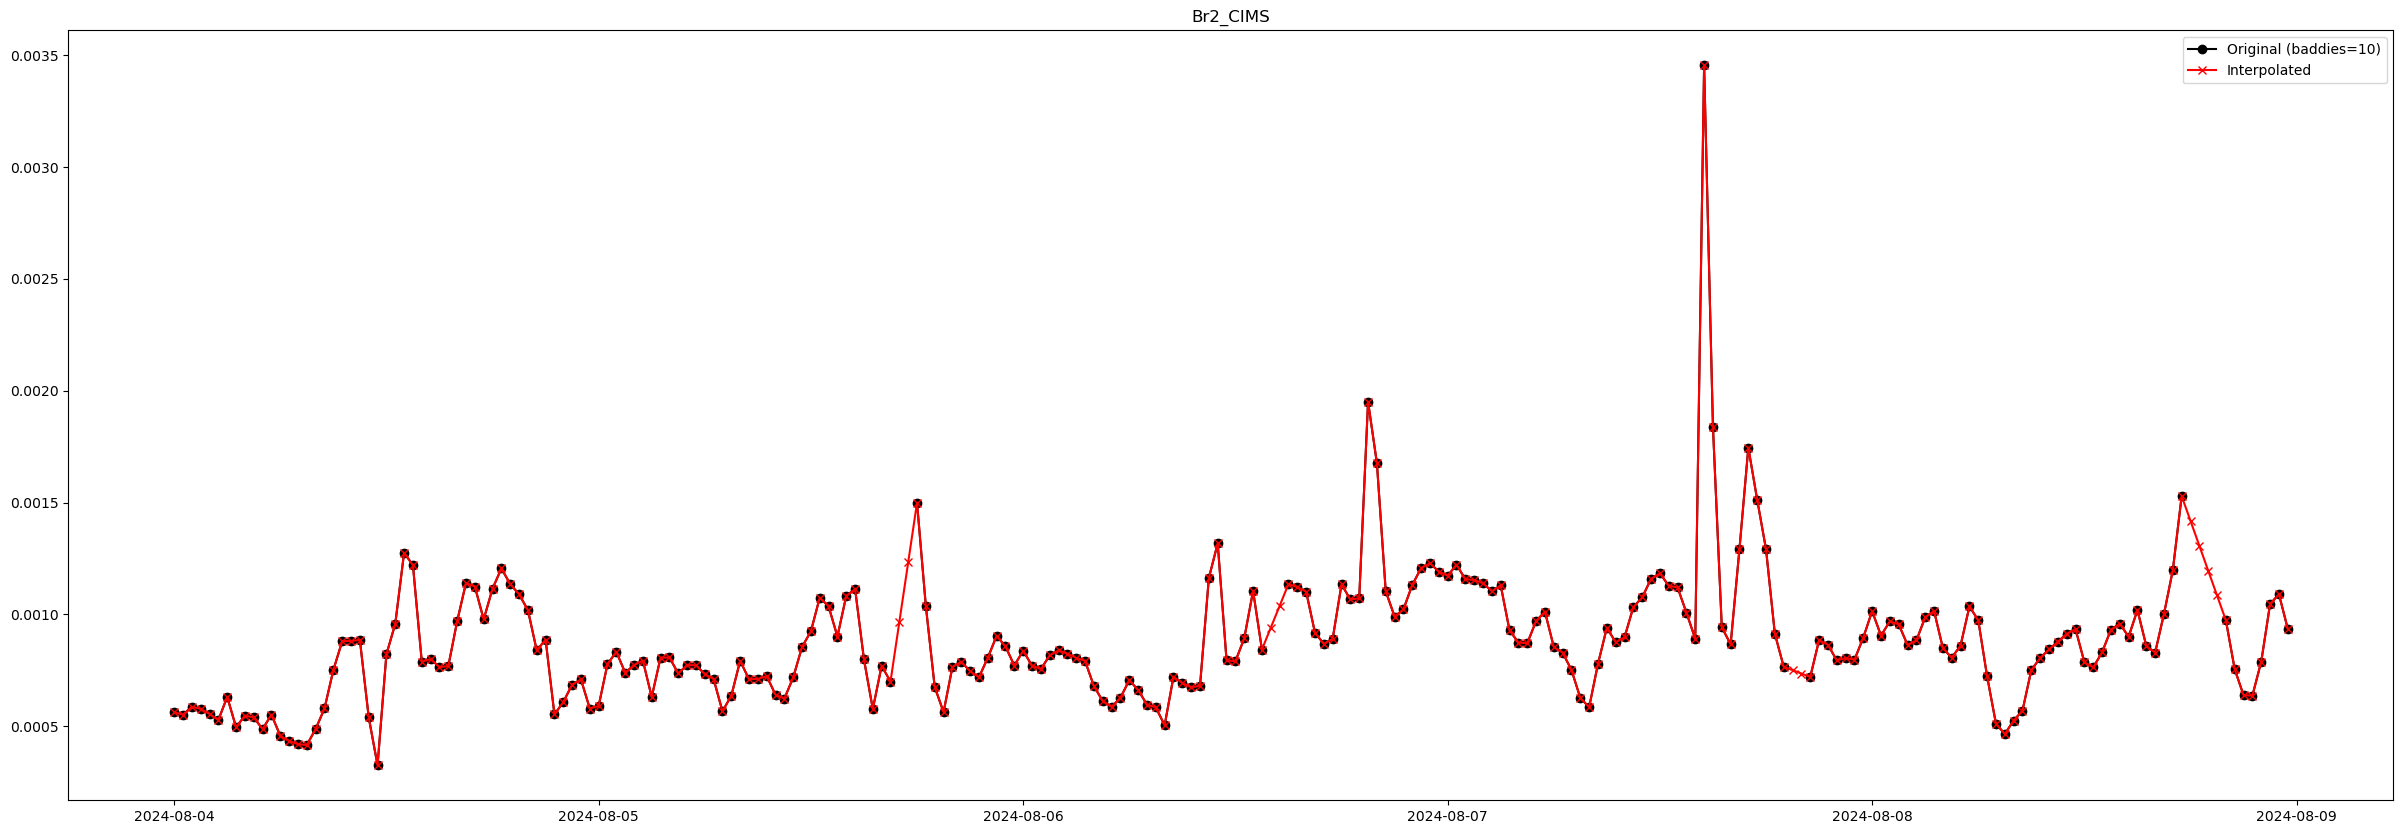

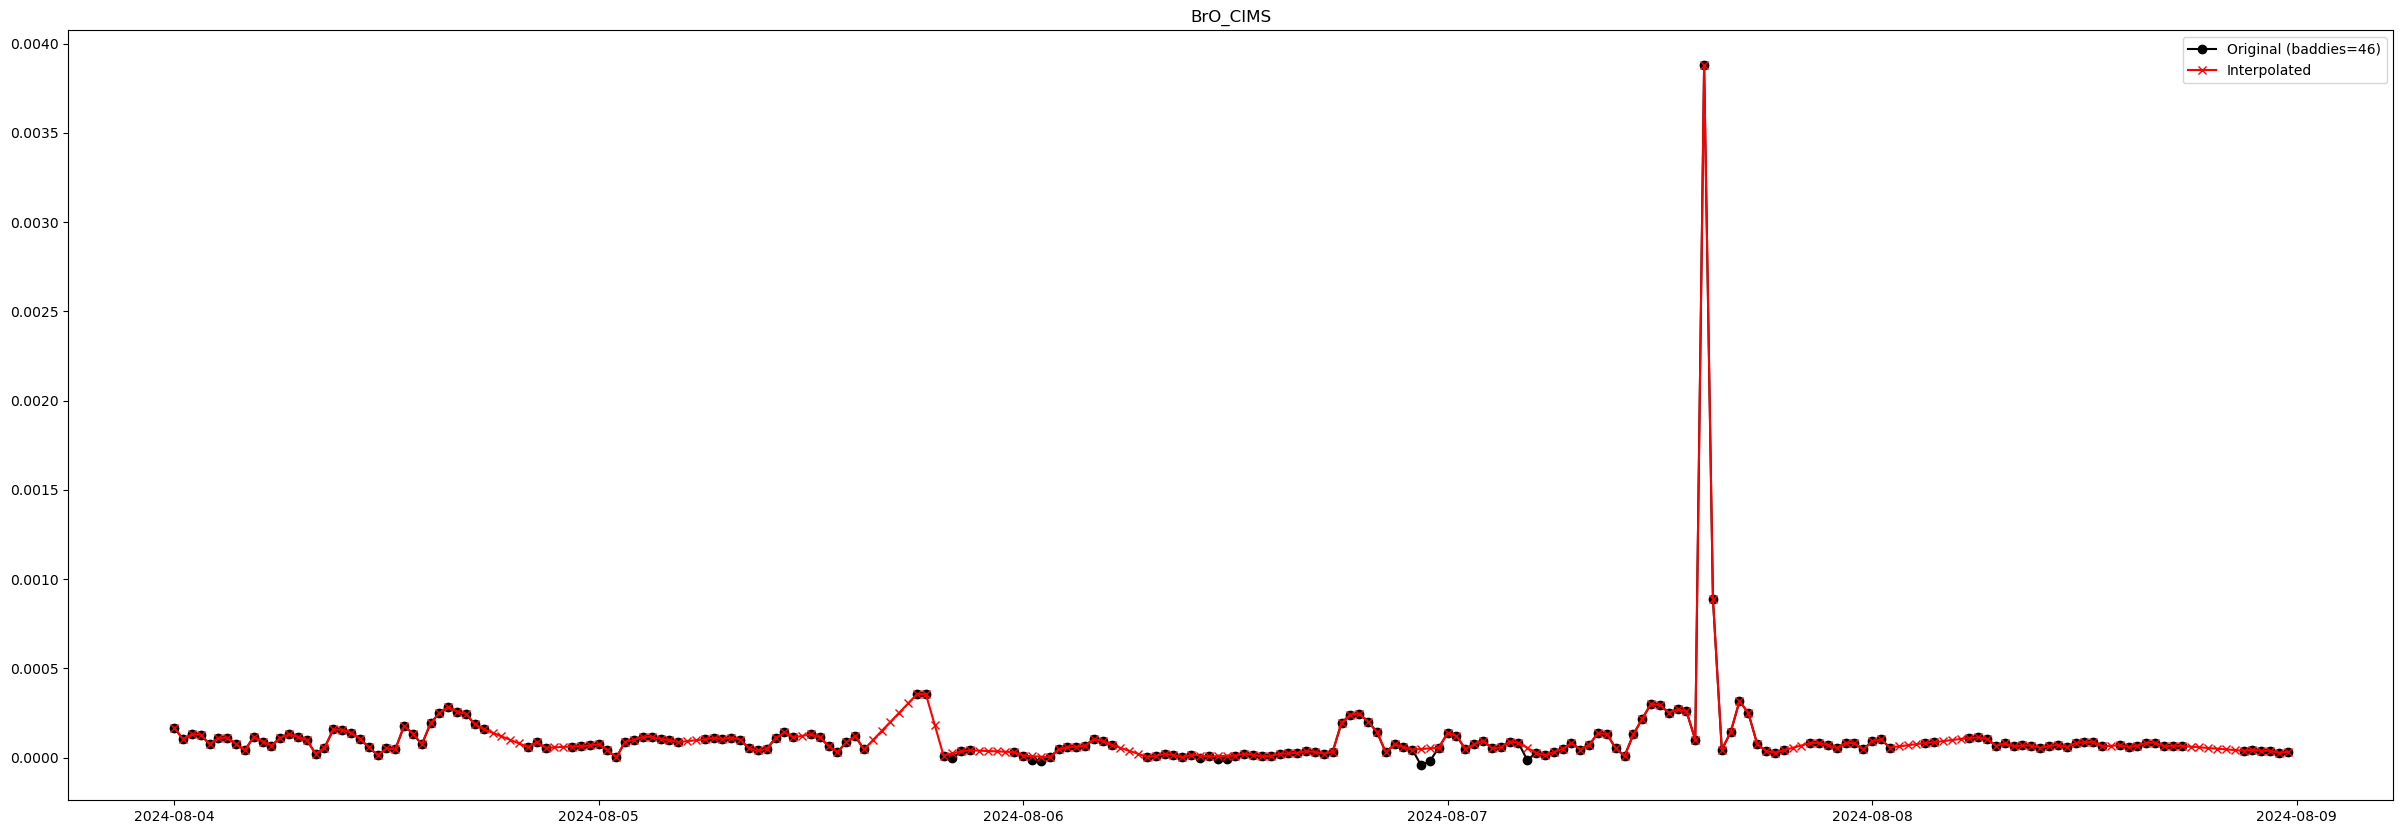

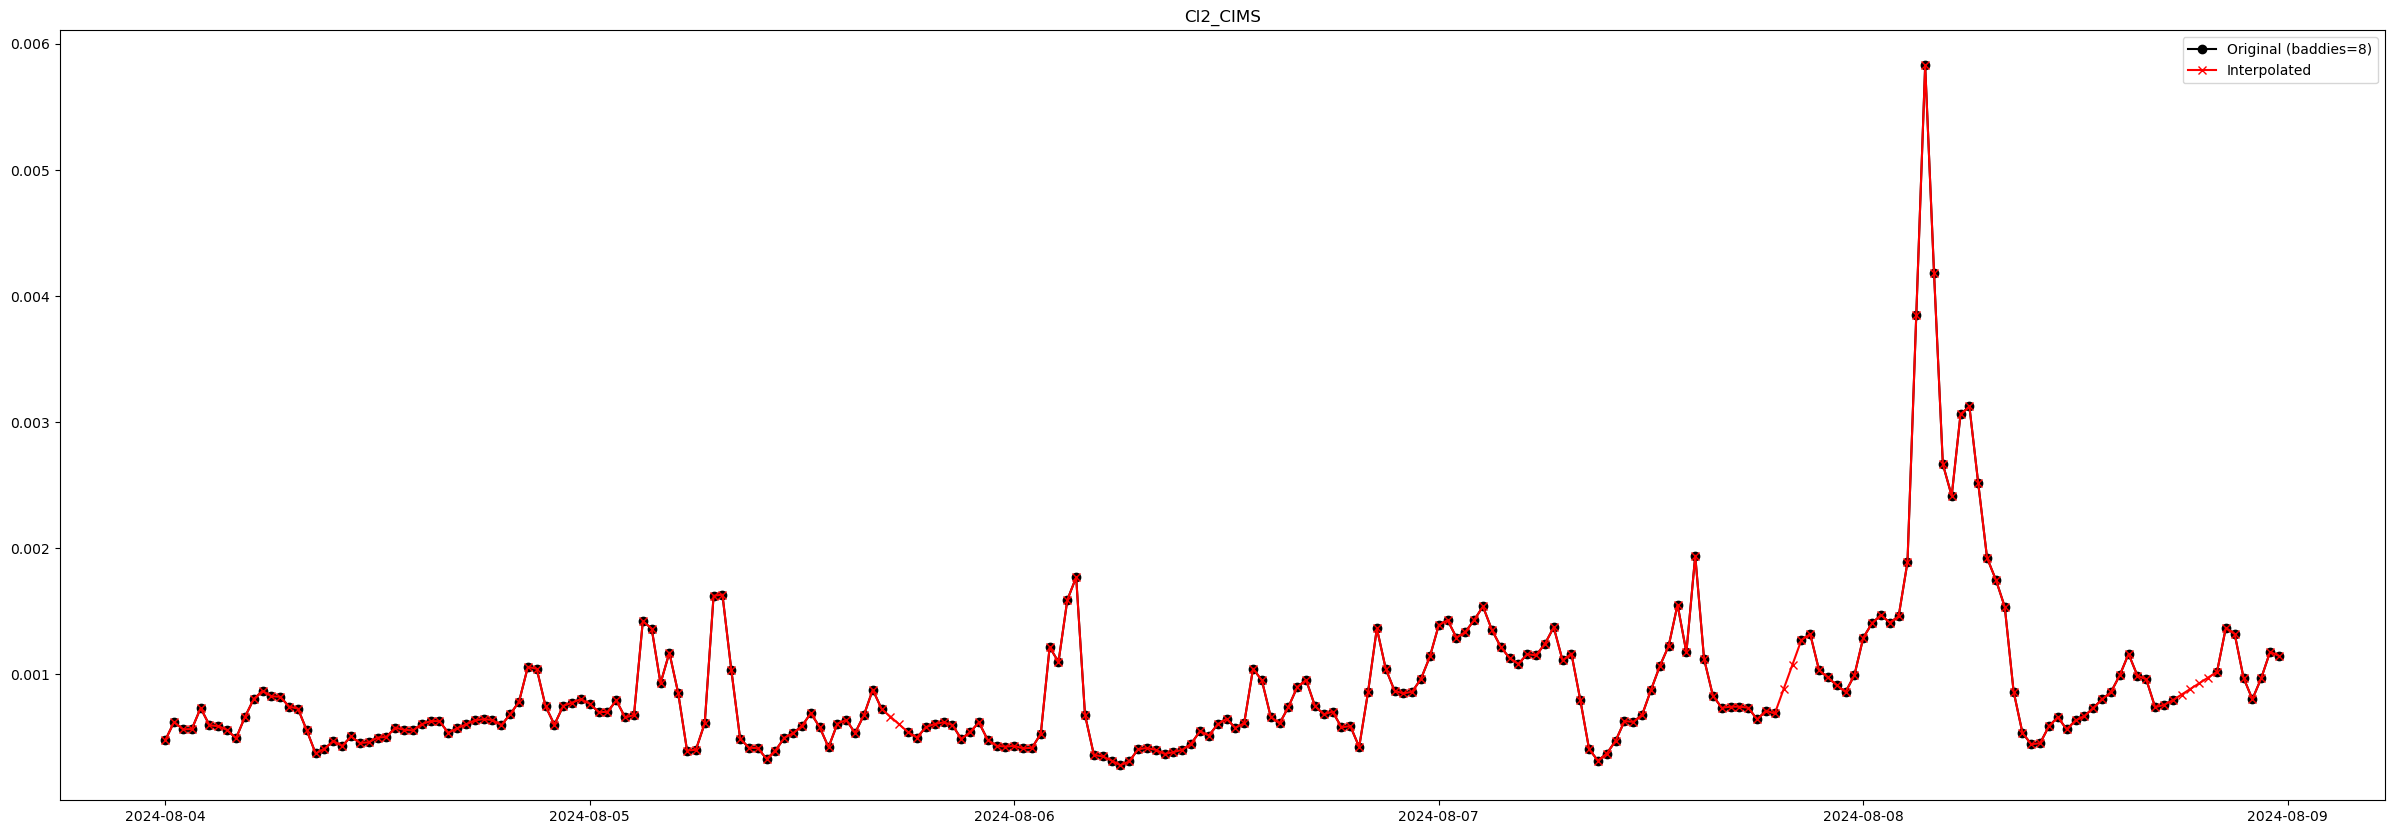

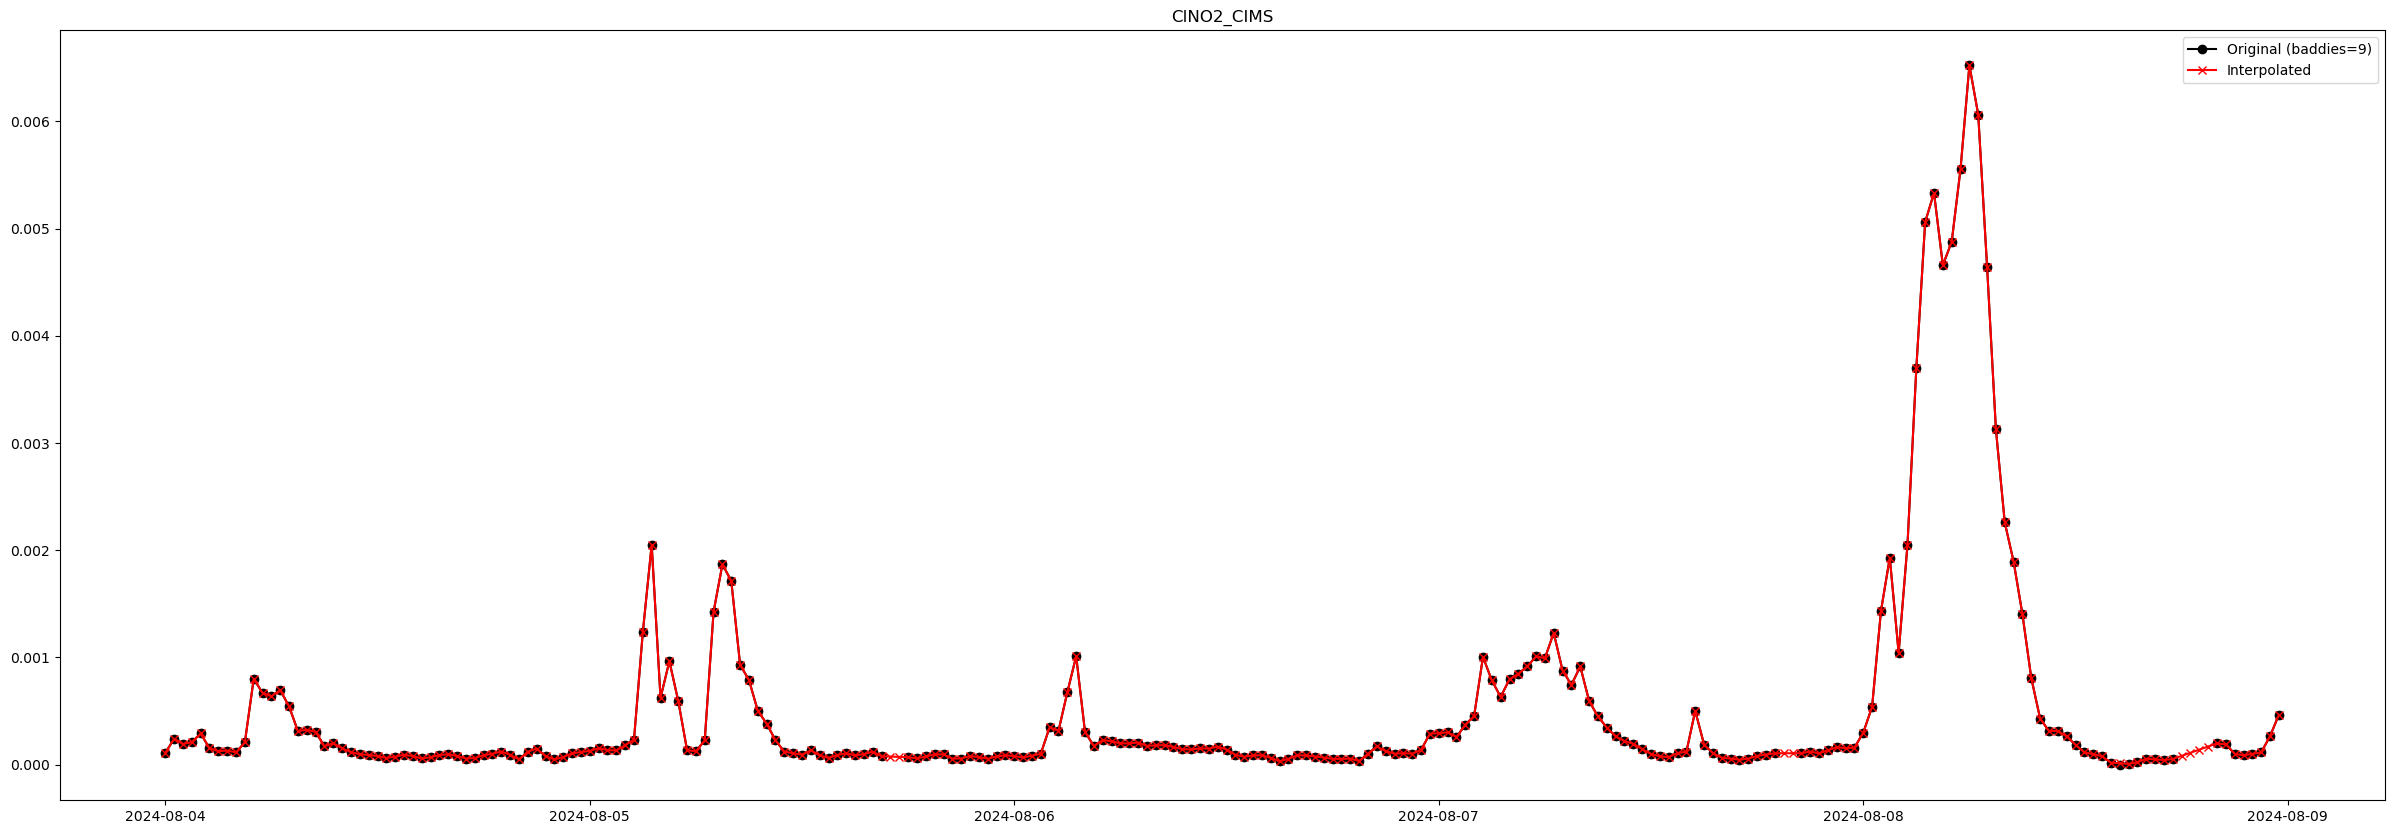

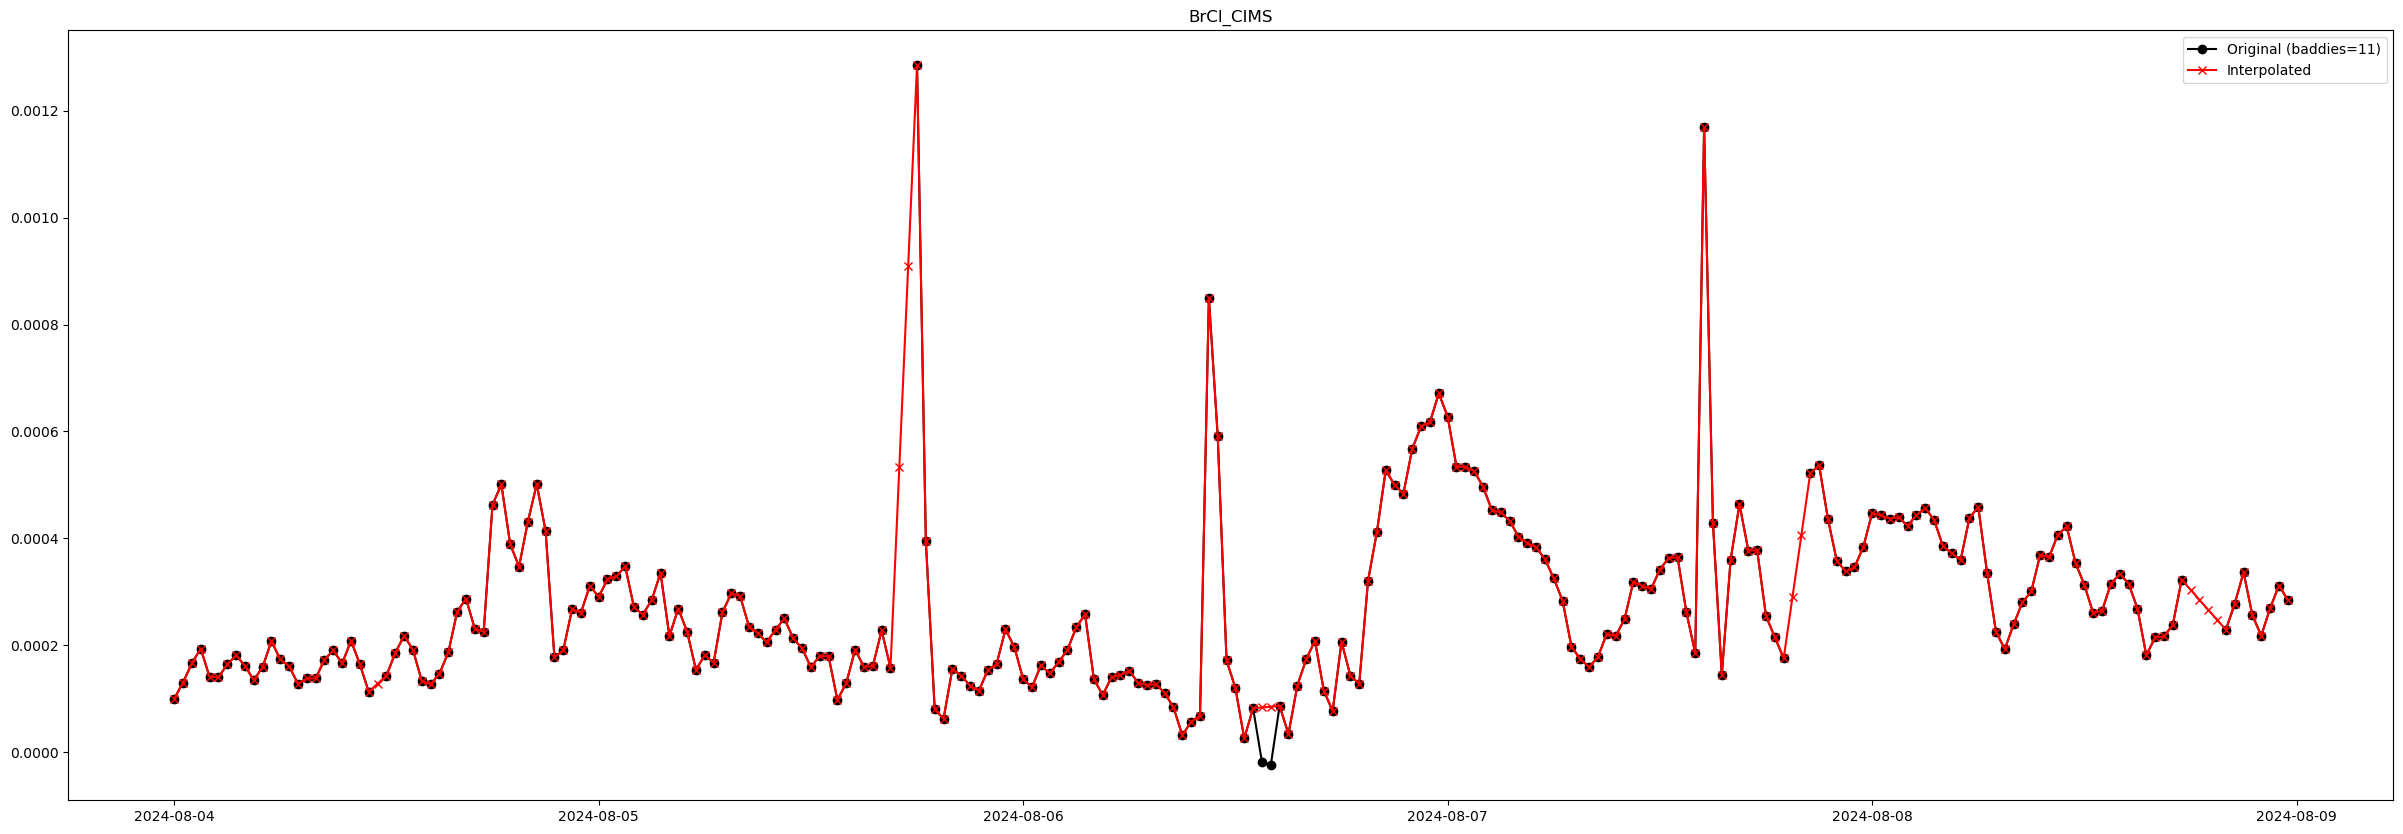

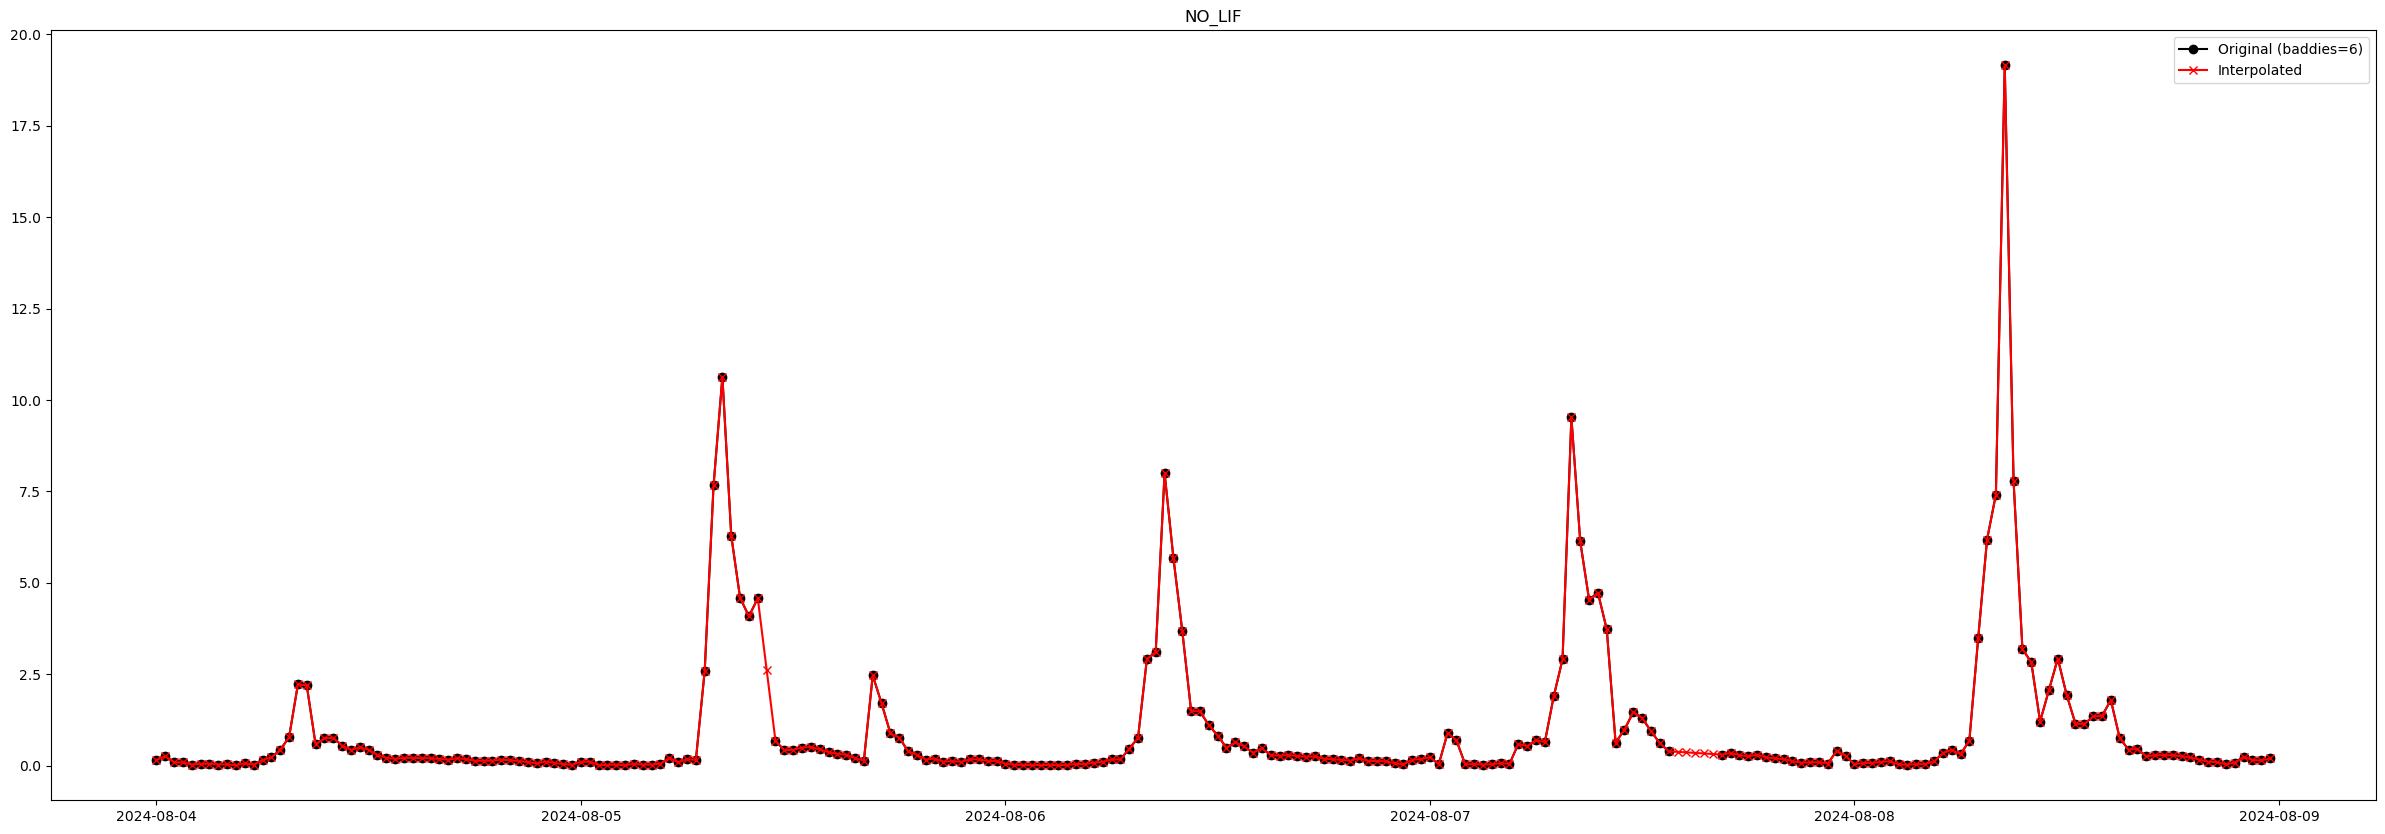

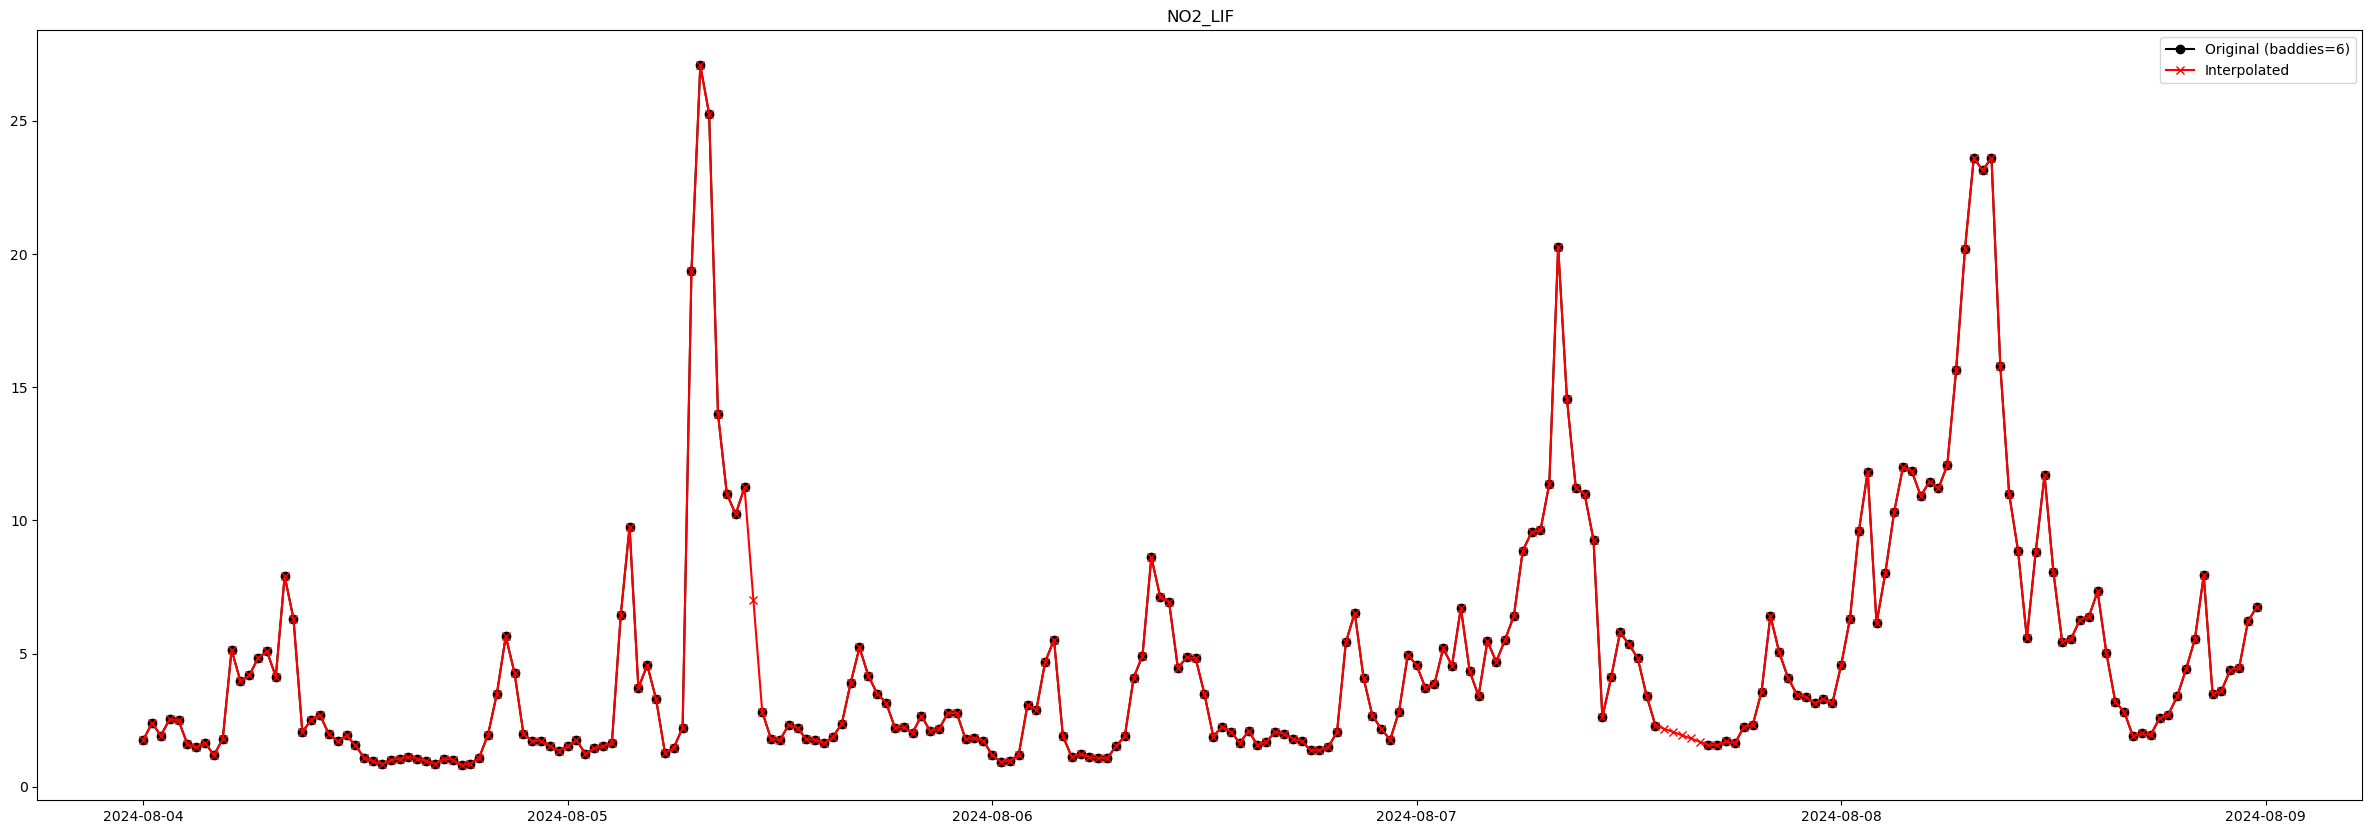

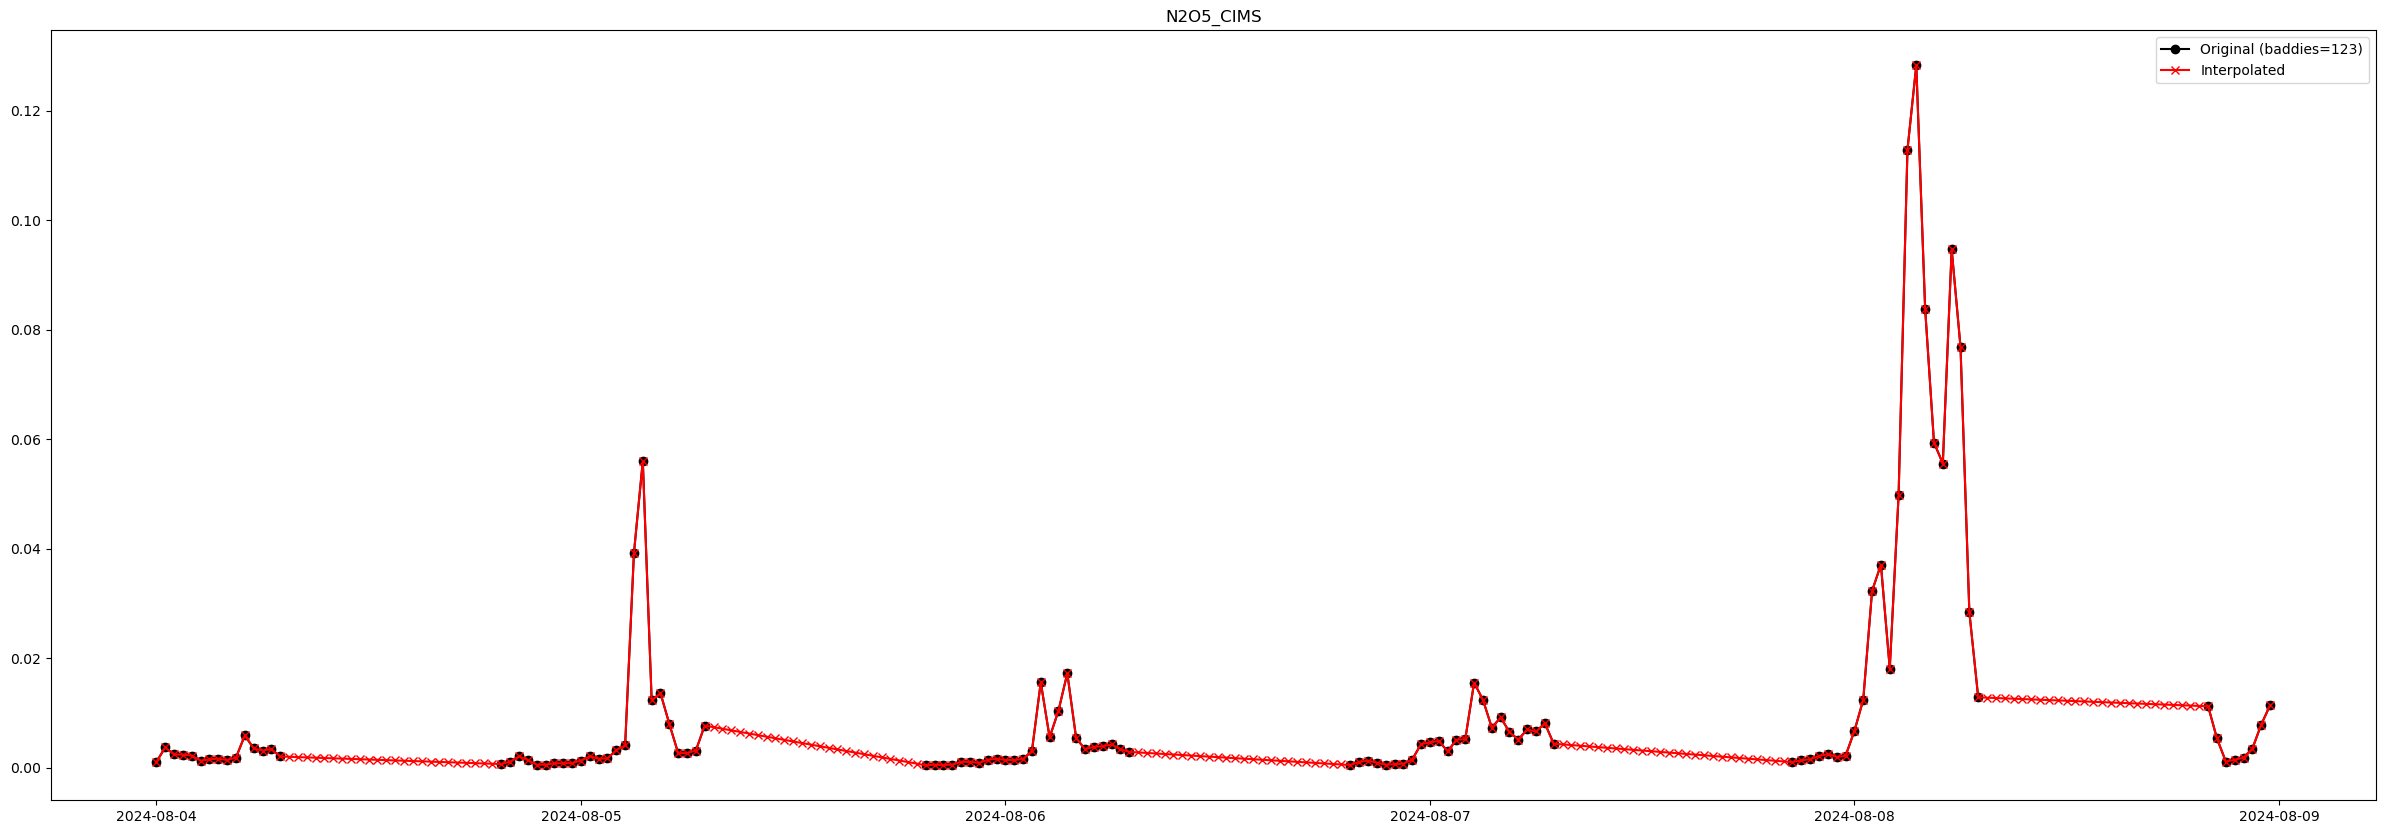

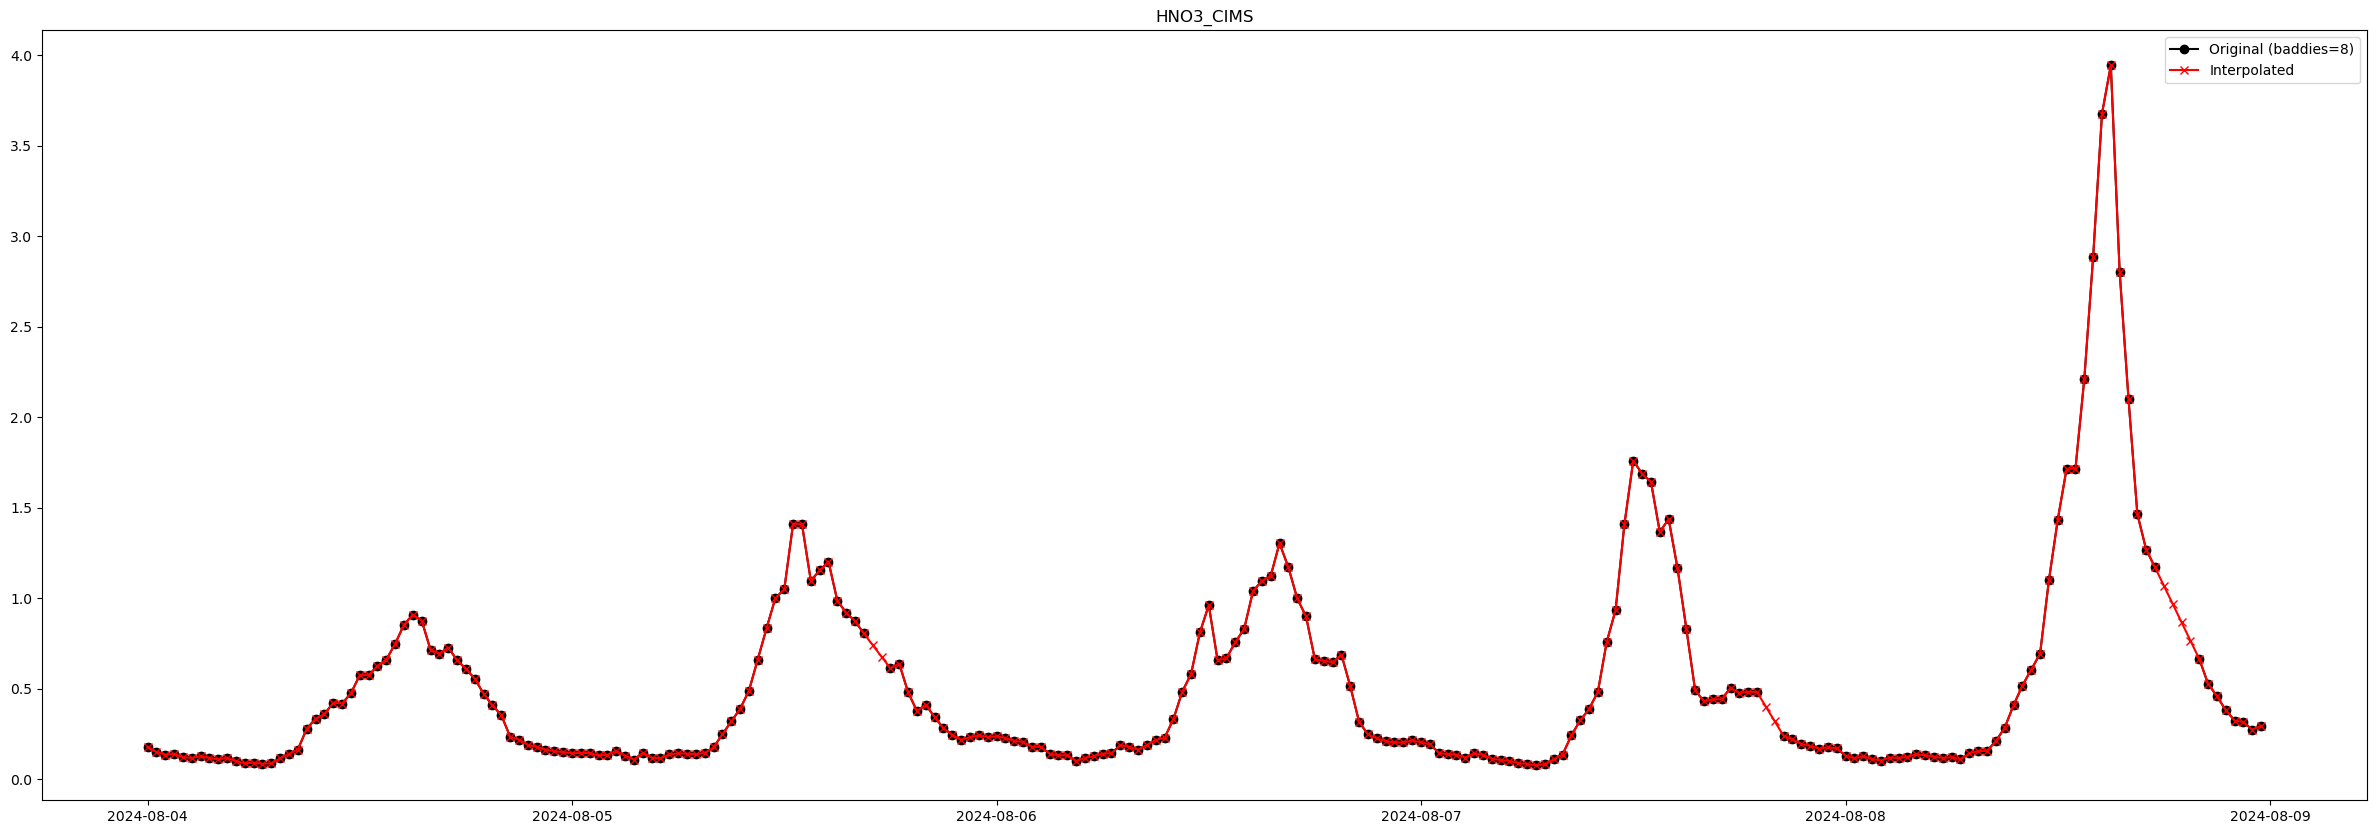

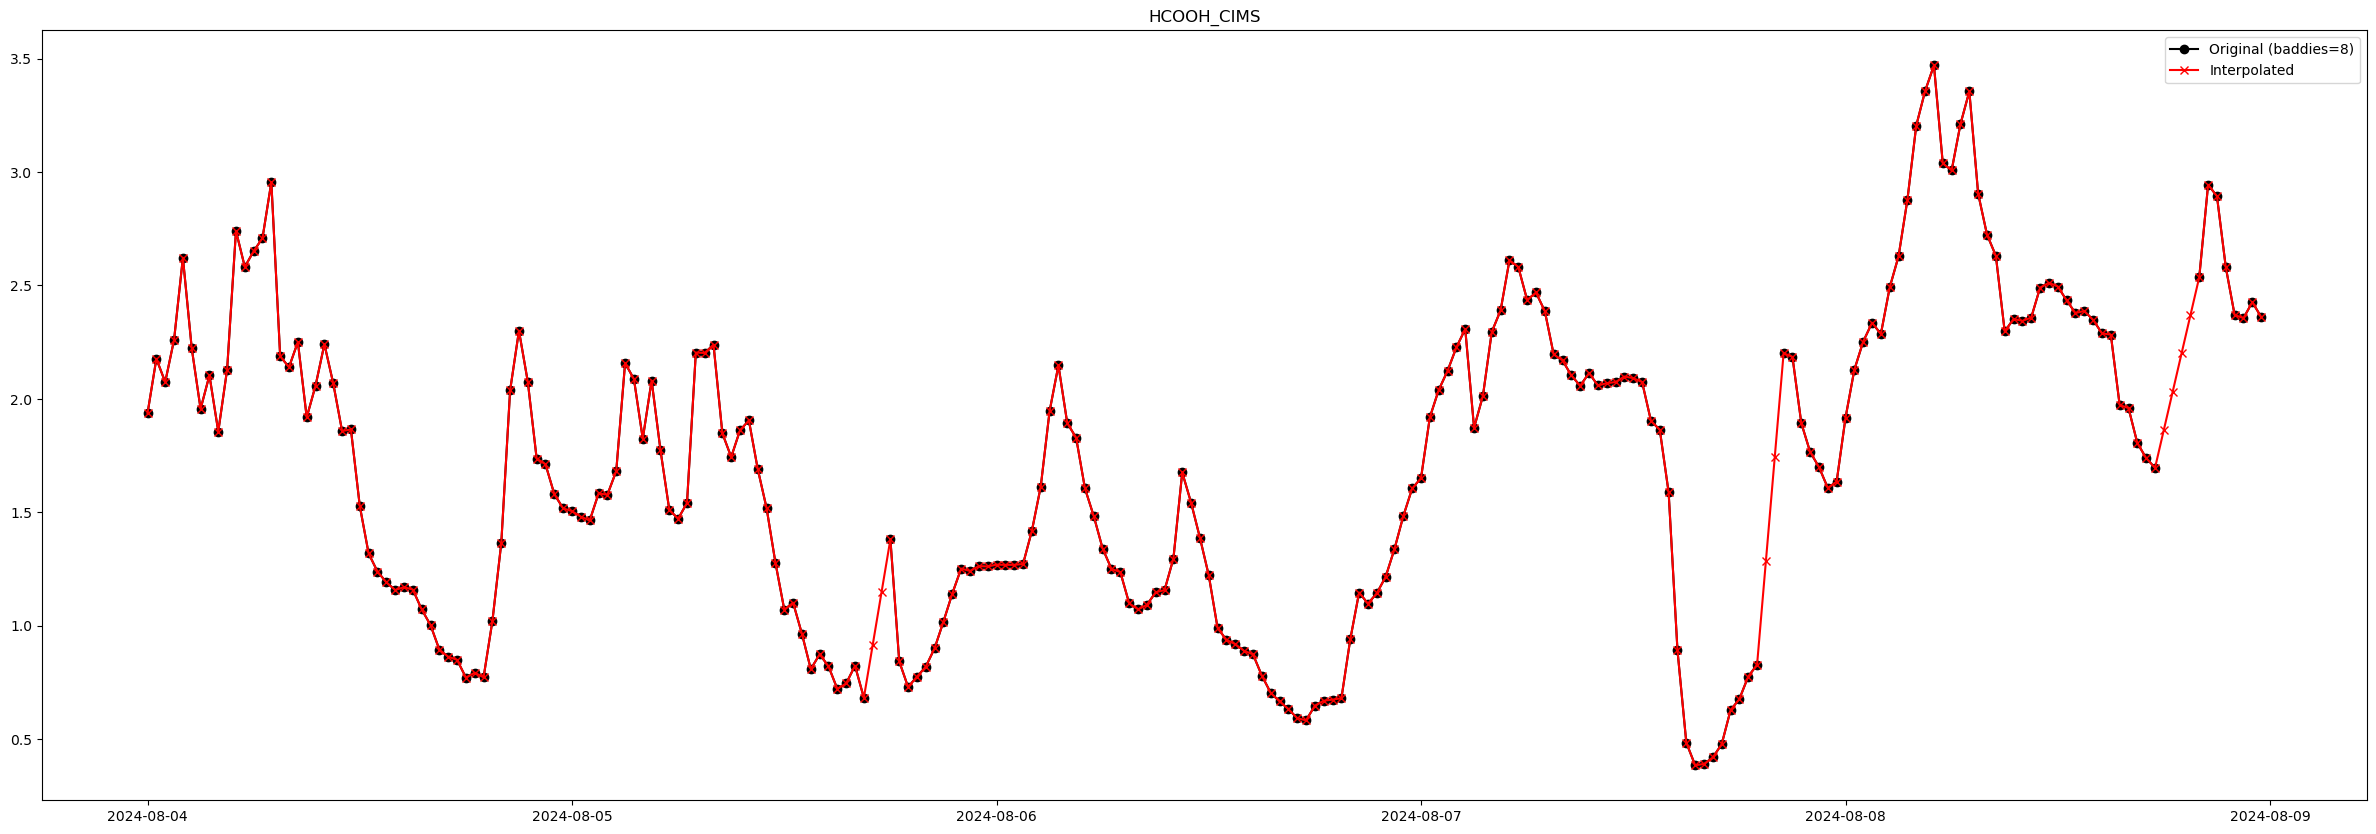

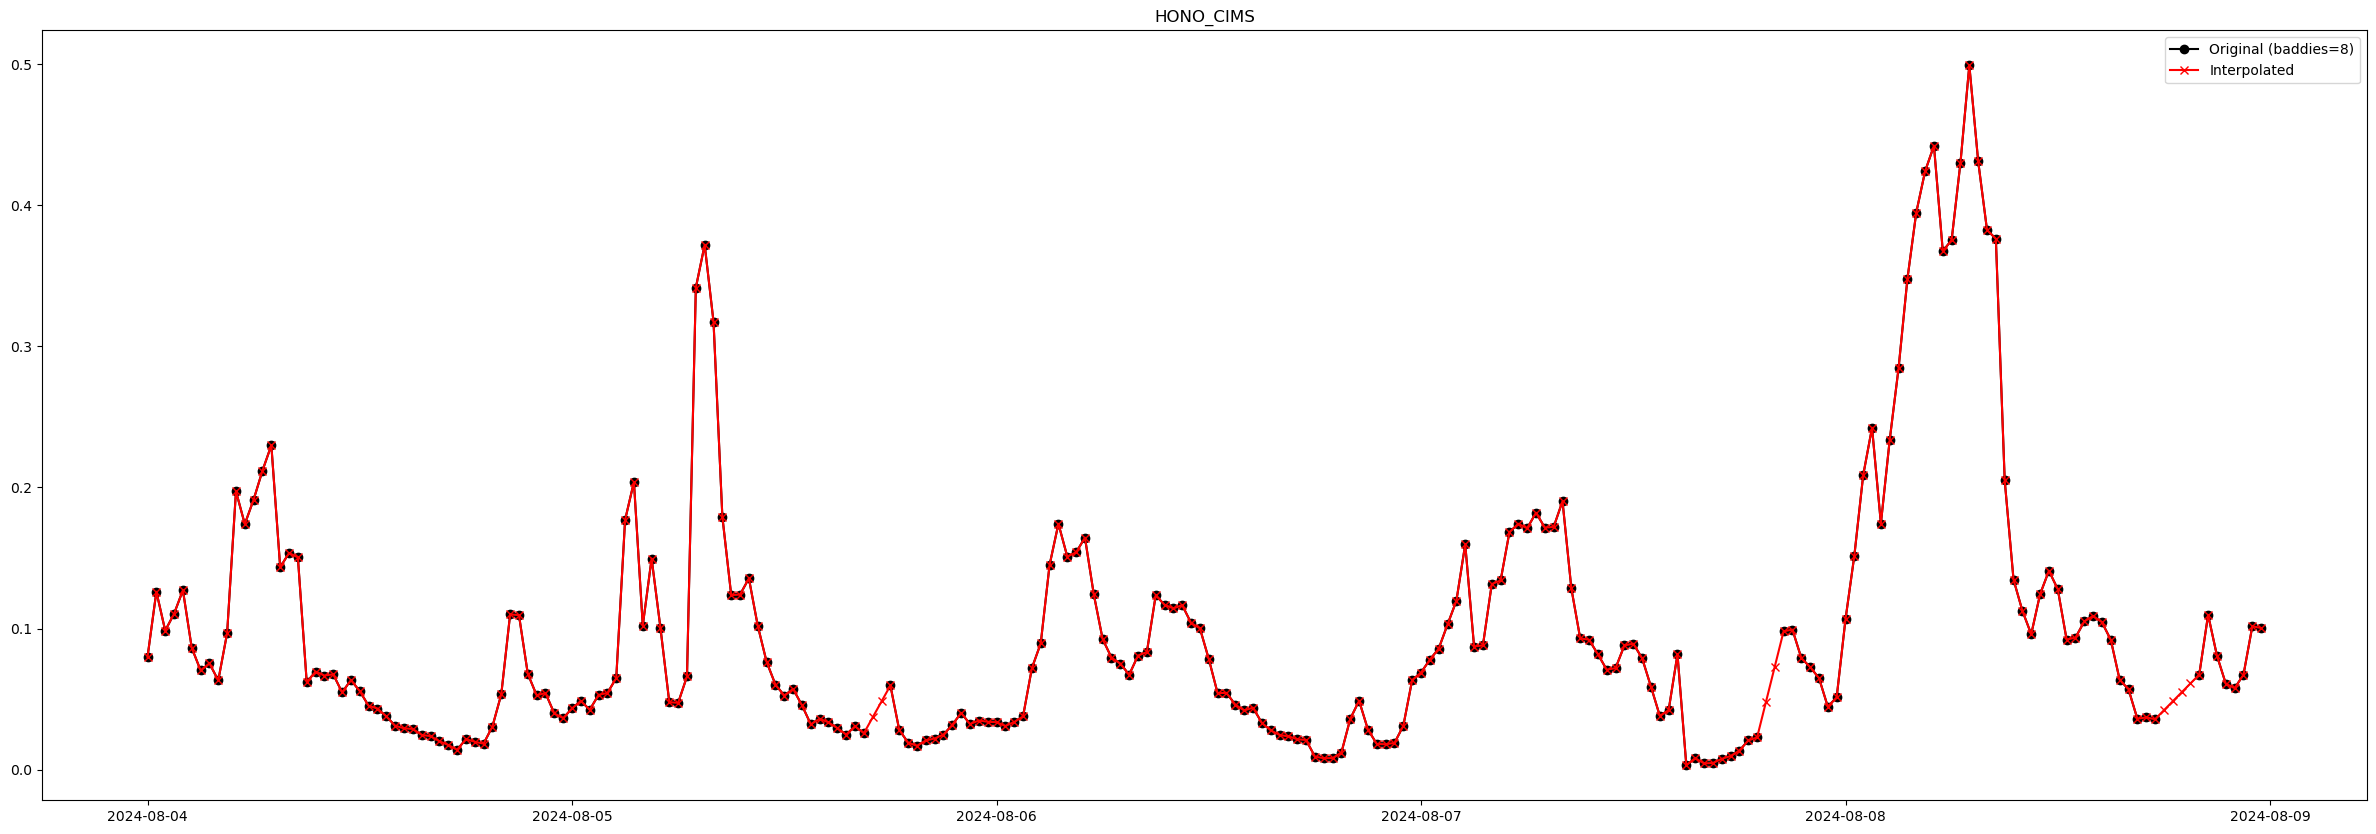

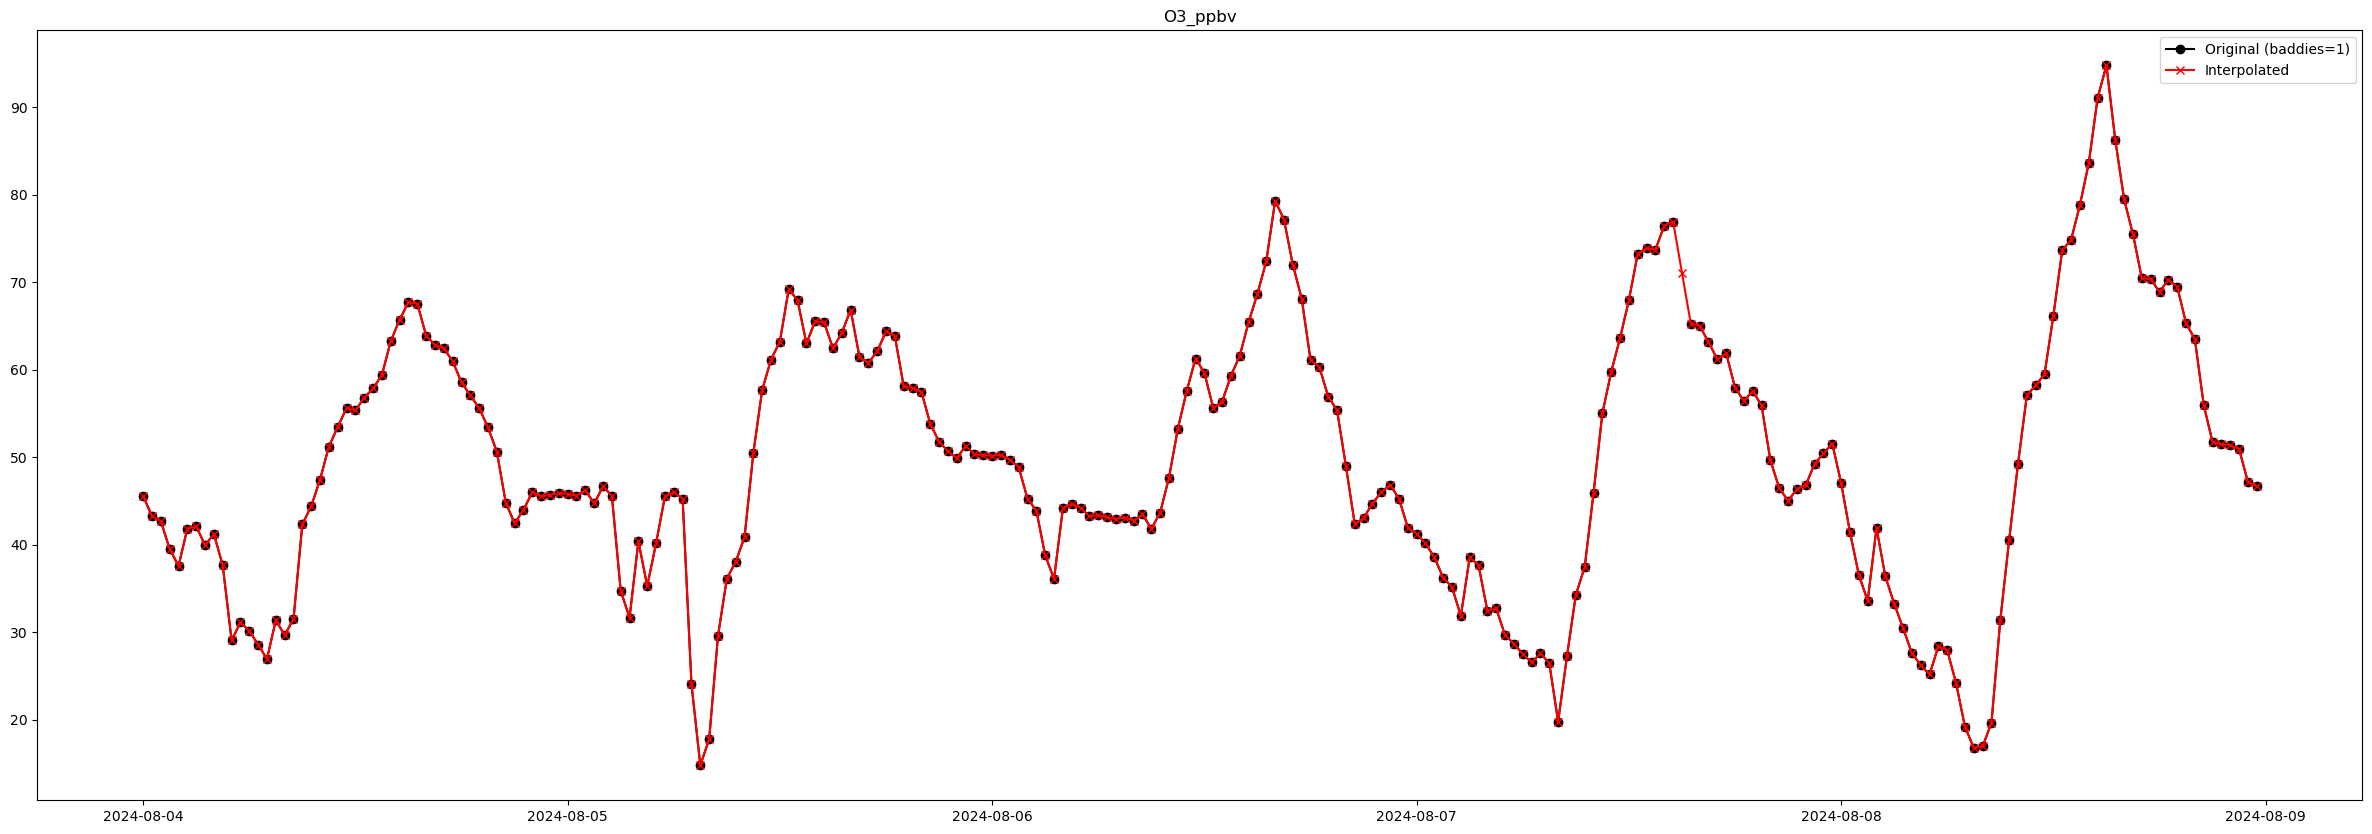

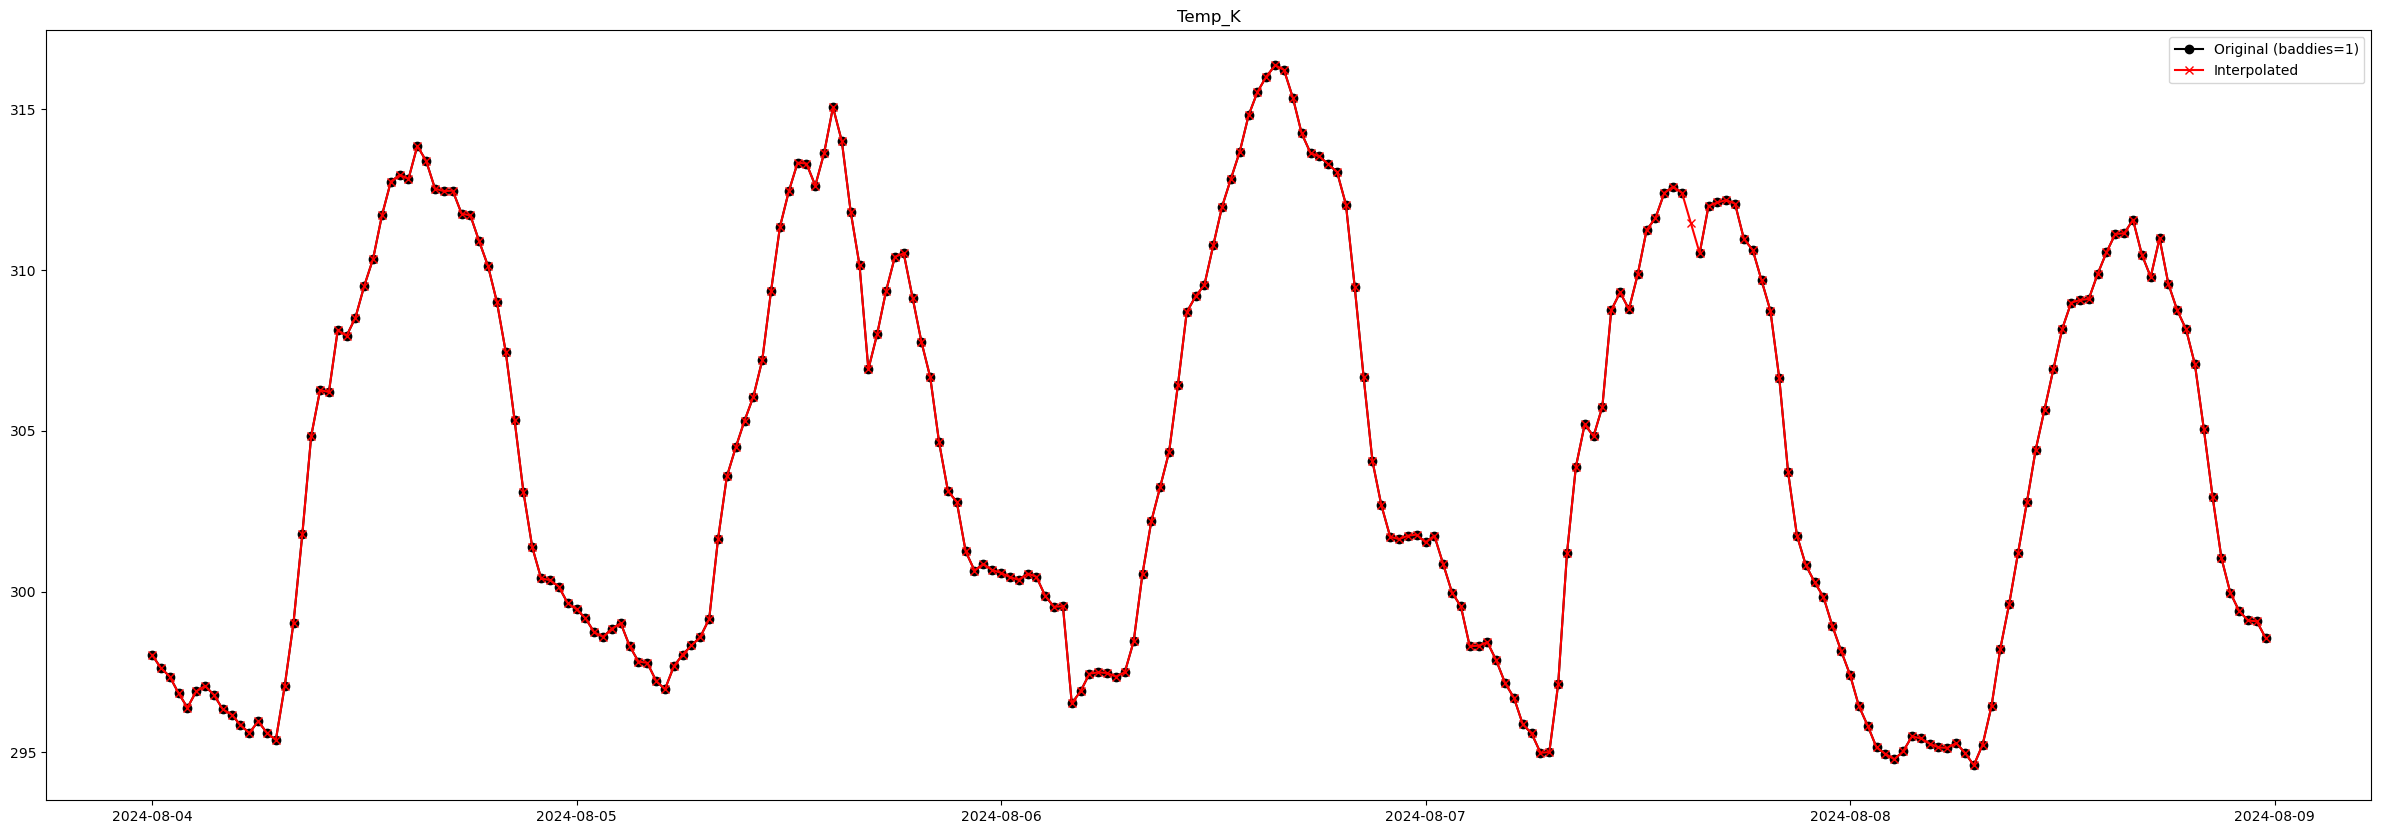

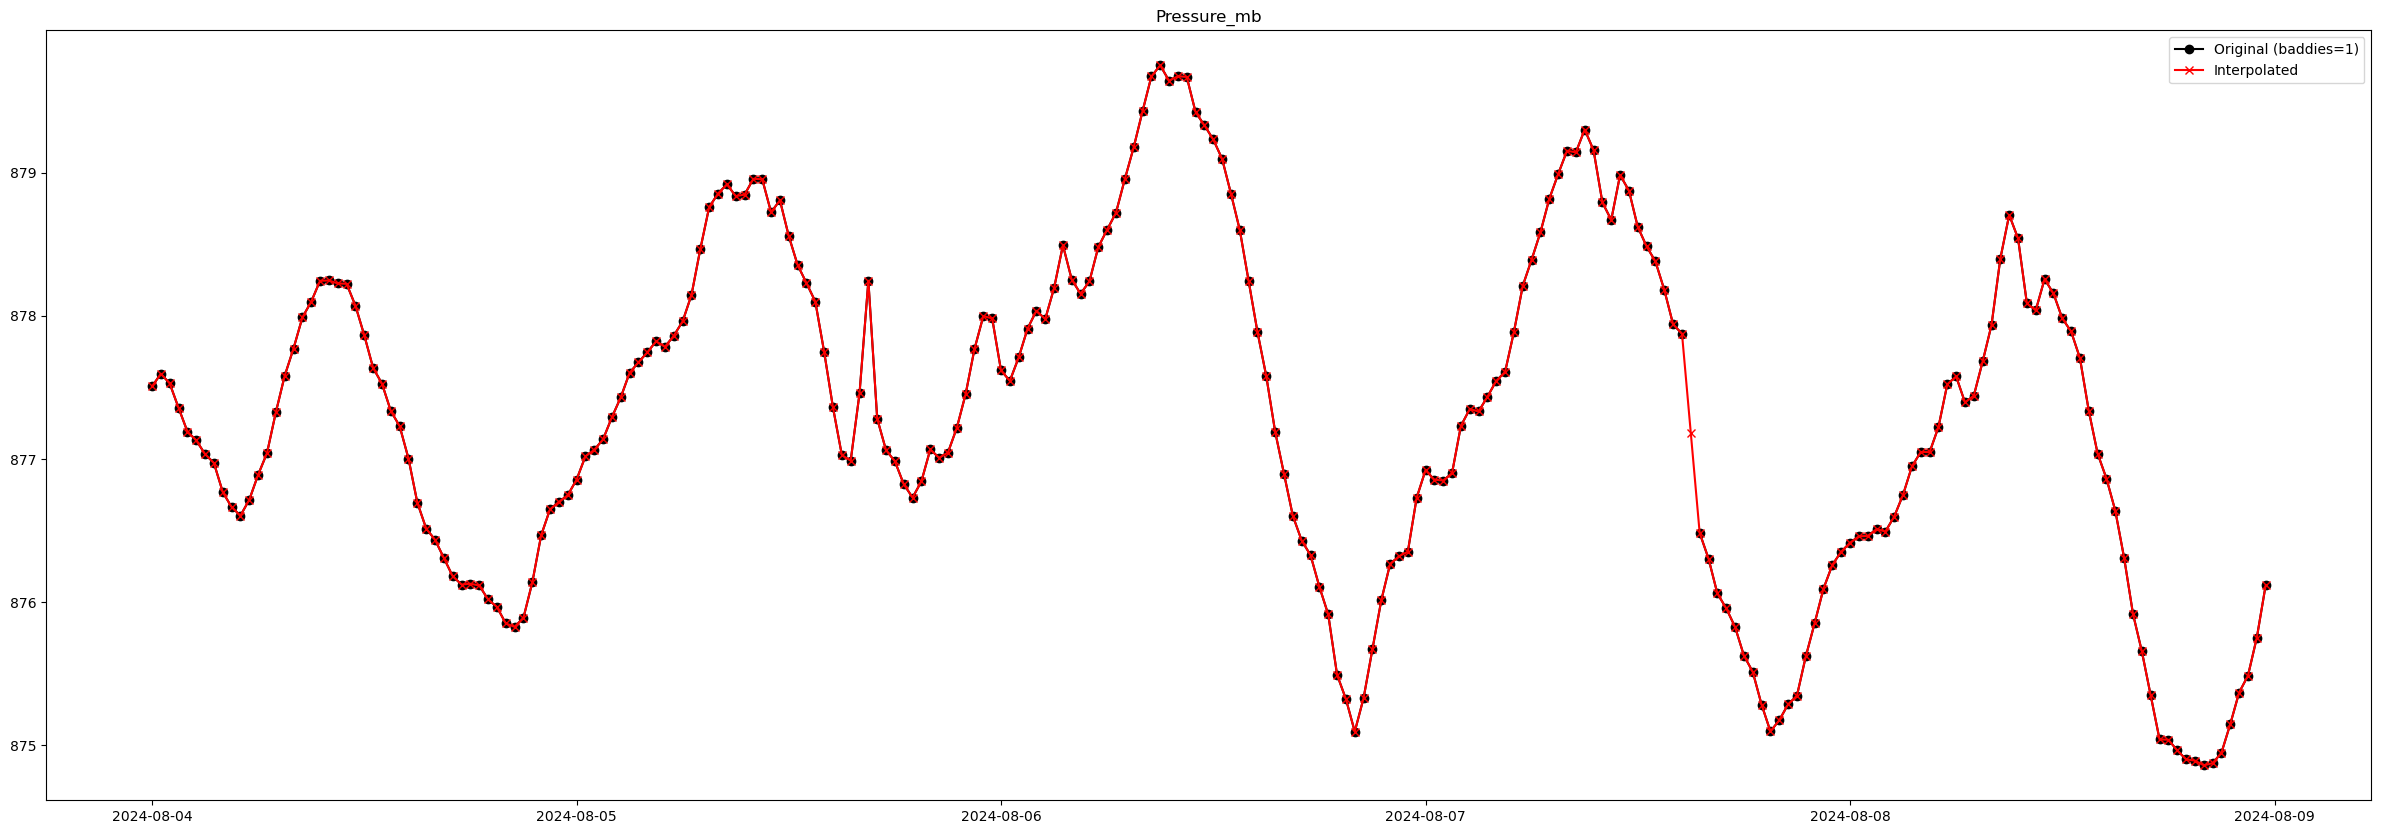

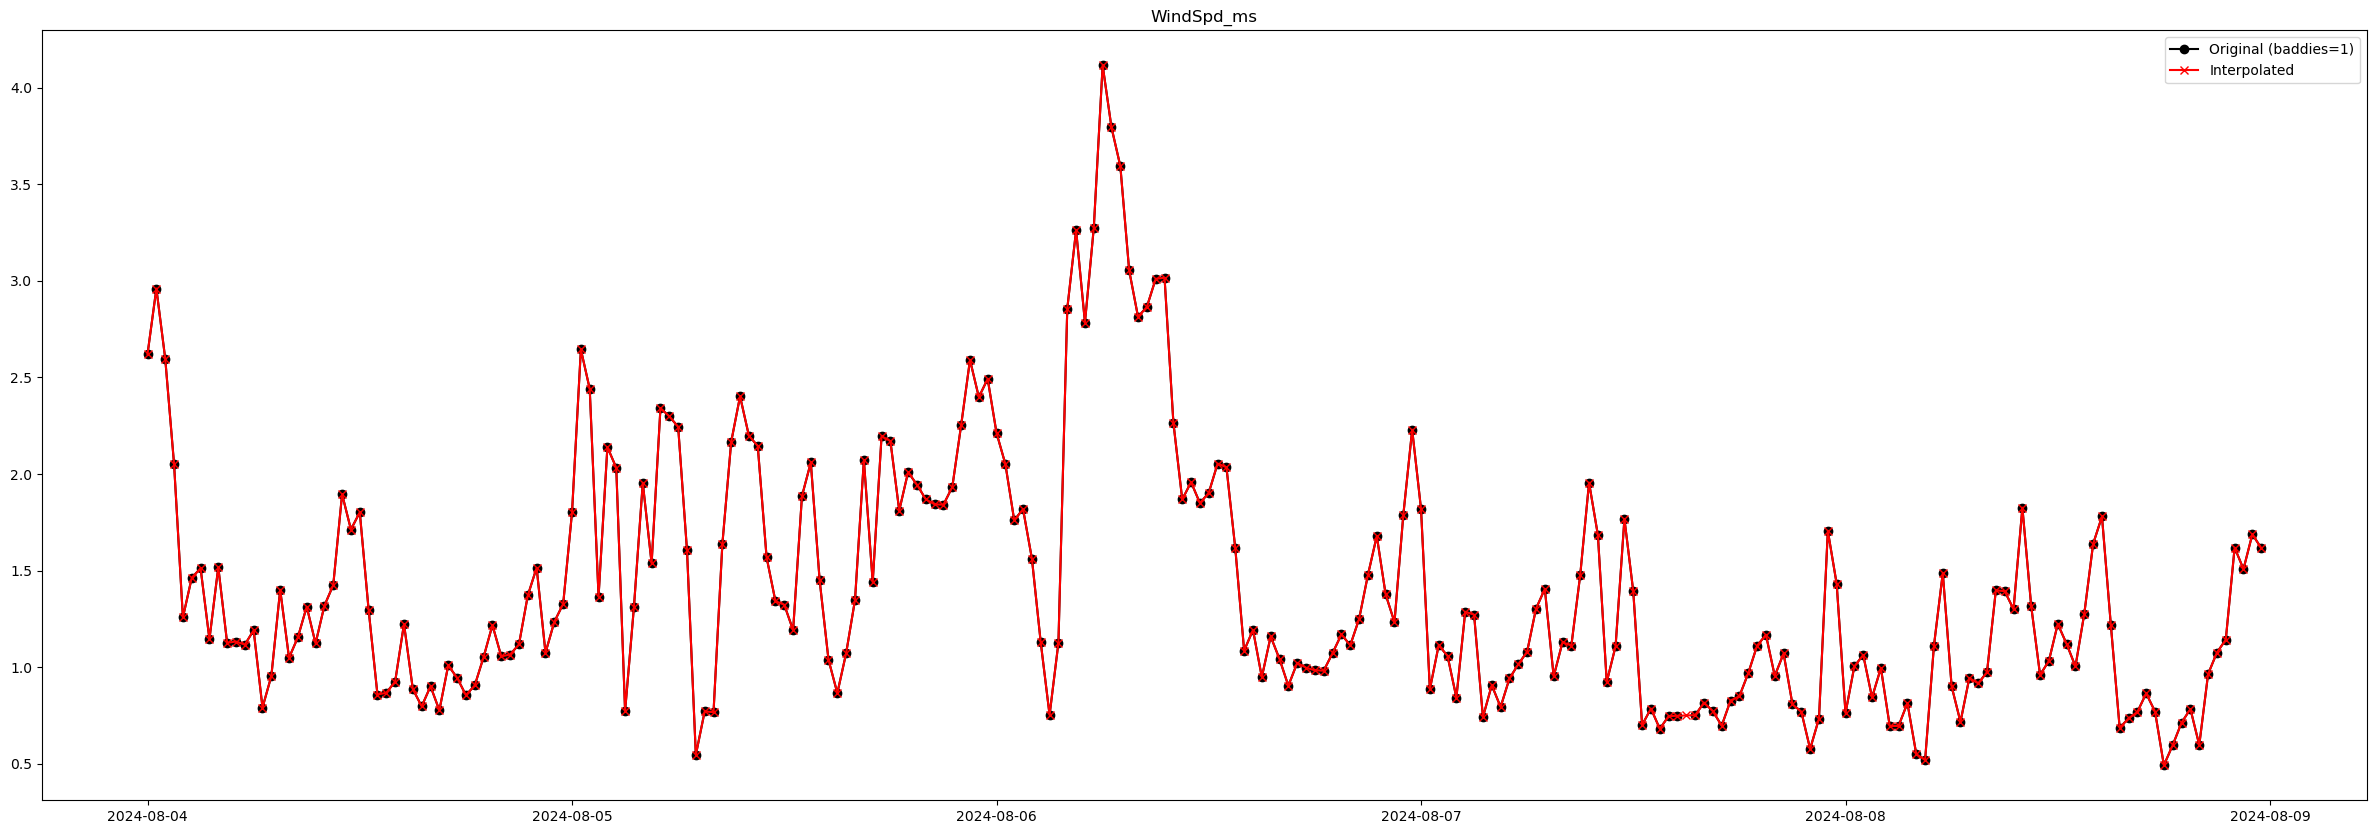

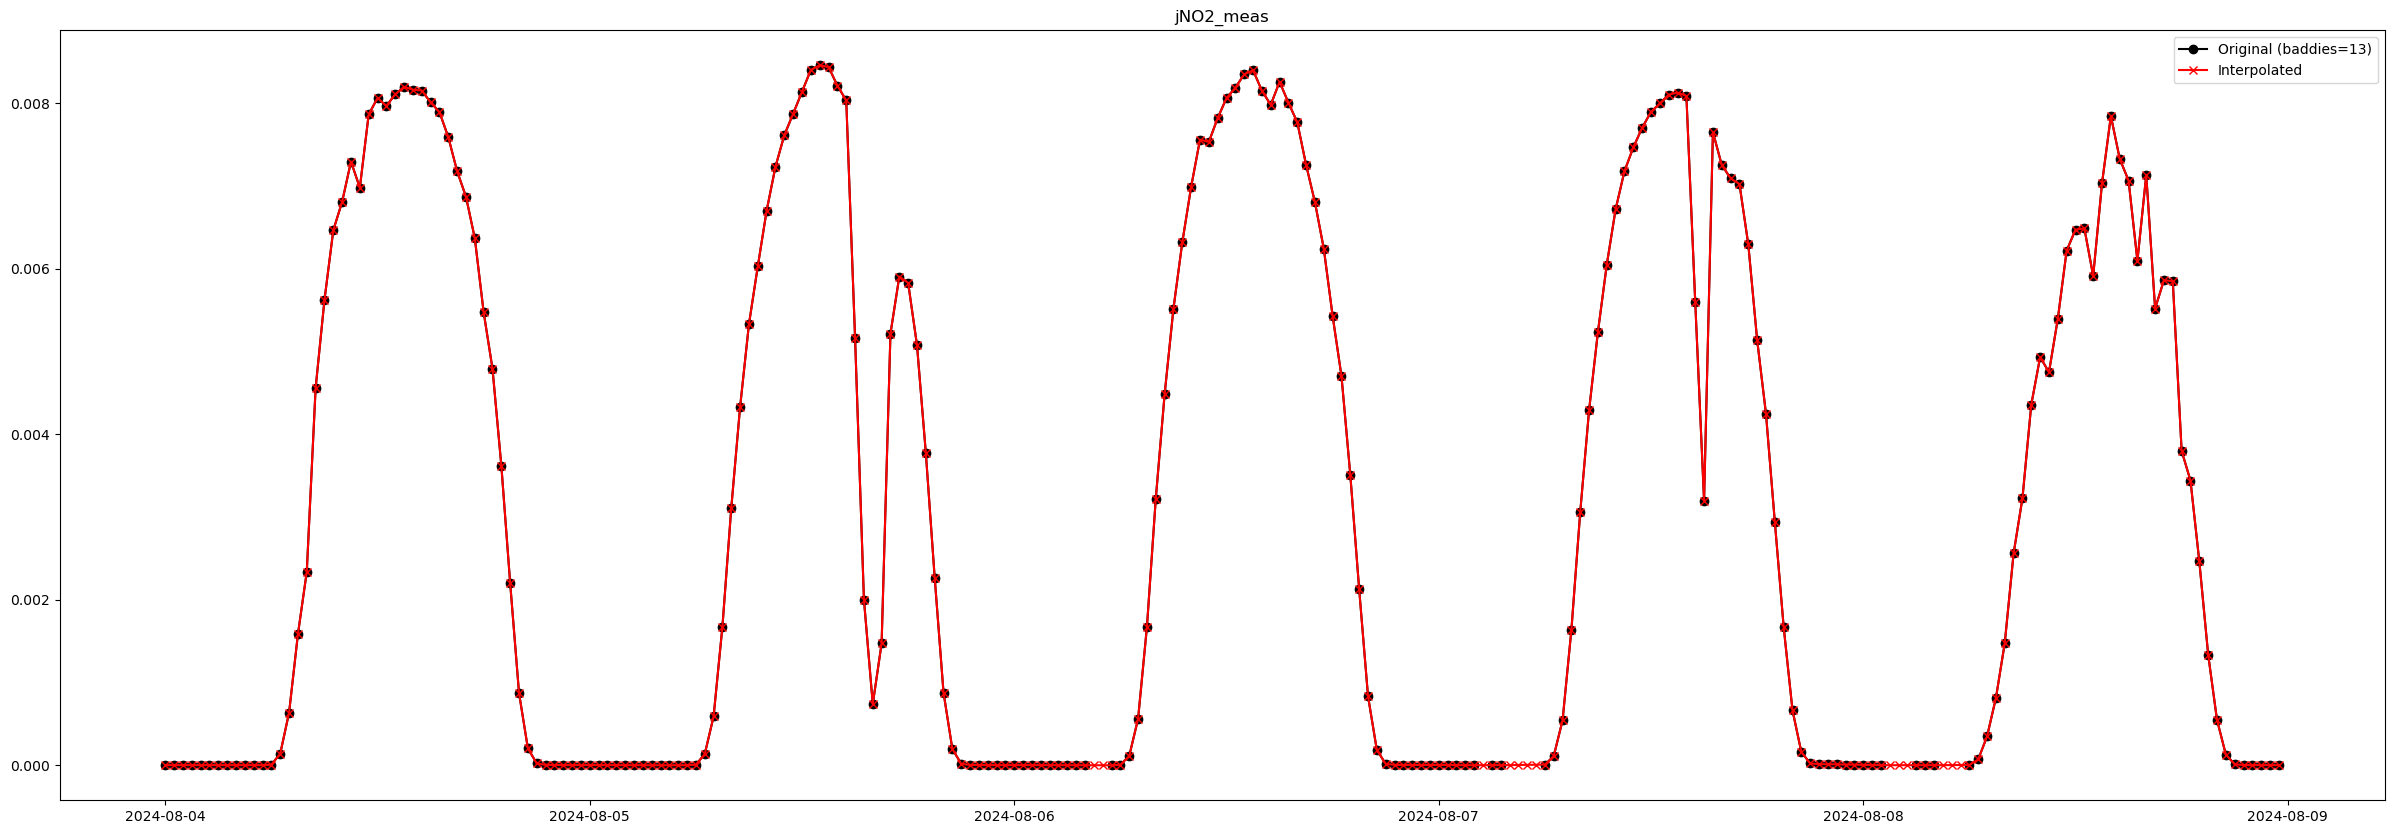

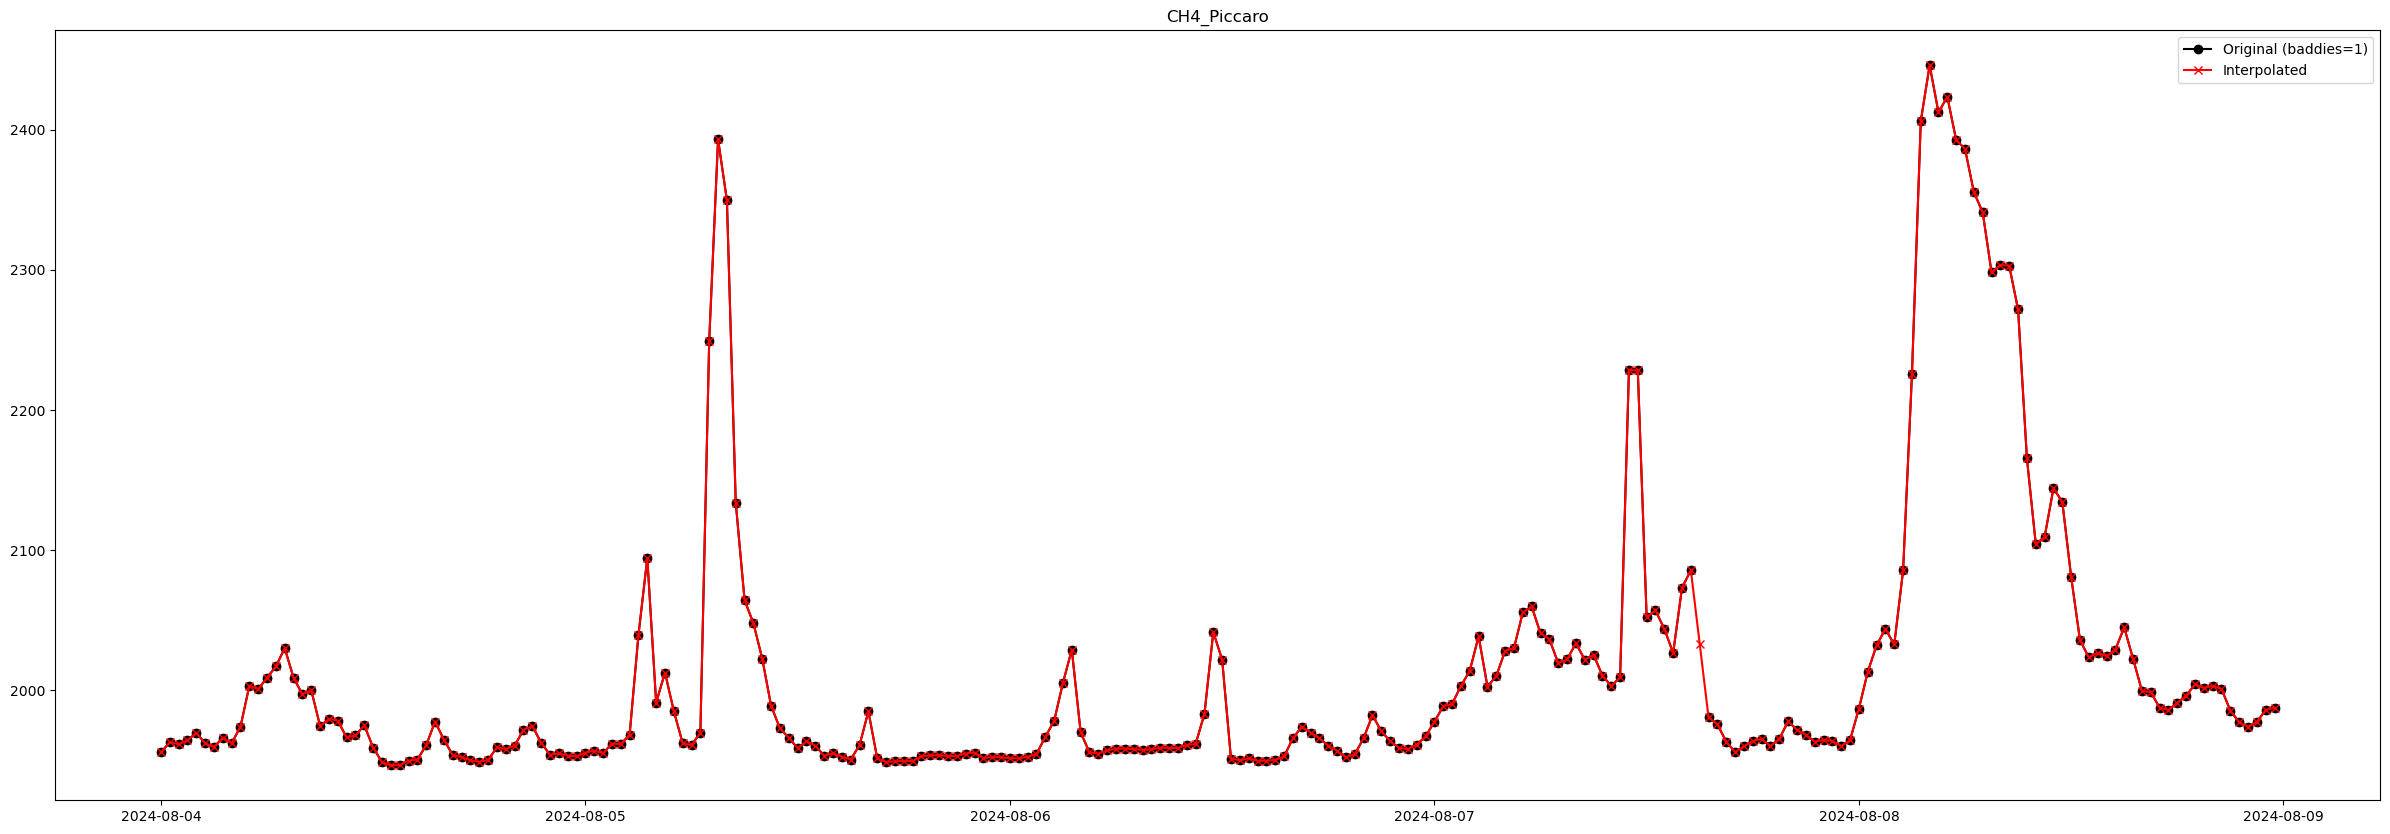

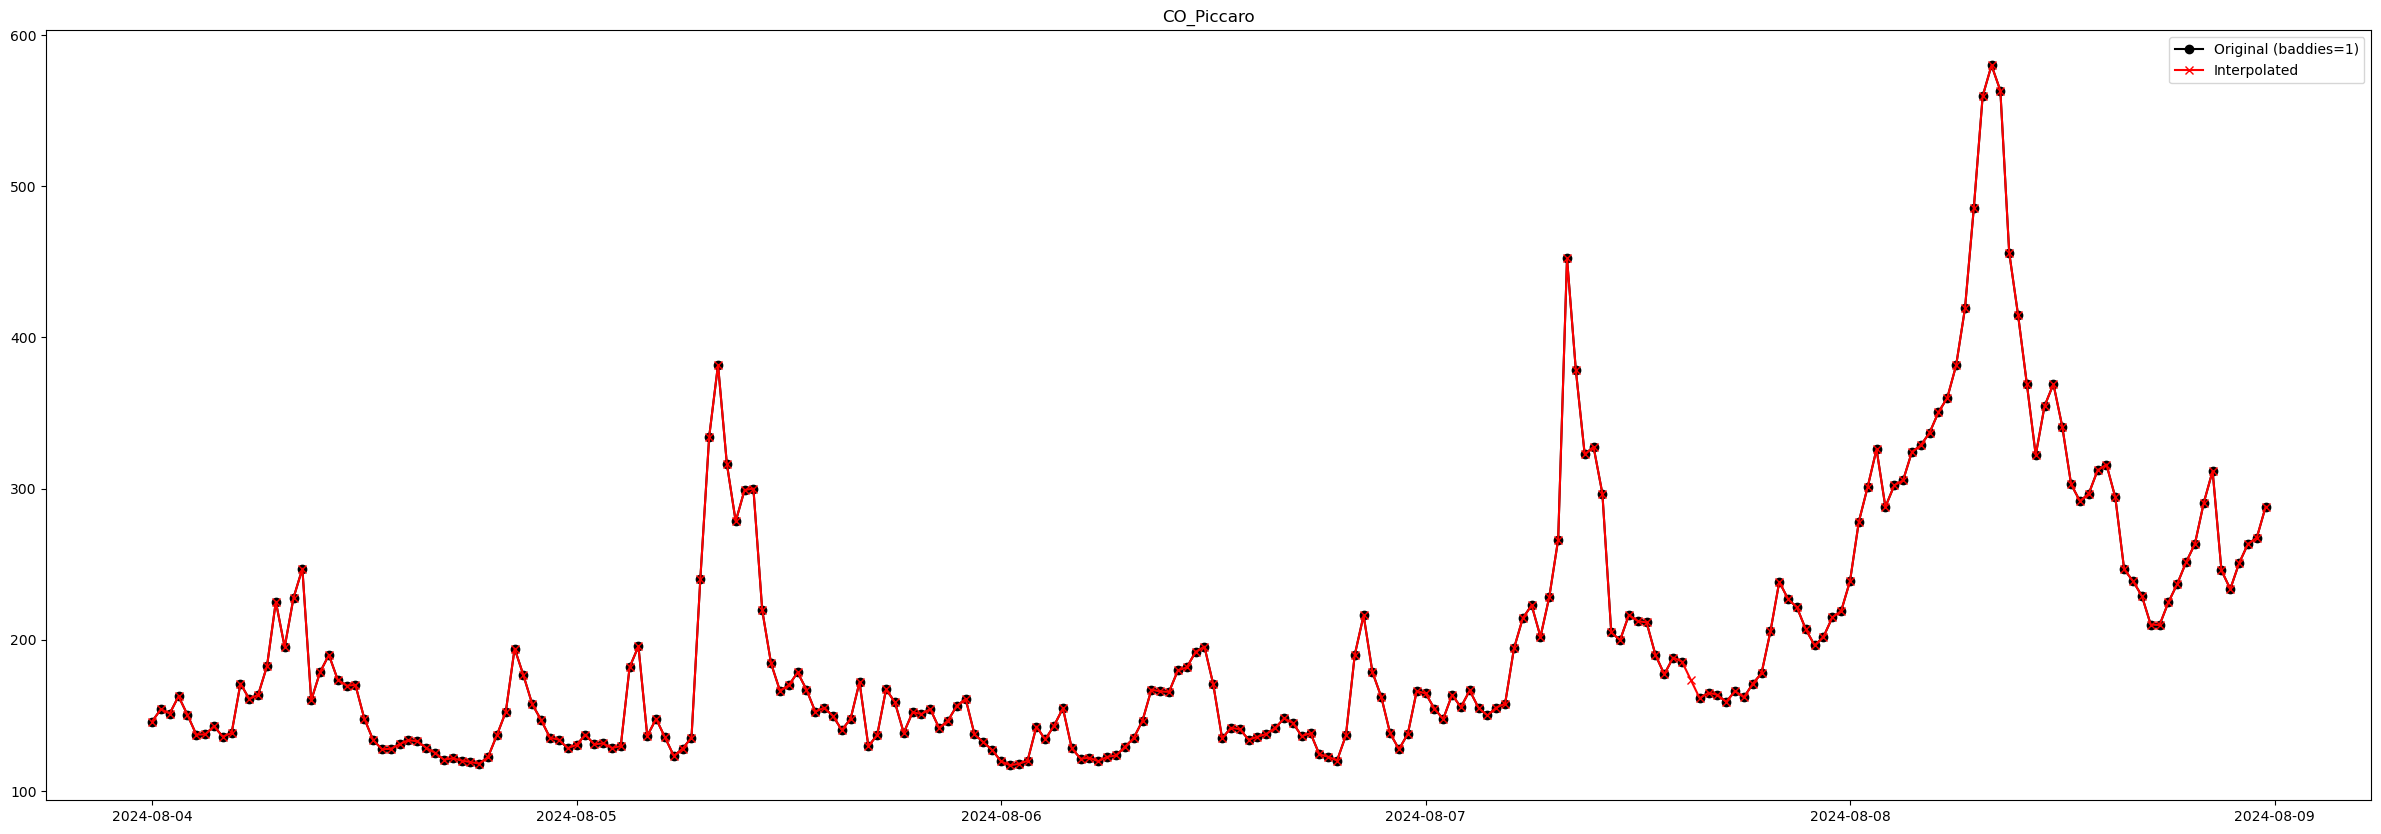

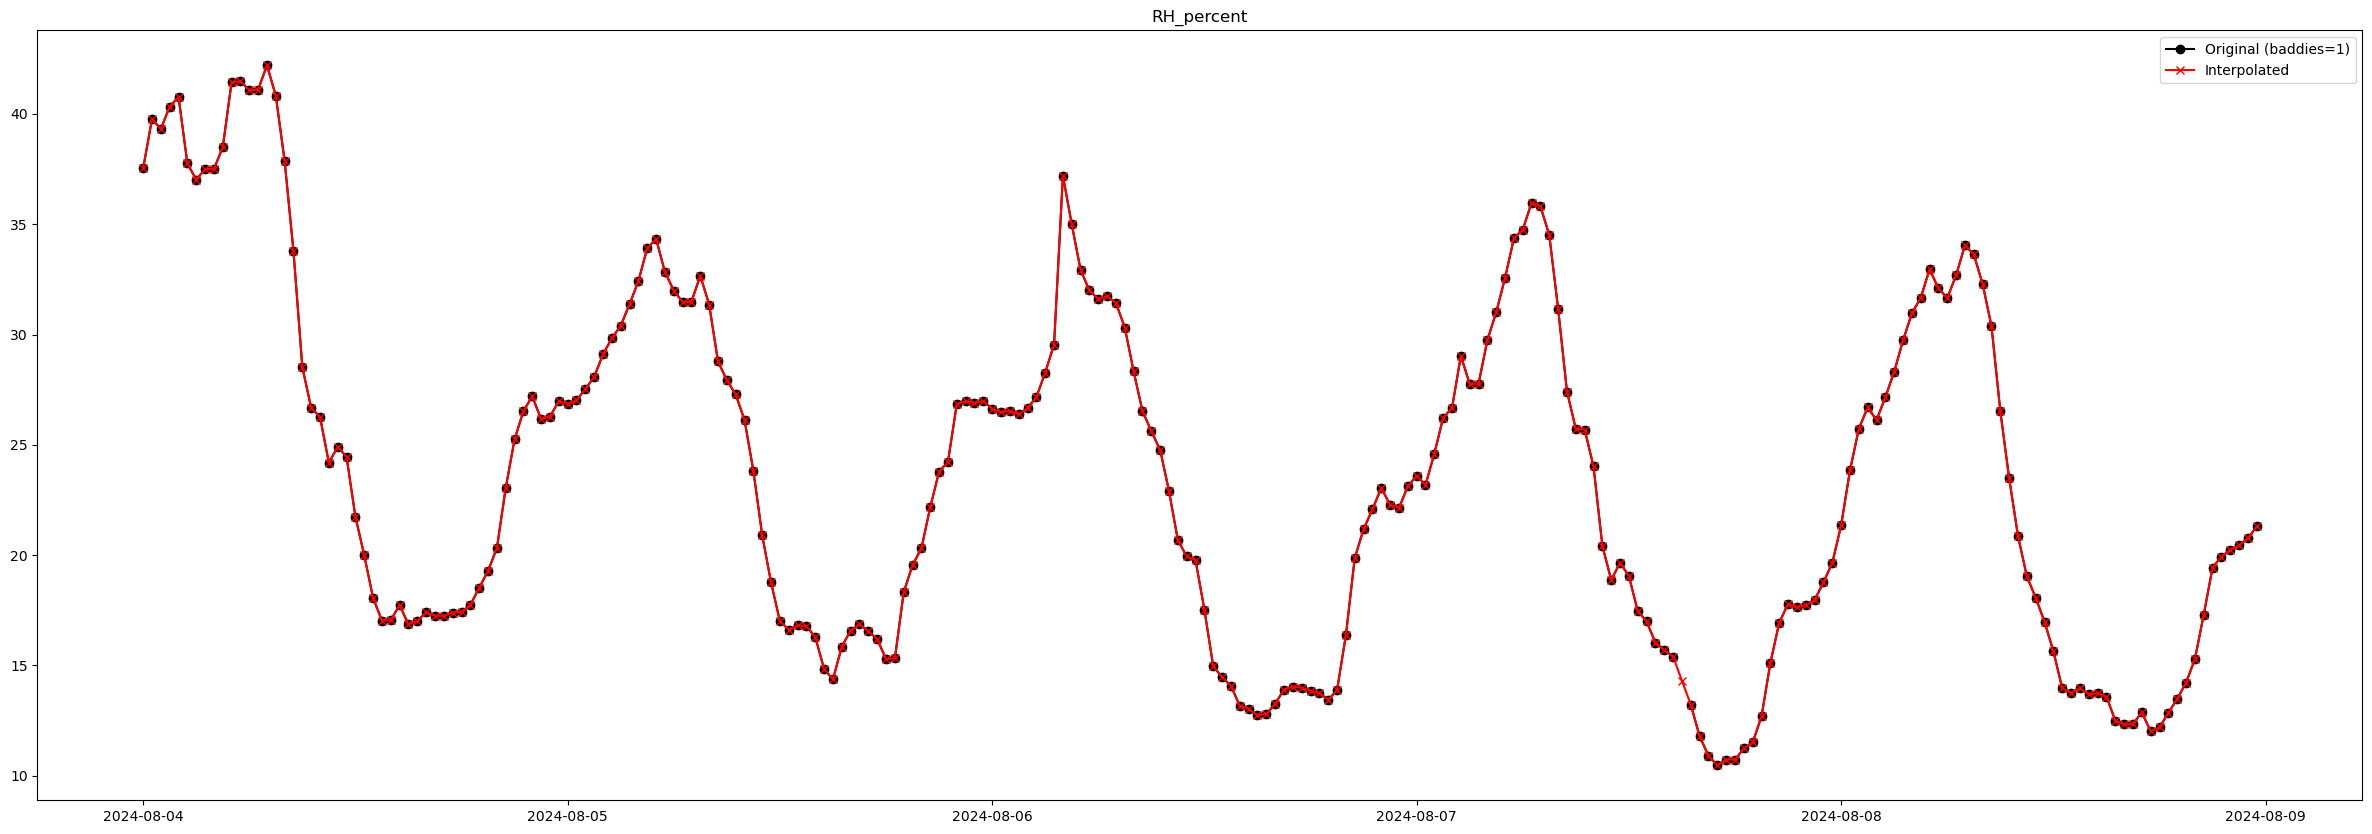

In [106]:
df_interp=df_smokefree.copy()
df_interp['PAN_CIMS'].mask(df_interp['PAN_CIMS'].isna(), 0.2)

for i,col in enumerate(vars2fill):
    # Set any negative values to NaN so we can interp them... 
    df_interp[col] = df_interp[col].mask(df_interp[col] < 0, np.nan)
                               
    # Calc number of points that are negative or Nans: 
    n_baddies= len([item for item in df_smokefree[col] if item <0 or np.isnan(item)]) 
      
    if n_baddies > 0: 
        #apply the linear interpolation
        df_interp[col] = df_interp[col].interpolate(method='linear')
        
        #Plot it so we can take a look at it... 
        fig, ax = plt.subplots(figsize = (30,10))
        plt.plot(df_smokefree.index, df_smokefree[col], color='k', marker='o',label=f'Original (baddies={n_baddies})')
        plt.plot(df_interp.index, df_interp[col], color='r', marker='x', label='Interpolated')
        plt.legend()
        plt.title(col)
        
        # plt.hlines(y=0, xmin = df_interp.index[0], xmax = df_interp.index[239])
        # # ax.set_xticks(range(0,len(df_smokefree.index),2))
        # # labels=df_smokefree.index.strftime('%H')[0::2])
        # # plt.yticks(ticks=np.arange(len(df_transposed_smokefree.index)), labels=df_transposed_smokefree.index)
        # # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))
        # # ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
        # # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        # # ax.set_title(col)
        
        # # Define start and end times for the plot
        # # start_time = df.index.min().replace(hour=0, minute=0, second=0, microsecond=0)
        # # end_time = df.index.min().replace(hour=23, minute=30, second=0, microsecond=0)
        # # start_time = 
        # # end_time = 
        # # #Set x-axis limits
        # # ax.set_xlim(start_time, end_time)
        # plt.show()

In [62]:
df_interp=df_smokefree.copy()
df_interp['PAN_CIMS'] = df_interp['PAN_CIMS'].fillna(value = 0.2)

In [63]:
df_interp['PPN_CIMS'] = df_interp['PPN_CIMS'].fillna(value = 0.01)

Text(0.5, 1.0, 'PAN with background')

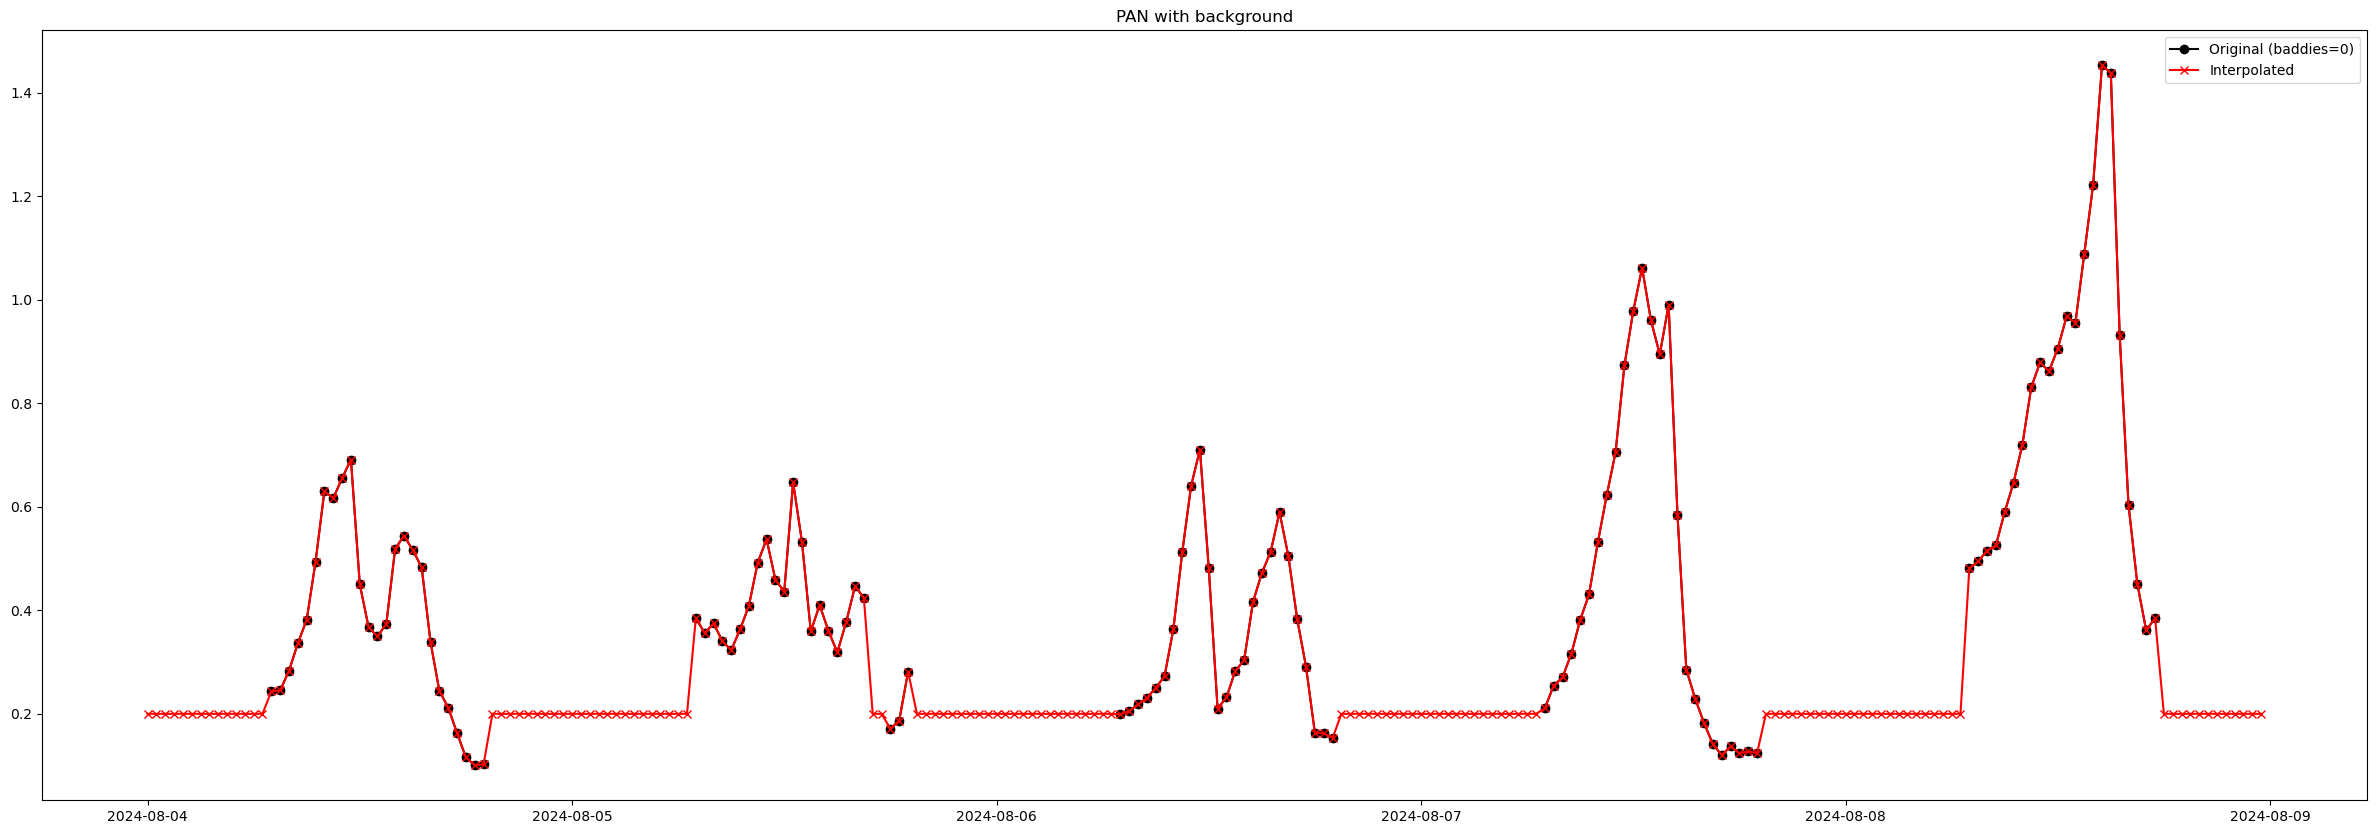

In [65]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_smokefree.index, df_smokefree['PAN_CIMS'], color='k', marker='o',label=f'Original (baddies={n_baddies})')
plt.plot(df_interp.index, df_interp['PAN_CIMS'], color='r', marker='x', label='Interpolated')
plt.legend()
plt.title('PAN with background')

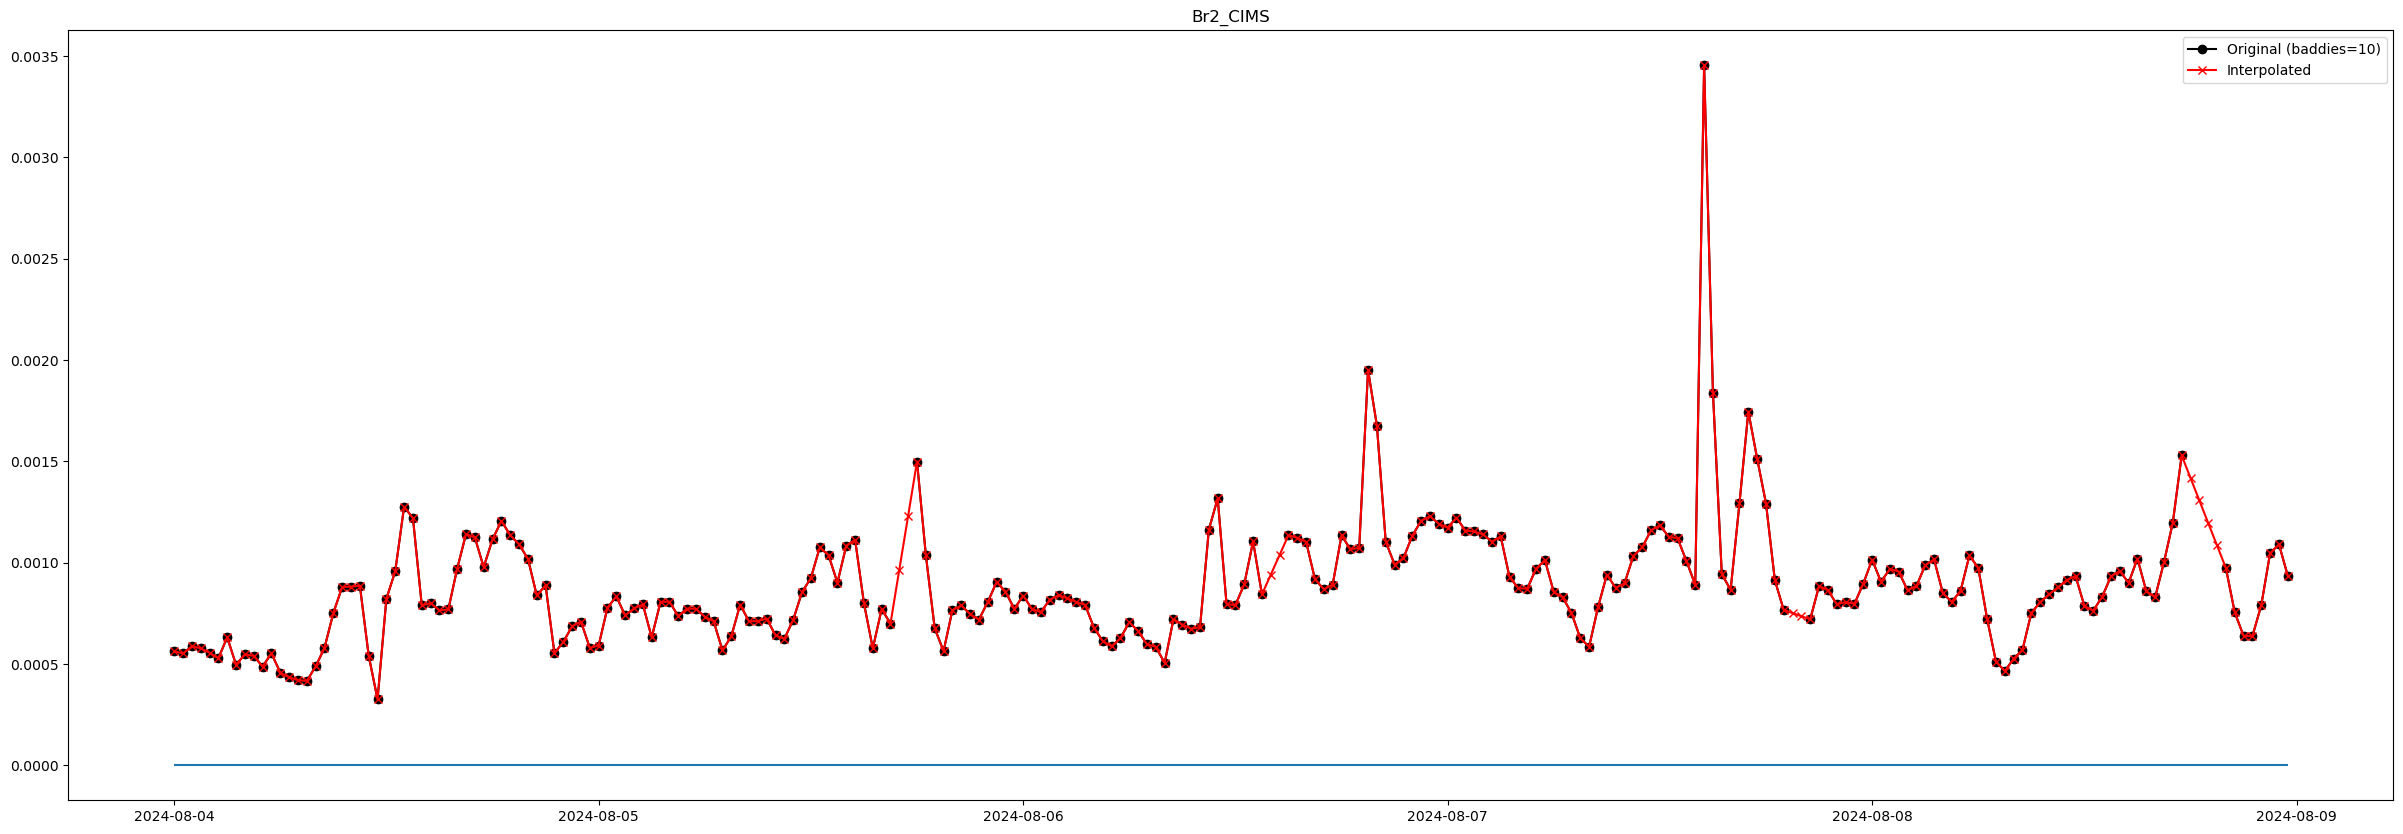

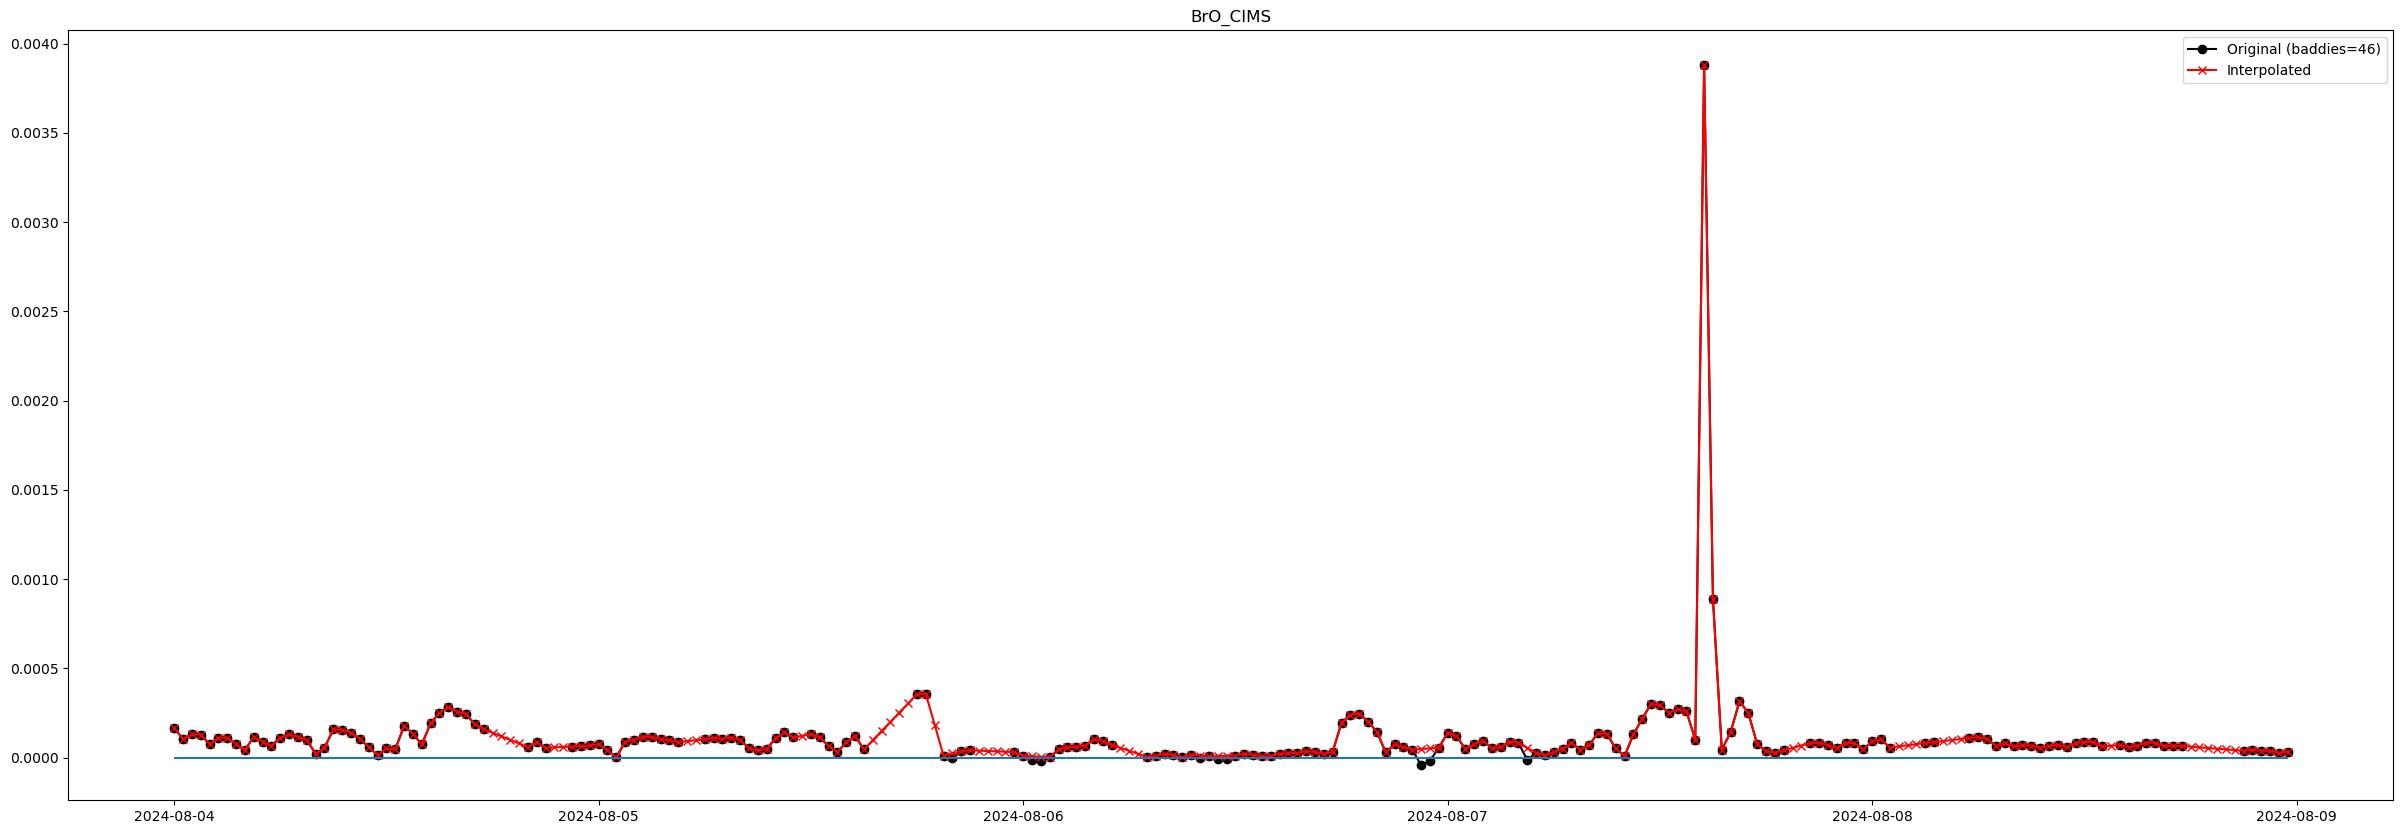

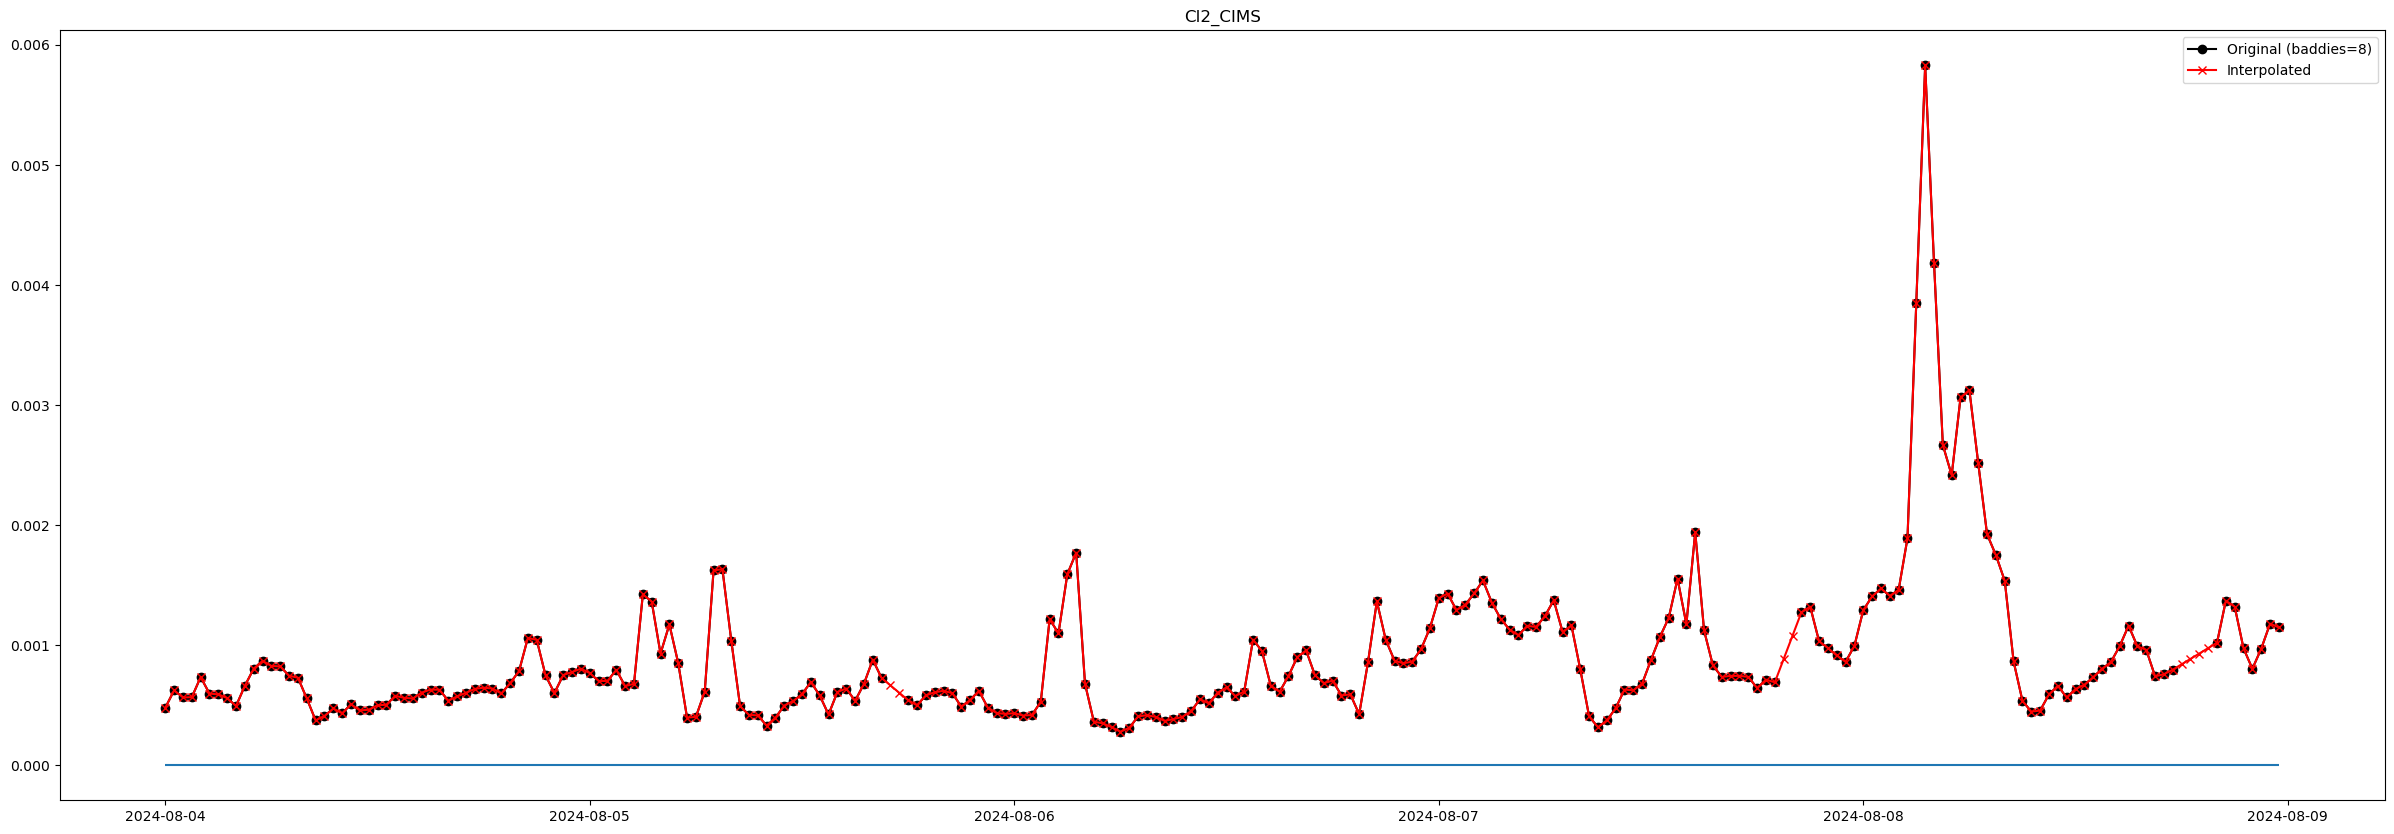

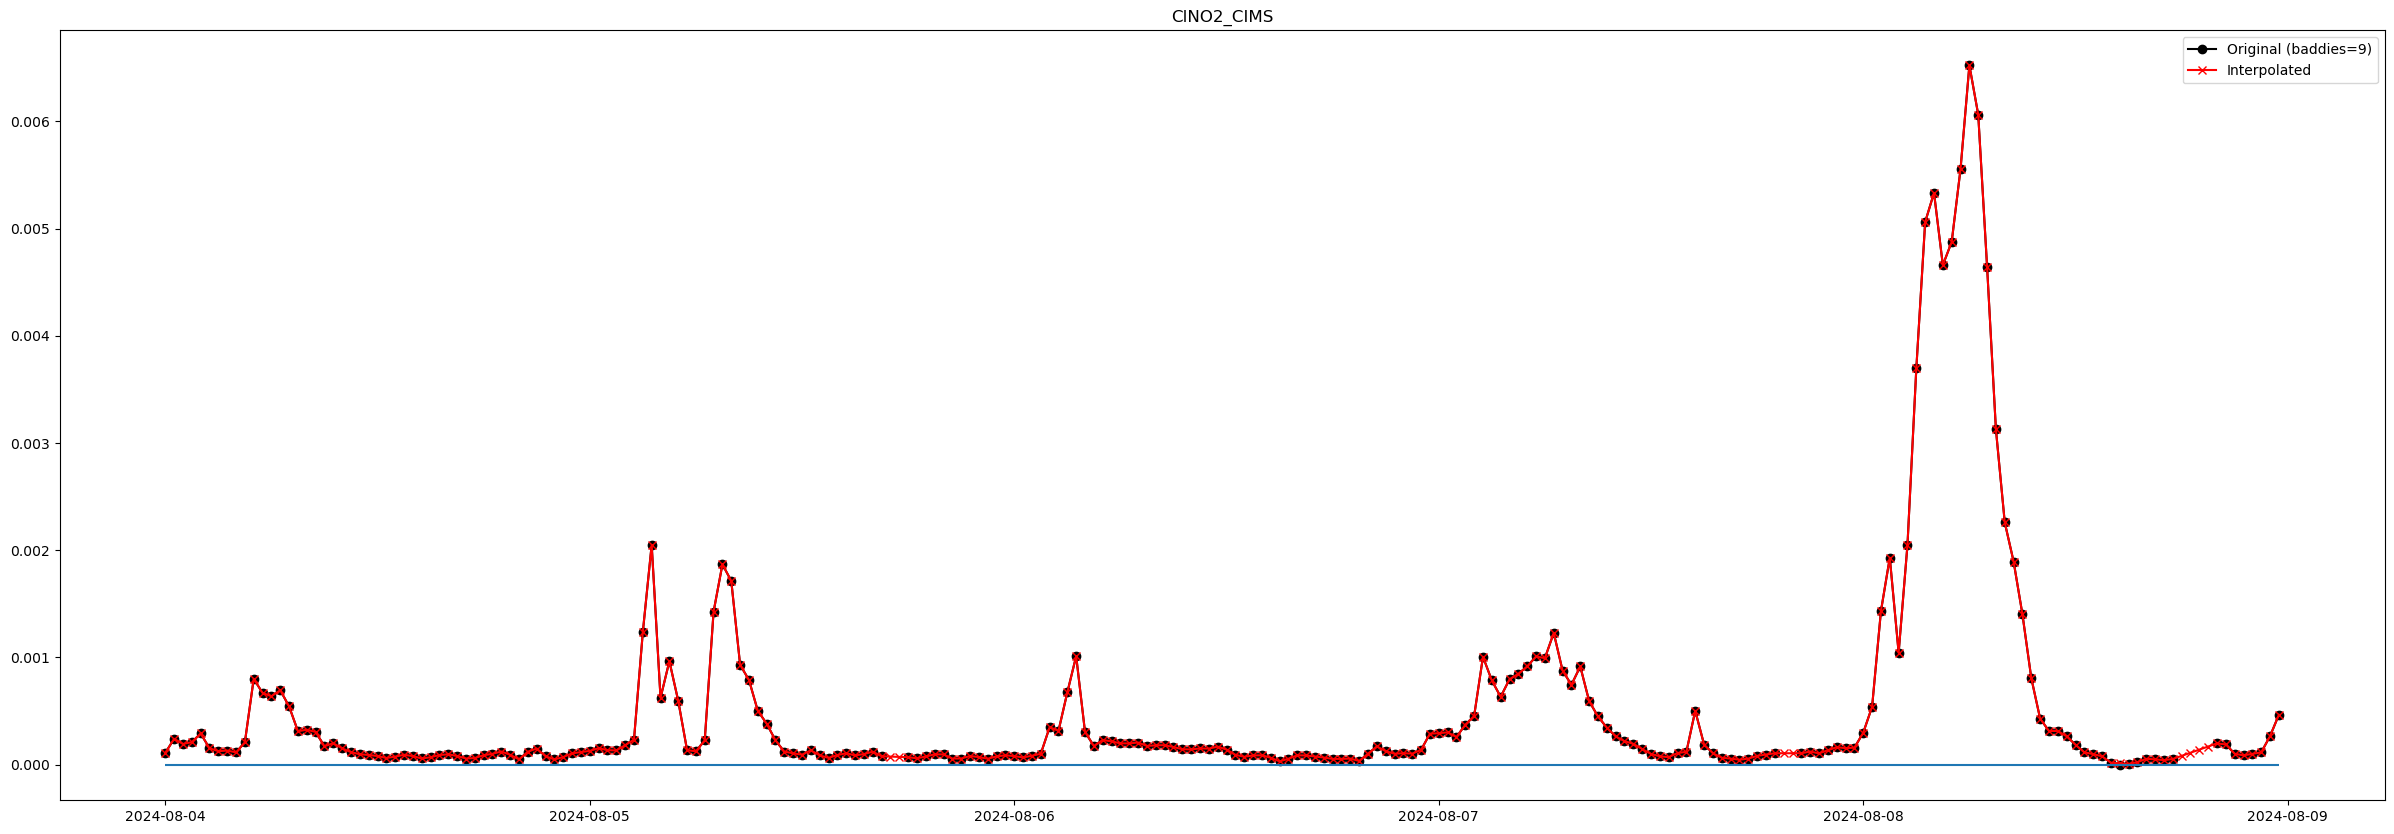

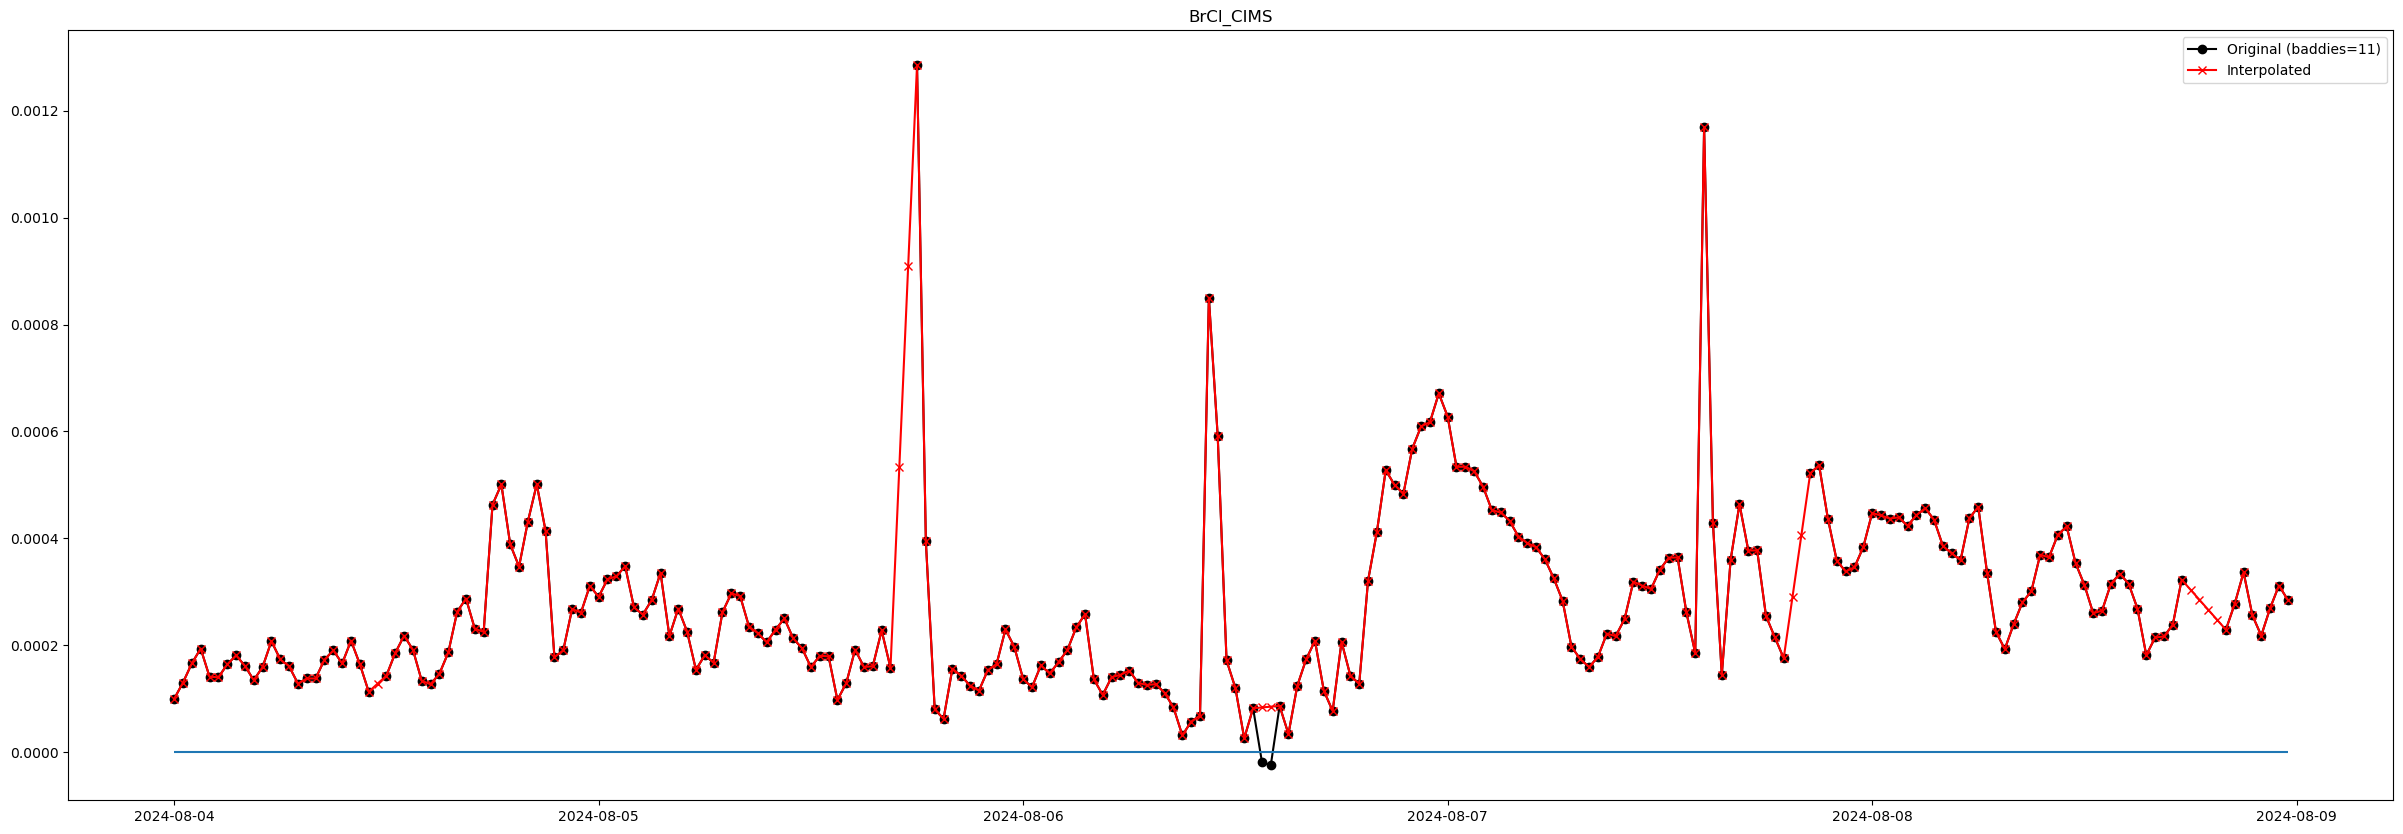

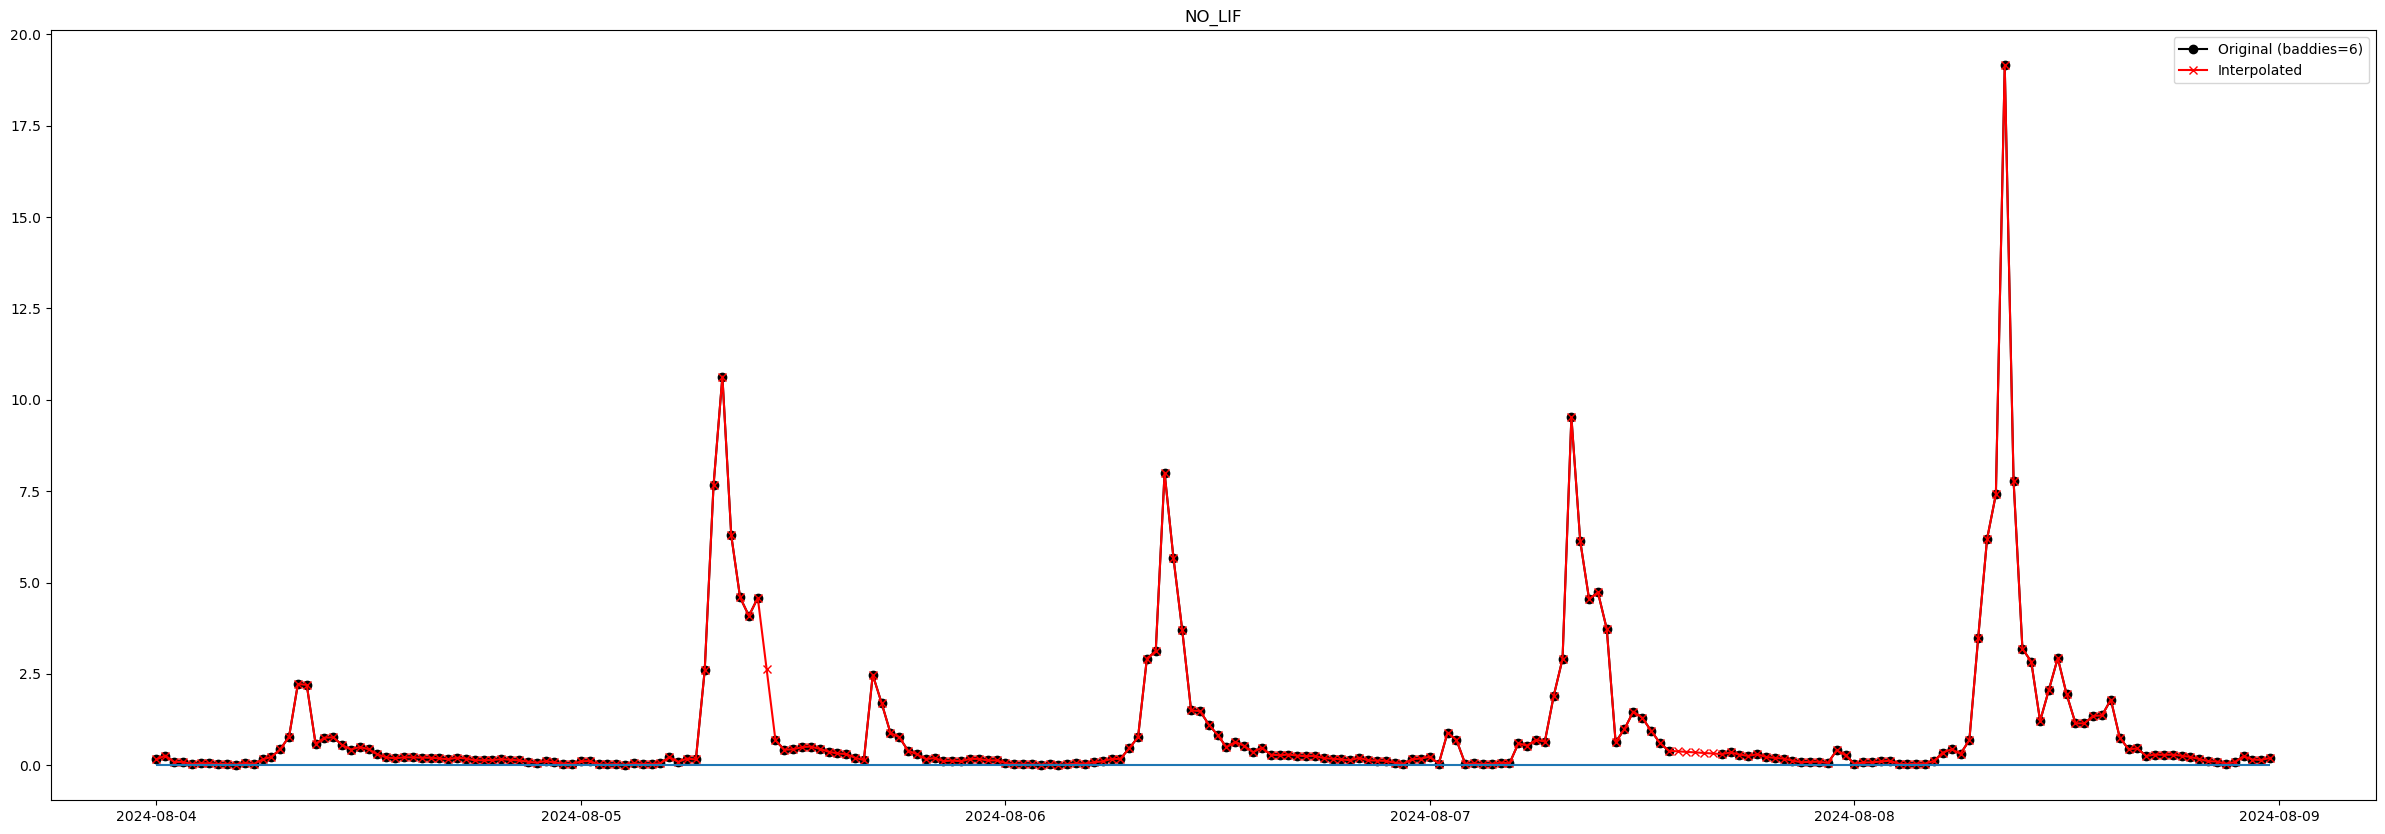

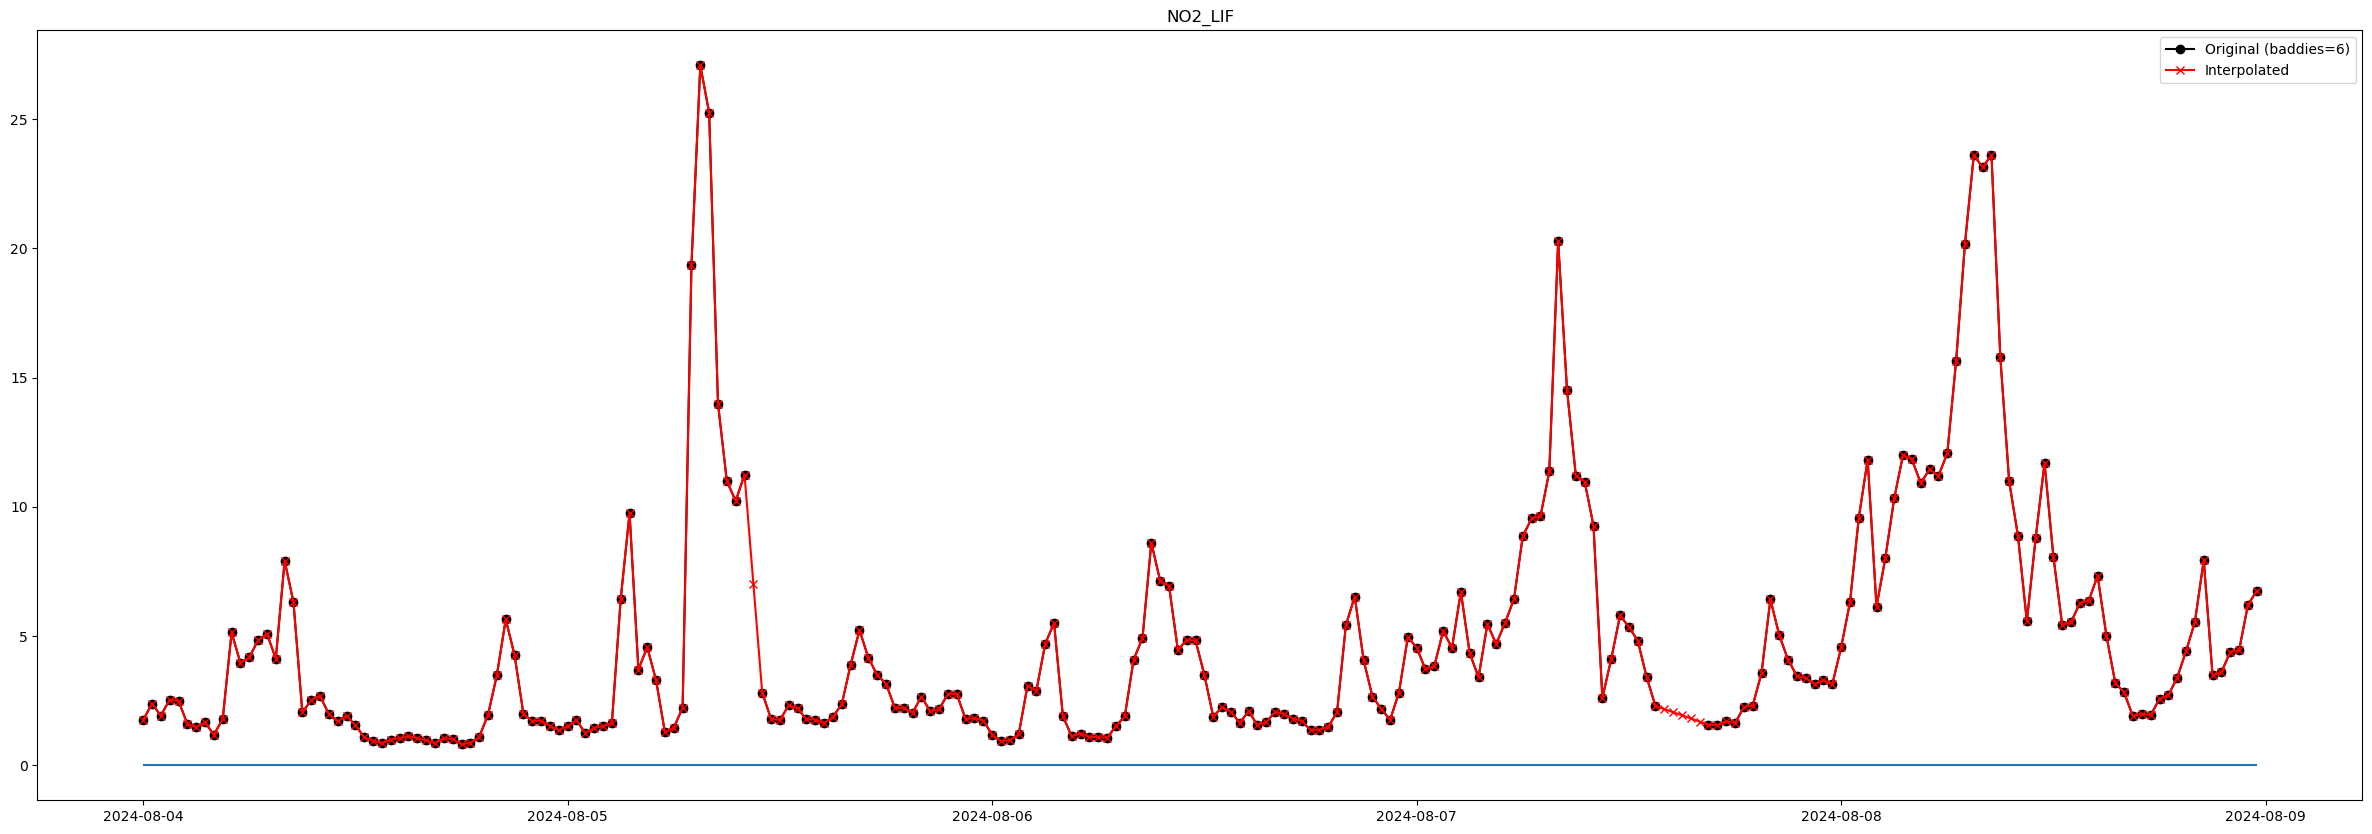

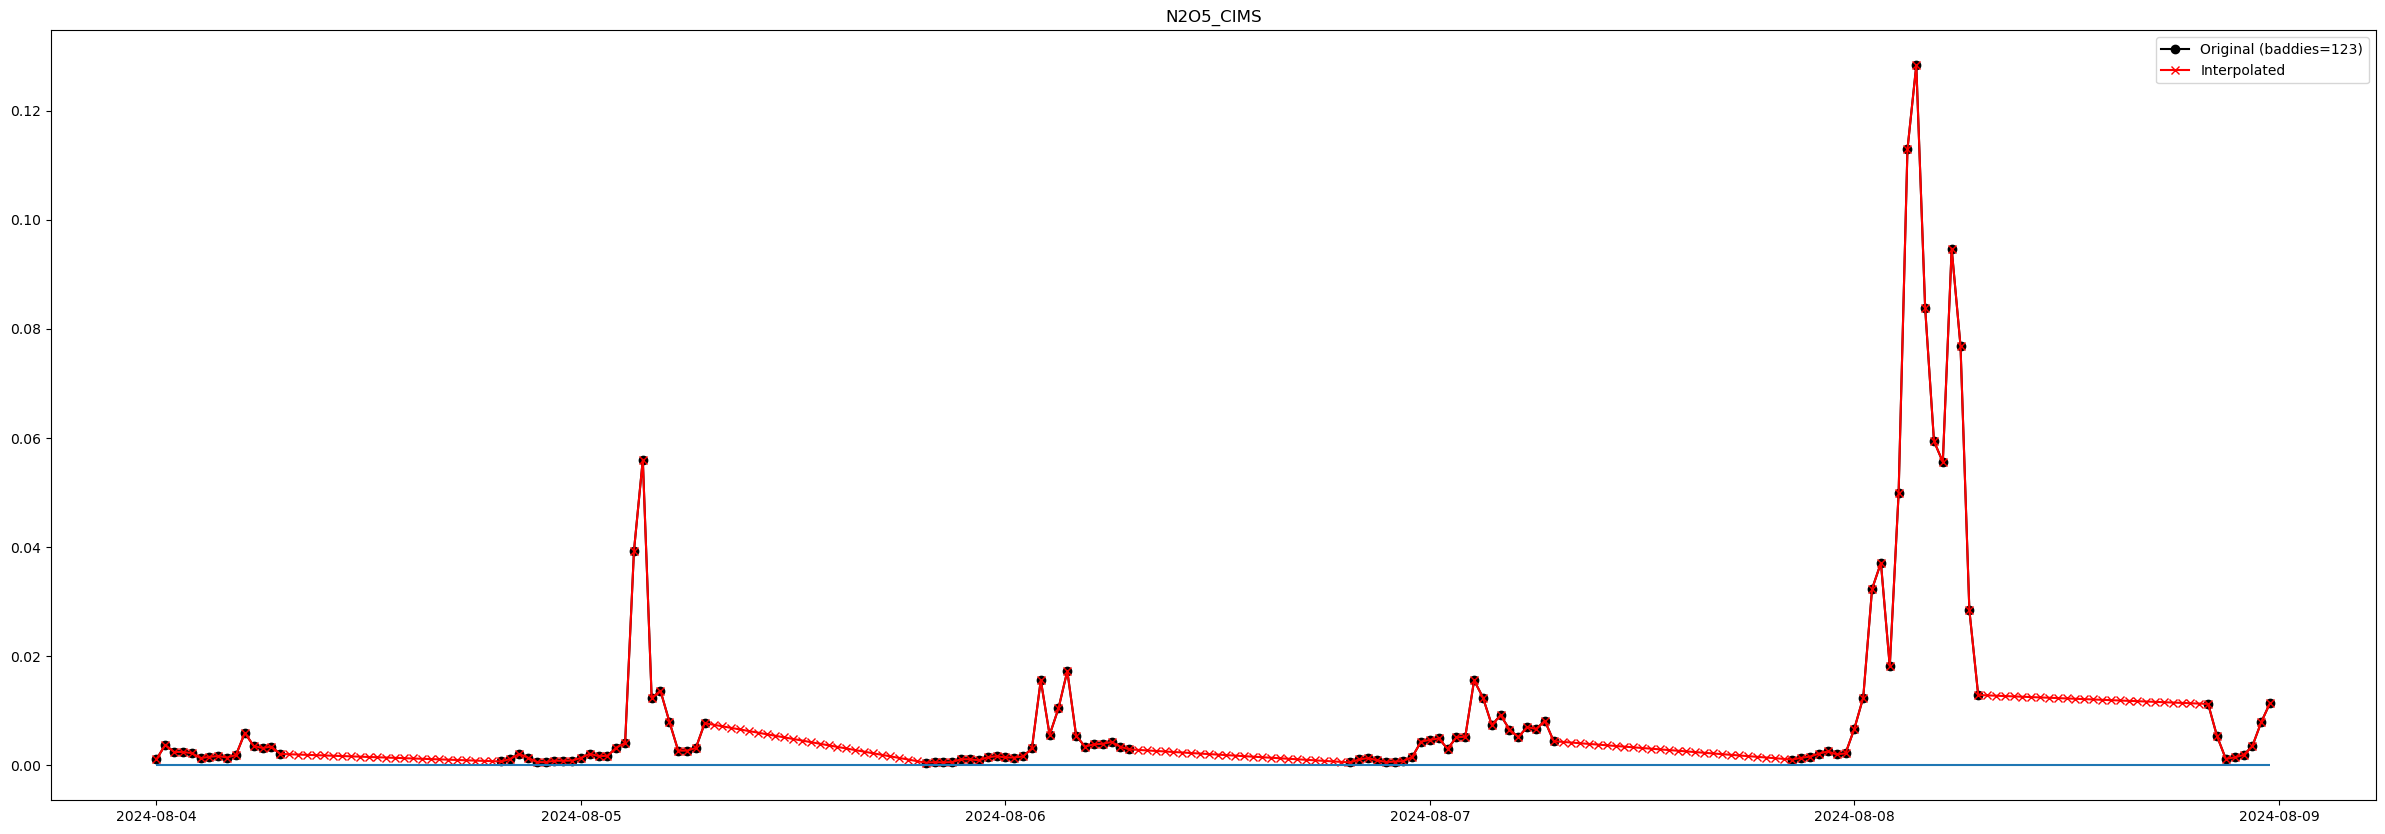

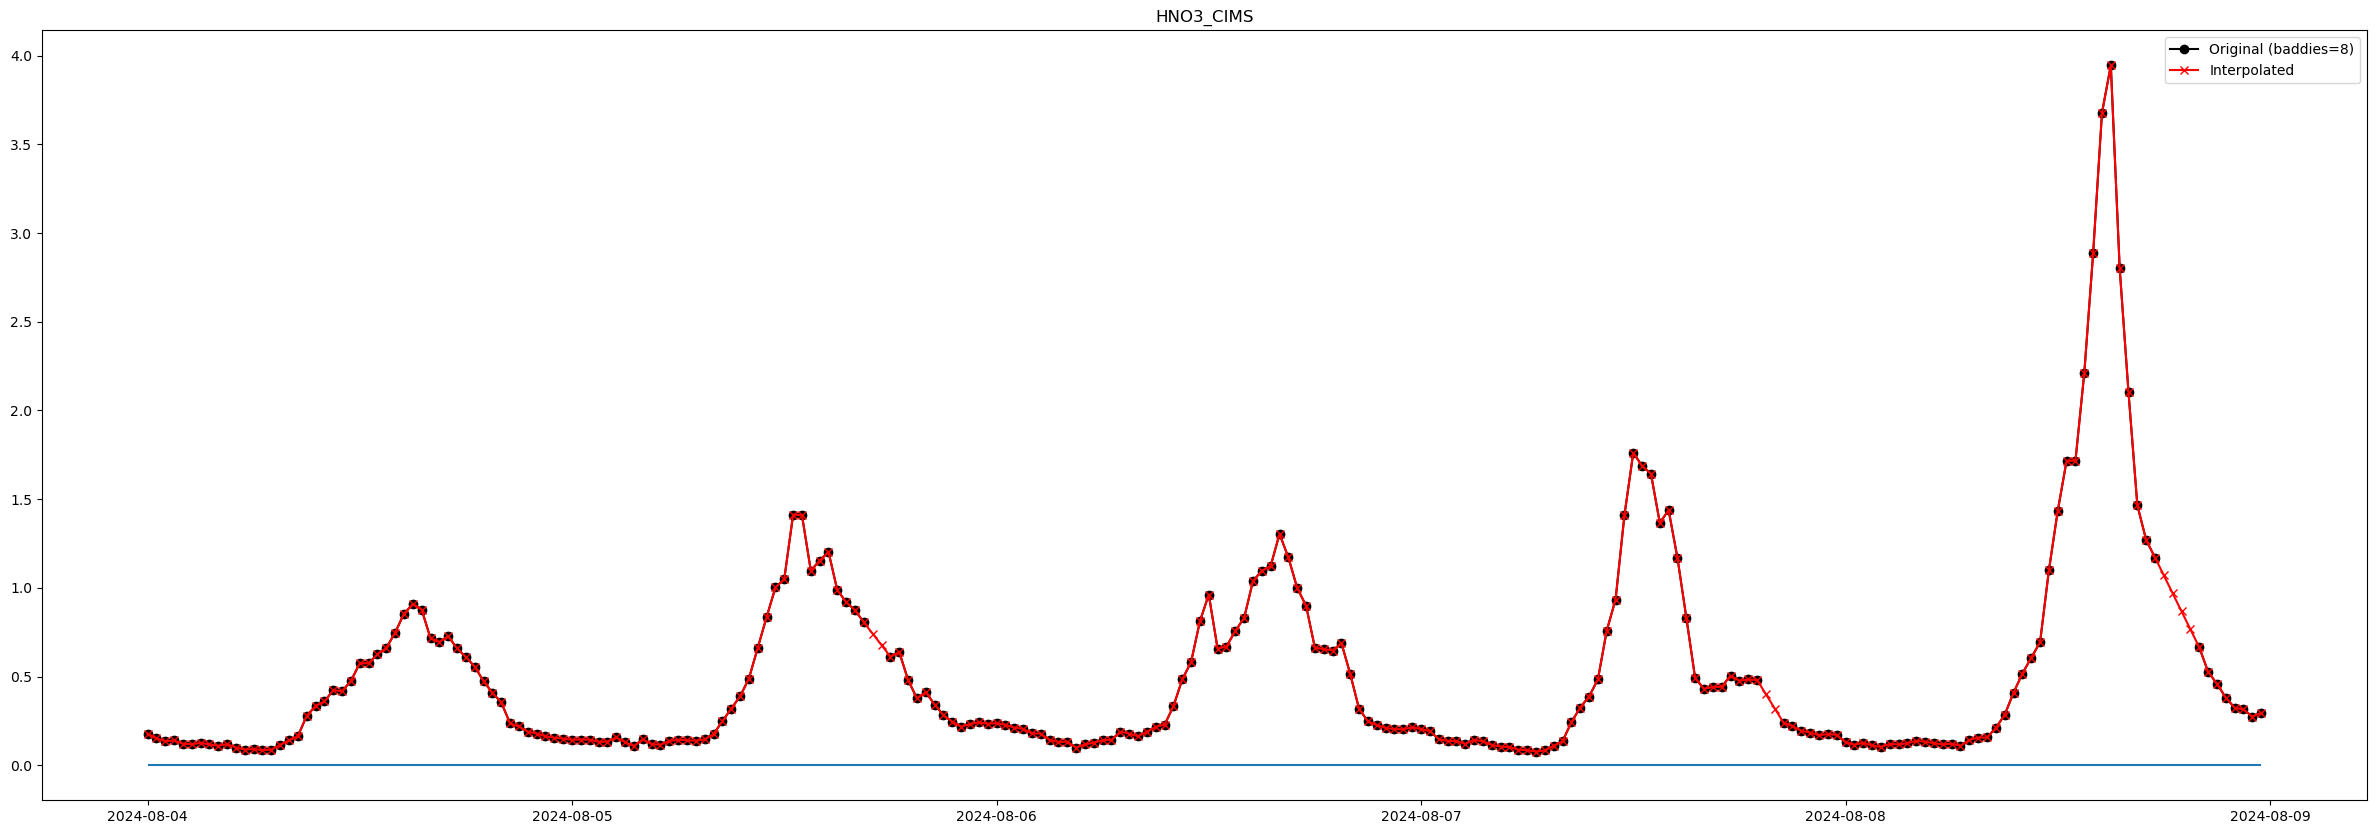

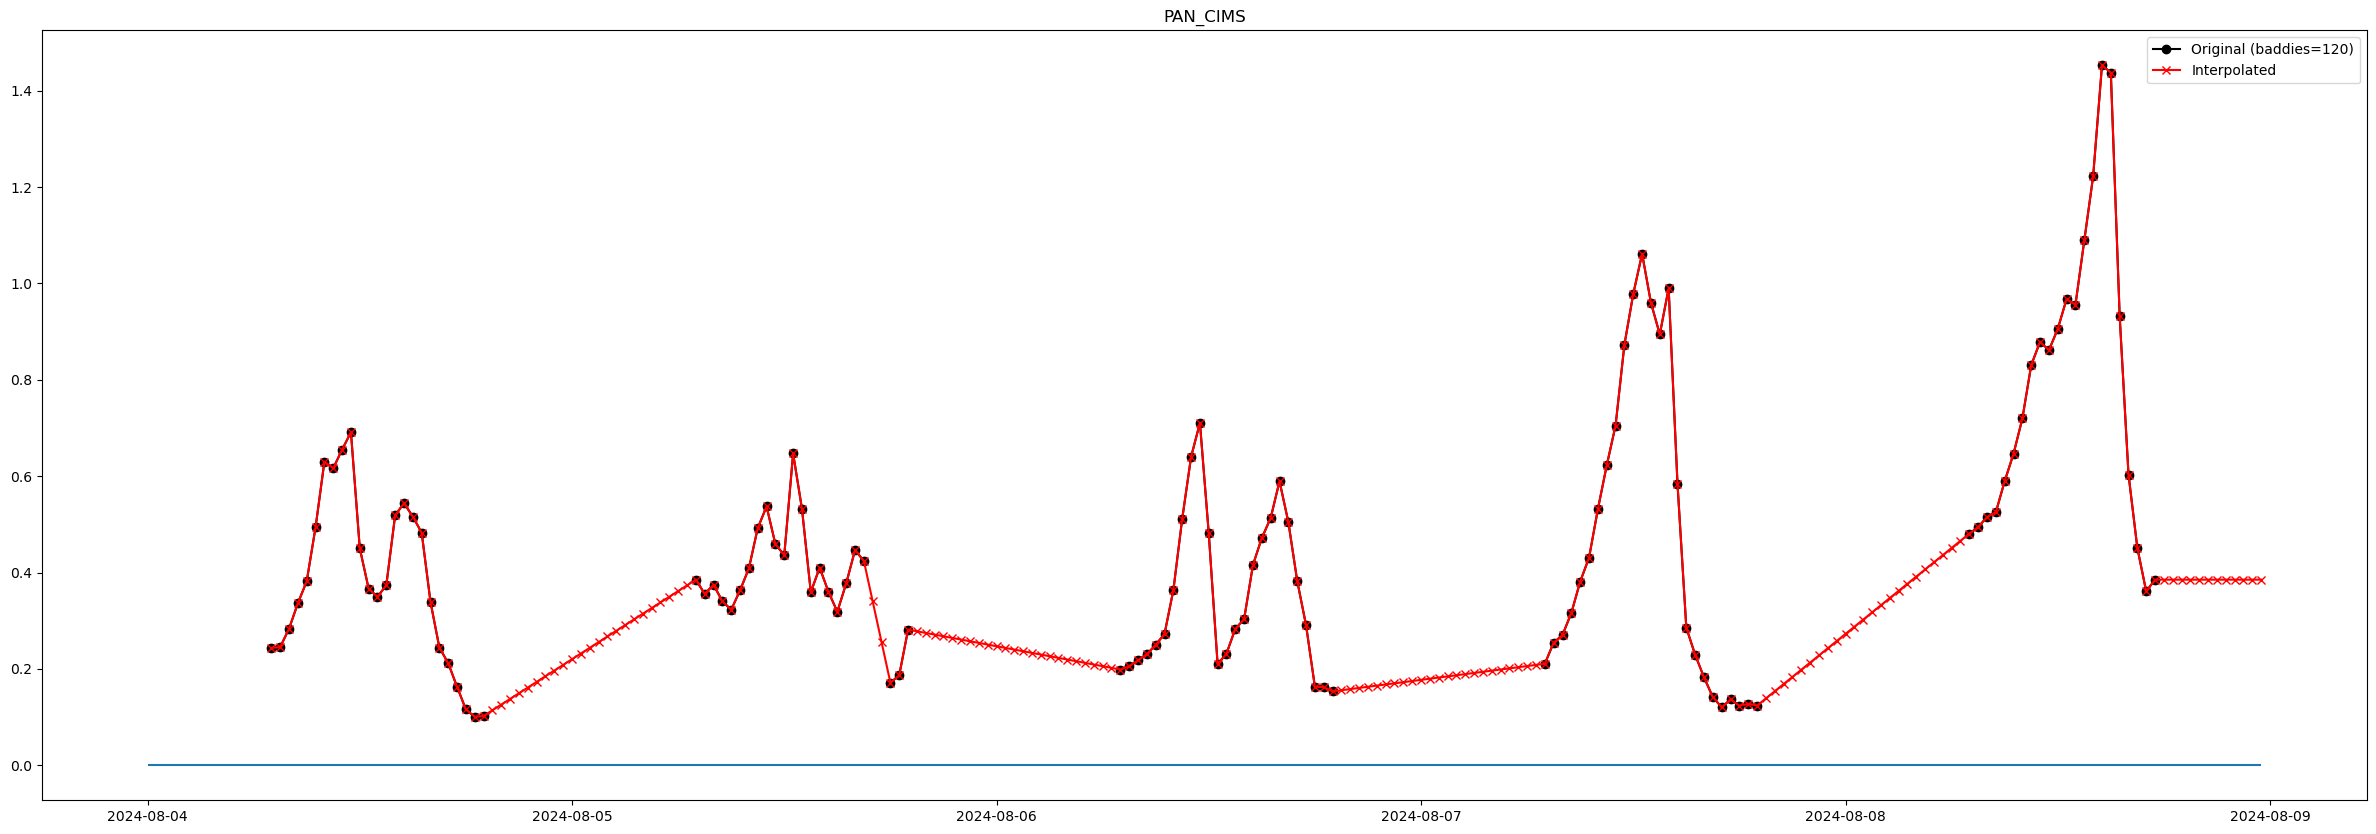

In [ ]:
fixed_ct=0; 
df_interp=df_smokefree.copy()

for i,col in enumerate(vars2fill):
    # Set any negative values to NaN so we can iterp them... 
    df_interp[col] = df_interp[col].mask(df_interp[col] < 0, np.nan)
    print(col)                           
    # # Calc number of points that are negative or Nans: 
    # n_baddies= len([item for item in df_smokefree[col] if item <0 or np.isnan(item)])                    
    # if n_baddies > 0: 
    #     if fixed_ct<10: 
    #         #apply the linear interpolation
    #         df_interp[col] = df_interp[col].interpolate(method='linear')
    #         #Plot it so we can take a look at it... 
    #         fig, ax = plt.subplots(figsize = (30,10))
    #         plt.plot(df_smokefree.index, df_smokefree[col], color='k', marker='o',label=f'Original (baddies={n_baddies})')
    #         plt.plot(df_interp.index, df_interp[col], color='r', marker='x', label='Interpolated')
    #         plt.legend()
    #         plt.title(col)
            
    #         plt.hlines(y=0, xmin = df_interp.index[0], xmax = df_interp.index[239])
    #         # ax.set_xticks(range(0,len(df_smokefree.index),2))
    #         # labels=df_smokefree.index.strftime('%H')[0::2])
    #         # plt.yticks(ticks=np.arange(len(df_transposed_smokefree.index)), labels=df_transposed_smokefree.index)
    #         # ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))
    #         # ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #         # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    #         # ax.set_title(col)
            
    #         # Define start and end times for the plot
    #         # start_time = df.index.min().replace(hour=0, minute=0, second=0, microsecond=0)
    #         # end_time = df.index.min().replace(hour=23, minute=30, second=0, microsecond=0)
    #         # start_time = 
    #         # end_time = 
    #         # #Set x-axis limits
    #         # ax.set_xlim(start_time, end_time)
    #         plt.show()
    #     fixed_ct=fixed_ct+1

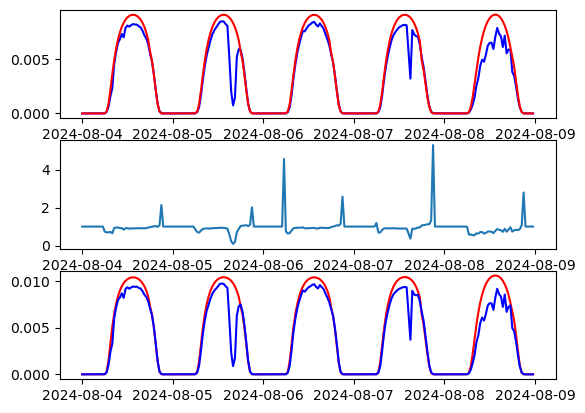

In [108]:
# Take care of the holes in the measured data. Fill with values from ?? 
fig, axs=plt.subplots(nrows=3,ncols=1)
# define ration: 
df_interp['jNO2_ratio'] = df_interp['jNO2_meas']/df_interp['jNO2']

# Take care of last inf values from denominatore super small... 
msk = ((df_interp['jNO2_ratio'] ==np.inf)  | (df_interp['jNO2_ratio'] >10) )
df_interp.loc[msk,'jNO2_ratio'] = 1.0


axs[0].plot(df_interp.index, df_interp['jNO2_meas'],'b')
axs[0].plot(df_interp.index, df_interp['jNO2'],'r')
axs[1].plot(df_interp.index, df_interp['jNO2_ratio'])
axs[2].plot(df_interp.index, df_interp['jBrCl'], 'r')
axs[2].plot(df_interp.index, df_interp['jBrCl']*df_interp['jNO2_ratio'], 'b')








#print(df_interp['jNO2_ratio'].values )

Text(0.5, 1.0, 'jNO2 Ratio')

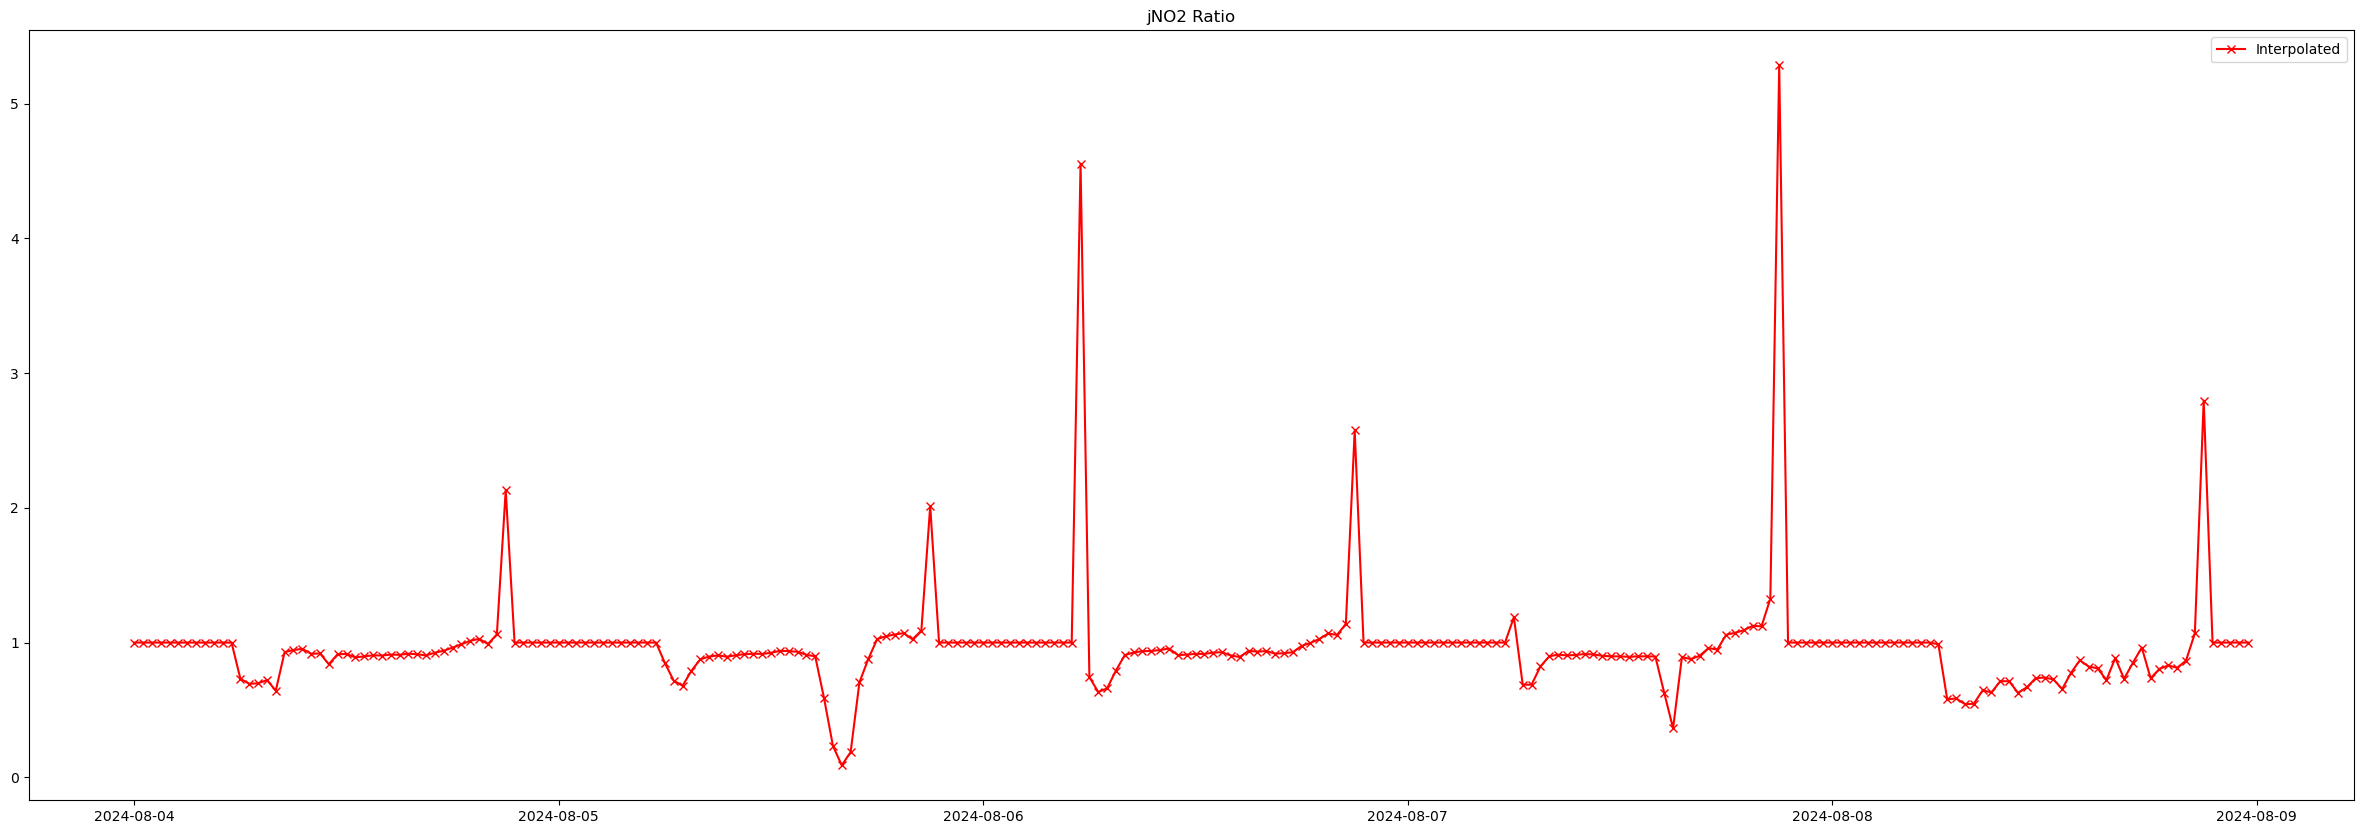

In [103]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_interp.index,df_interp['jNO2_ratio'] , color='r', marker='x', label='Interpolated')
plt.legend()
plt.title('jNO2 Ratio')

In [53]:
df_interp['jNO2'].values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.99310116e-13, 3.64507239e-08,
       1.13253192e-05, 2.02873070e-04, 9.13443889e-04, 2.19644489e-03,
       3.63203778e-03, 4.90550444e-03, 5.94869667e-03, 6.77904556e-03,
       7.43034000e-03, 7.93481111e-03, 8.31643111e-03, 8.60335111e-03,
       8.81251222e-03, 8.95069667e-03, 9.02985778e-03, 9.05562222e-03,
       9.02979111e-03, 8.95048000e-03, 8.81217778e-03, 8.60268444e-03,
       8.31524111e-03, 7.93284556e-03, 7.42715778e-03, 6.77419333e-03,
       5.68562303e-03, 4.85248222e-03, 3.57160556e-03, 2.14114356e-03,
       8.82060222e-04, 1.93282958e-04, 1.02634006e-05, 3.01244029e-08,
       4.17295942e-14, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

/tmp/ipykernel_905937/4101392927.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'jO3')

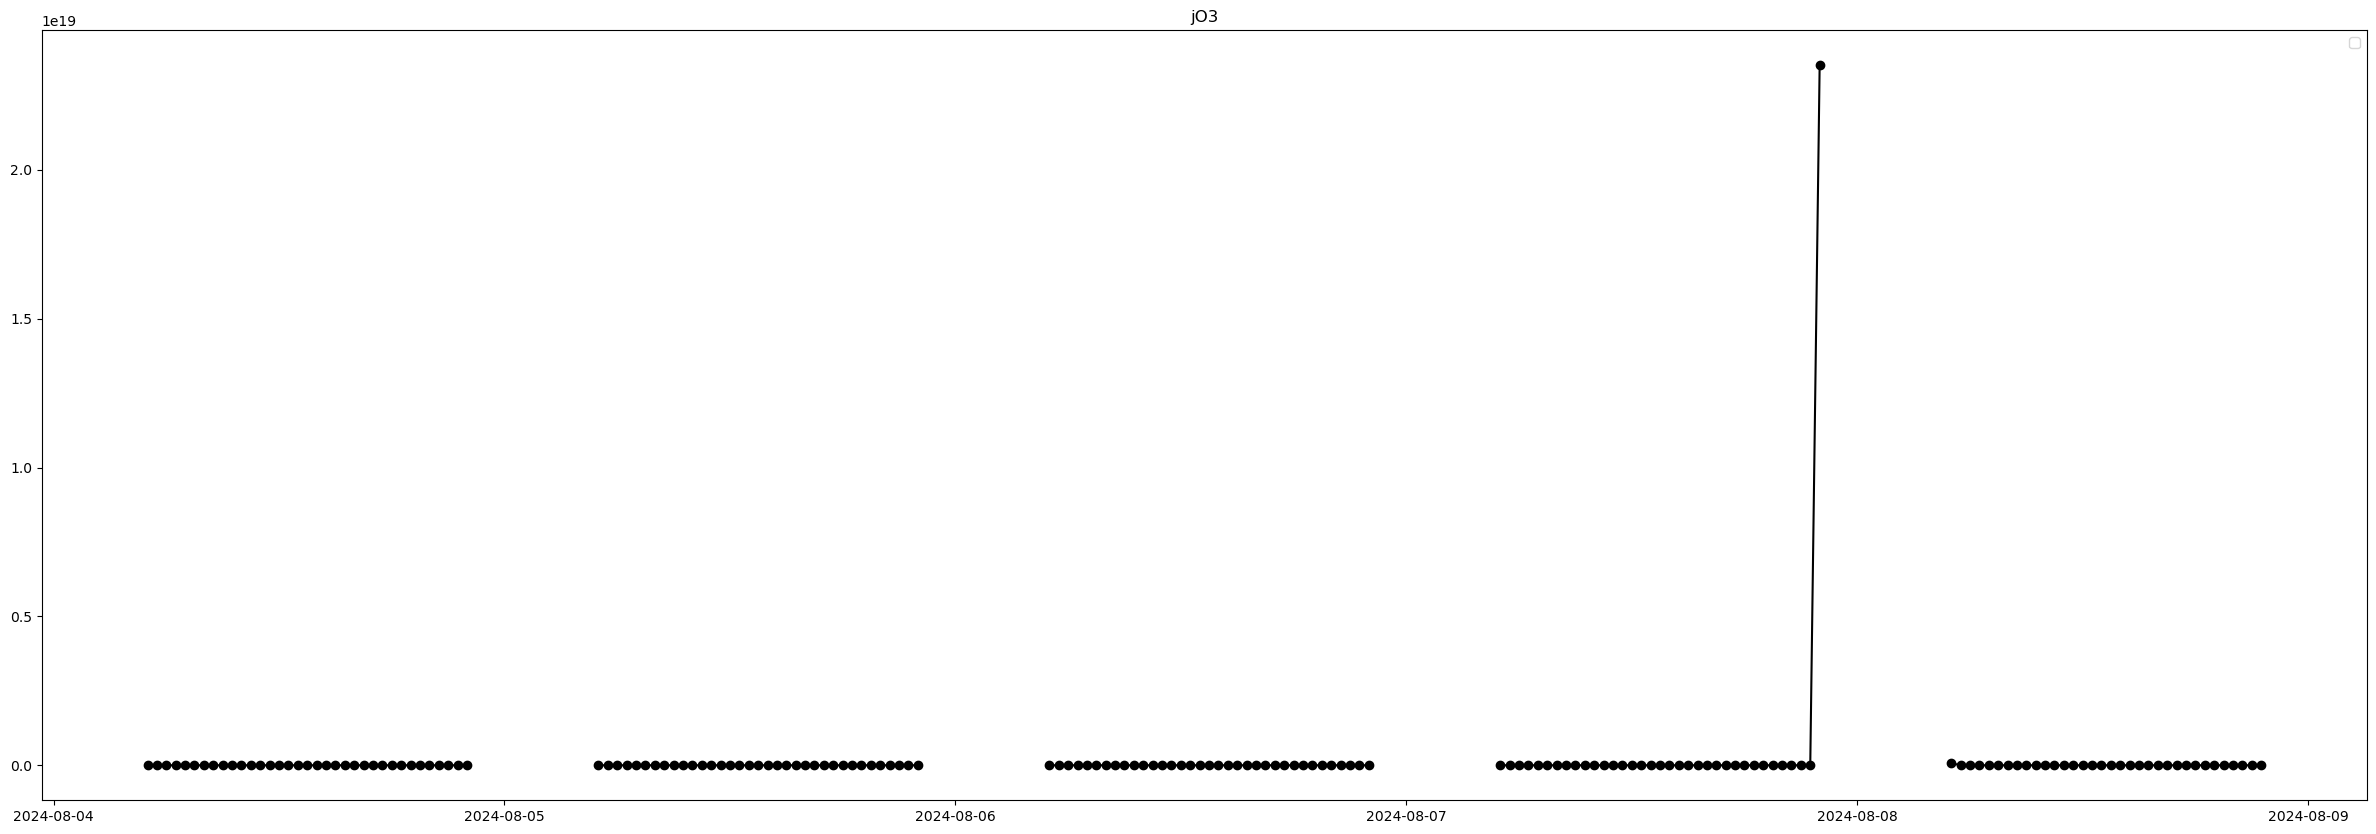

In [59]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_ratio.index, df_ratio, color='k', marker='o')
plt.legend()
plt.title(col)

/tmp/ipykernel_905937/501188274.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'jNO2 ratio obs/TUV')

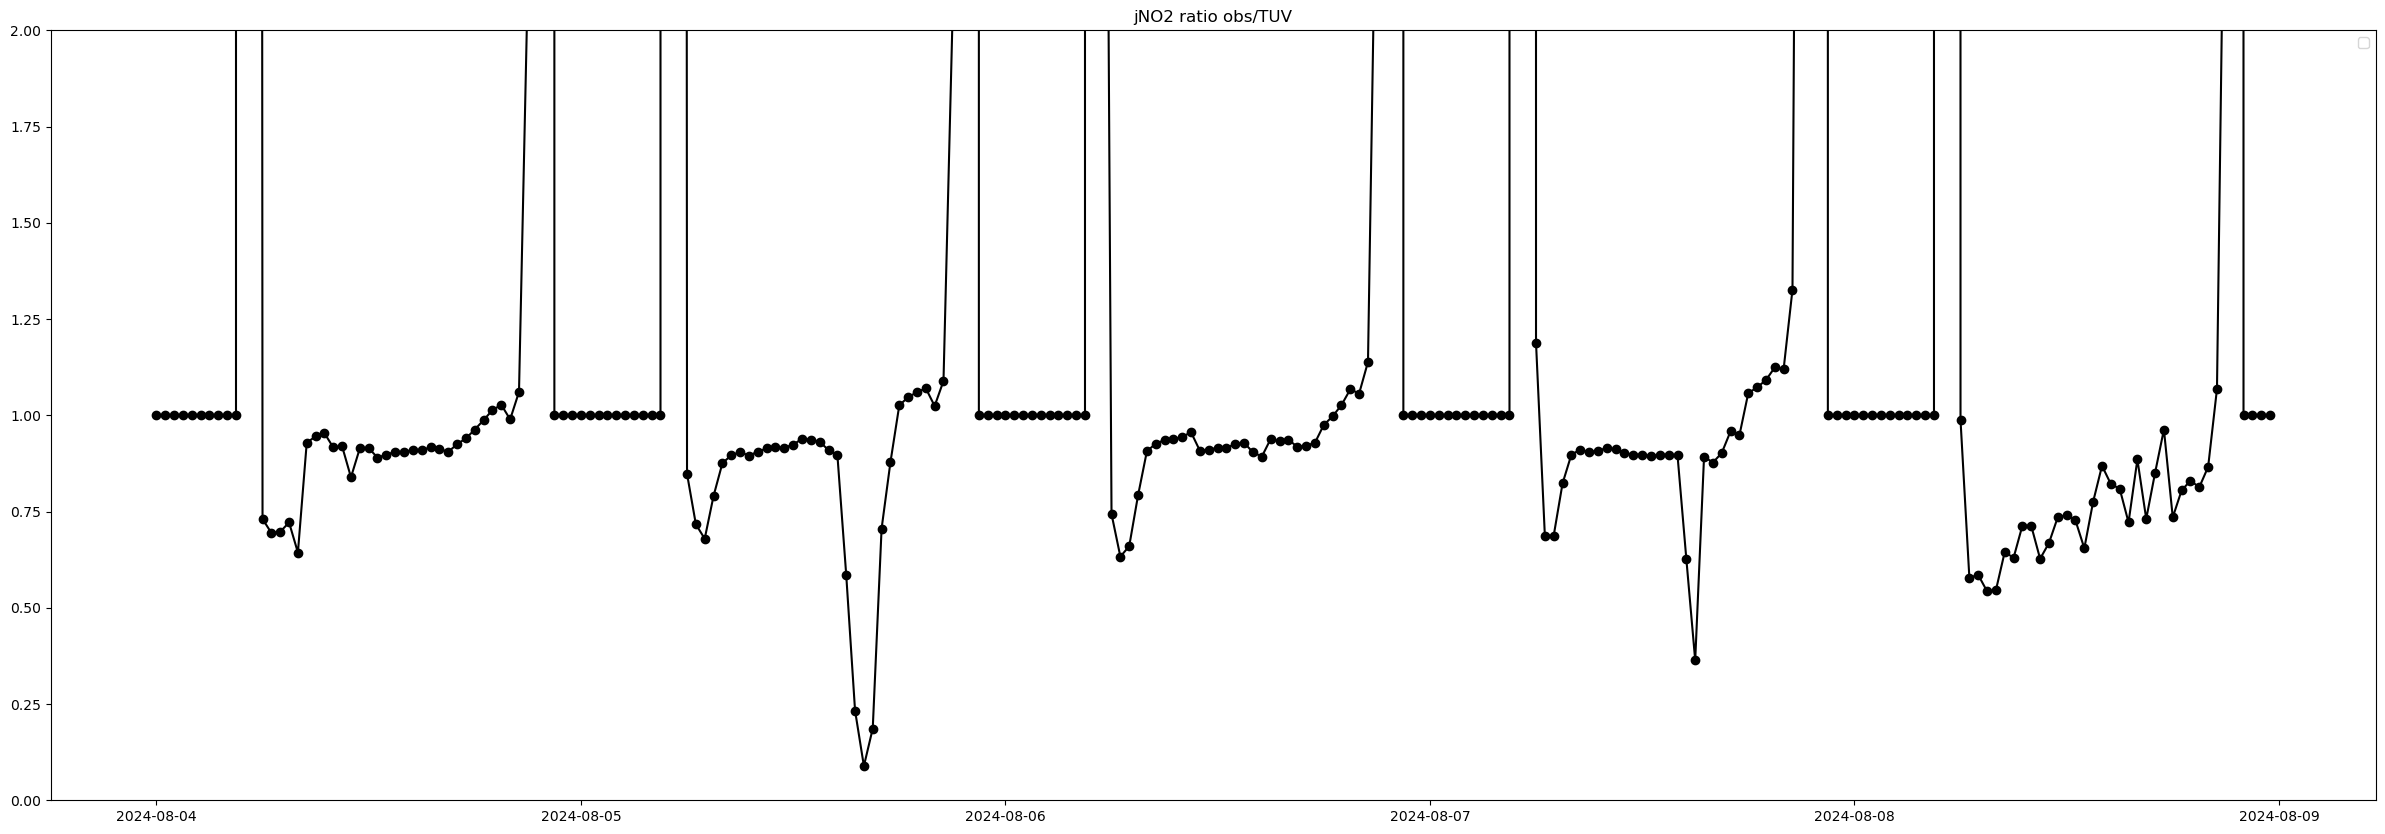

In [60]:
df_ratio.replace([np.inf, -np.inf], 1, inplace=True)
df_ratio.mask
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_ratio.index, df_ratio, color='k', marker='o')
plt.legend()
plt.ylim(0,2)
plt.title('jNO2 ratio obs/TUV')

In [33]:
df_ratio.values

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 7.08130138e+06, 3.45130951e+01,
       7.30883236e-01, 6.94314908e-01, 6.97388212e-01, 7.21650608e-01,
       6.43488993e-01, 9.29021050e-01, 9.44909893e-01, 9.53605842e-01,
       9.16409044e-01, 9.19328262e-01, 8.39014278e-01, 9.13982006e-01,
       9.14852808e-01, 8.90081802e-01, 8.97763801e-01, 9.05243409e-01,
       9.03900681e-01, 9.10884817e-01, 9.08933950e-01, 9.17447060e-01,
       9.12884106e-01, 9.04854206e-01, 9.25009851e-01, 9.40001876e-01,
       9.62883916e-01, 9.87475826e-01, 1.01356959e+00, 1.02714280e+00,
       9.89368174e-01, 1.06071264e+00, 2.13071940e+00, 1.88839882e+02,
       8.39357614e+07, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [38]:
df_ratio = np.where(df_ratio > 4, 1, df_ratio)
print(df_ratio)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.73088324 0.69431491 0.69738821 0.72165061 0.64348899 0.92902105
 0.94490989 0.95360584 0.91640904 0.91932826 0.83901428 0.91398201
 0.91485281 0.8900818  0.8977638  0.90524341 0.90390068 0.91088482
 0.90893395 0.91744706 0.91288411 0.90485421 0.92500985 0.94000188
 0.96288392 0.98747583 1.01356959 1.0271428  0.98936817 1.06071264
 2.1307194  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.84794707 0.71683431 0.67930251 0.79048843 0.87554955 0.8960852
 0.90480924 0.89507598 0.90567718 0.91392717 0.91698878 0.91589394
 0.92366562 0.93884368 0.93655014 0.93150463 0.90937487 0.89759862
 0.58572649 0.23300633 0.08907502 0.18629398 0.70552693 0.87791107
 1.02559205 1.04725972 1.05966985 1.07020622 1.02406285 1.08917467
 2.01339974 1.         1.         1.

In [40]:
print(df_interp['jNO2_meas'].values)

[1.73946609e-06 1.92473002e-06 1.65234124e-06 1.33404151e-06
 1.03996753e-06 1.70331244e-06 2.15746469e-06 1.86141695e-06
 2.14937811e-06 1.68976068e-06 1.41137500e-06 1.25802730e-06
 8.27748593e-06 1.40857797e-04 6.37025000e-04 1.58506579e-03
 2.33717633e-03 4.55731689e-03 5.62098233e-03 6.46453744e-03
 6.80923078e-03 7.29469611e-03 6.97760444e-03 7.86330811e-03
 8.06215156e-03 7.96685222e-03 8.10667944e-03 8.19754233e-03
 8.16203433e-03 8.15285633e-03 8.00968756e-03 7.89250756e-03
 7.59085144e-03 7.17806867e-03 6.87019411e-03 6.36775444e-03
 5.47459497e-03 4.79170889e-03 3.62007078e-03 2.19926018e-03
 8.72682311e-04 2.05017676e-04 2.18684268e-05 5.68868867e-06
 3.50260526e-06 2.40802525e-06 2.50520144e-06 2.22958021e-06
 1.71000031e-06 2.12217820e-06 2.34227088e-06 1.77004844e-06
 1.13424958e-06 1.61055496e-06 7.43246554e-07 1.87665393e-07
 5.20879556e-07 2.51996154e-07 1.32470000e-06 1.11039458e-06
 8.22947637e-06 1.34712727e-04 5.89453656e-04 1.67604820e-03
 3.10895678e-03 4.331793

In [42]:
print(df_interp['jNO2'].values)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.99310116e-13 3.64507239e-08
 1.13253192e-05 2.02873070e-04 9.13443889e-04 2.19644489e-03
 3.63203778e-03 4.90550444e-03 5.94869667e-03 6.77904556e-03
 7.43034000e-03 7.93481111e-03 8.31643111e-03 8.60335111e-03
 8.81251222e-03 8.95069667e-03 9.02985778e-03 9.05562222e-03
 9.02979111e-03 8.95048000e-03 8.81217778e-03 8.60268444e-03
 8.31524111e-03 7.93284556e-03 7.42715778e-03 6.77419333e-03
 5.68562303e-03 4.85248222e-03 3.57160556e-03 2.14114356e-03
 8.82060222e-04 1.93282958e-04 1.02634006e-05 3.01244029e-08
 4.17295942e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.72186300e-14 2.70859564e-08
 9.70517696e-06 1.87927288e-04 8.67733667e-04 2.12026911e-03
 3.55086333e-03 4.834131

Text(0.5, 1.0, 'jNO2 comparison')

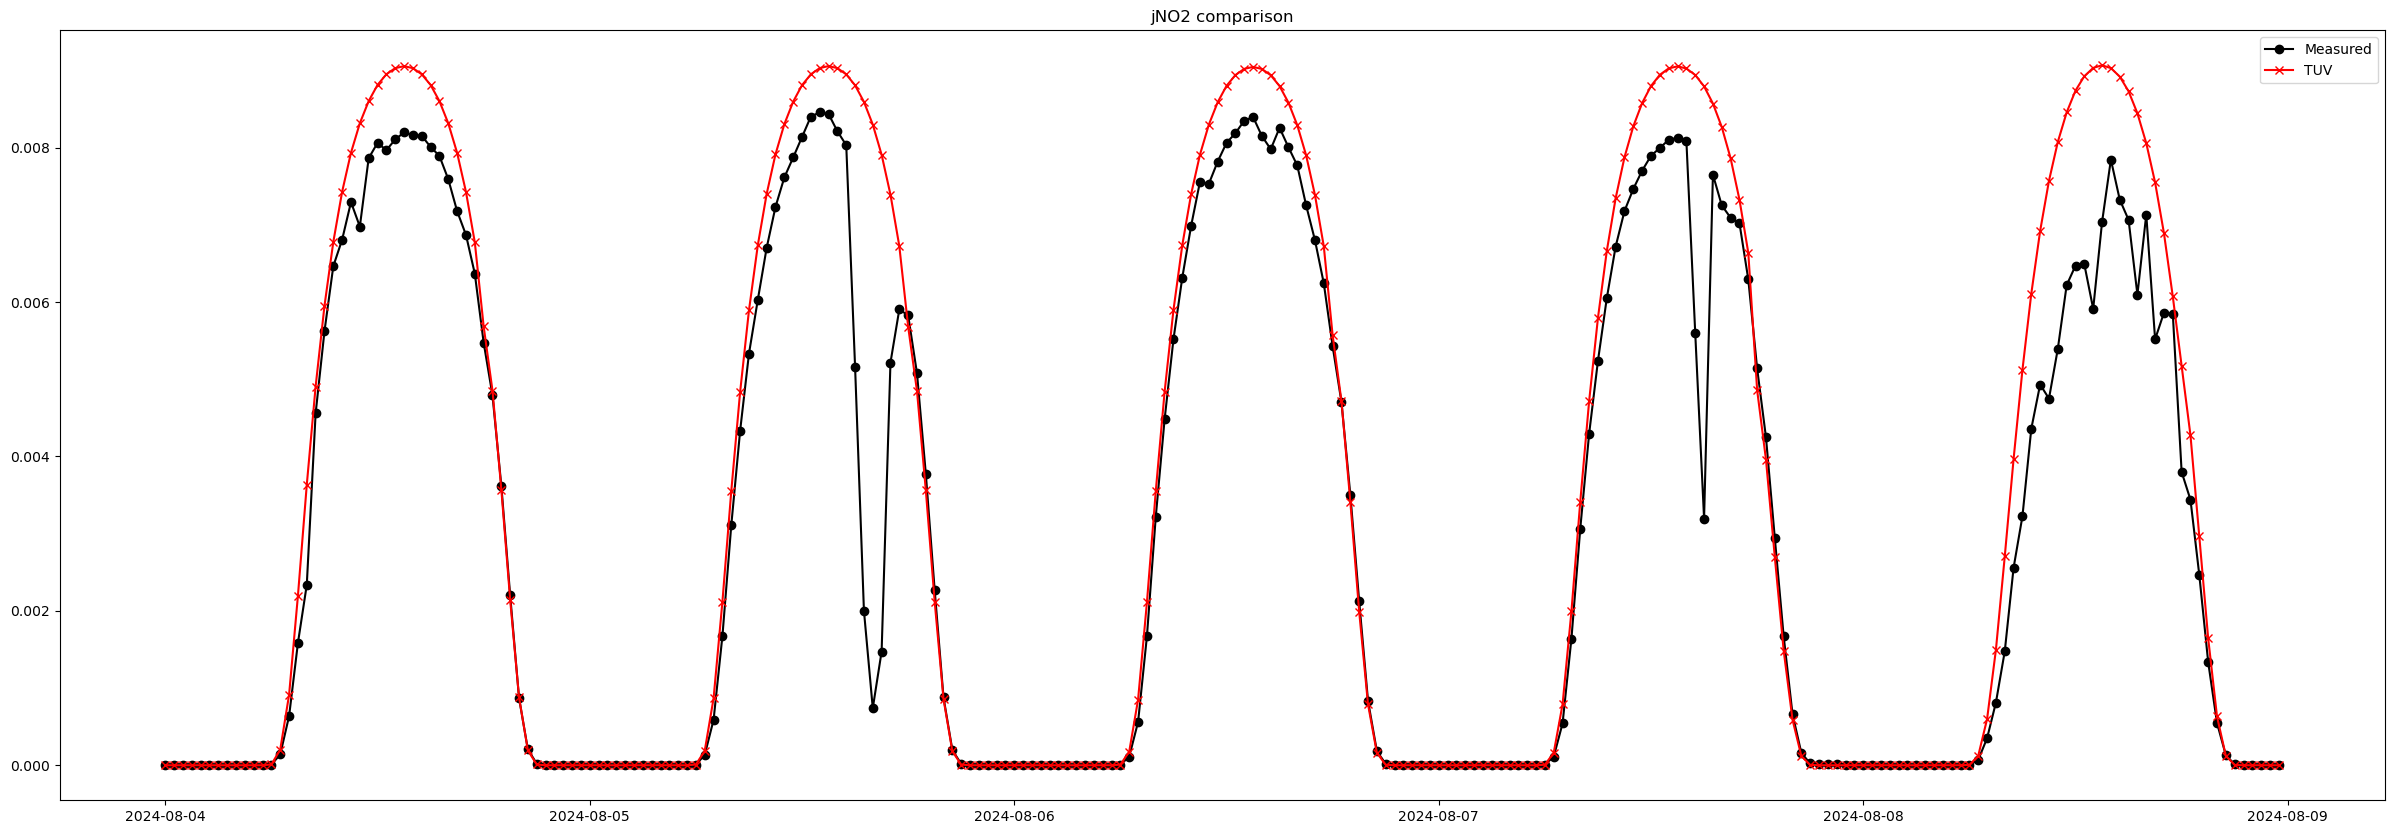

In [39]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_interp.index, df_interp['jNO2_meas'], color='k', marker='o',label='Measured')
plt.plot(df_interp.index, df_interp['jNO2'], color='r', marker='x', label='TUV')
plt.legend()
plt.title('jNO2 comparison')

Text(0.5, 1.0, 'NO2 observed, TUV, and ratio')

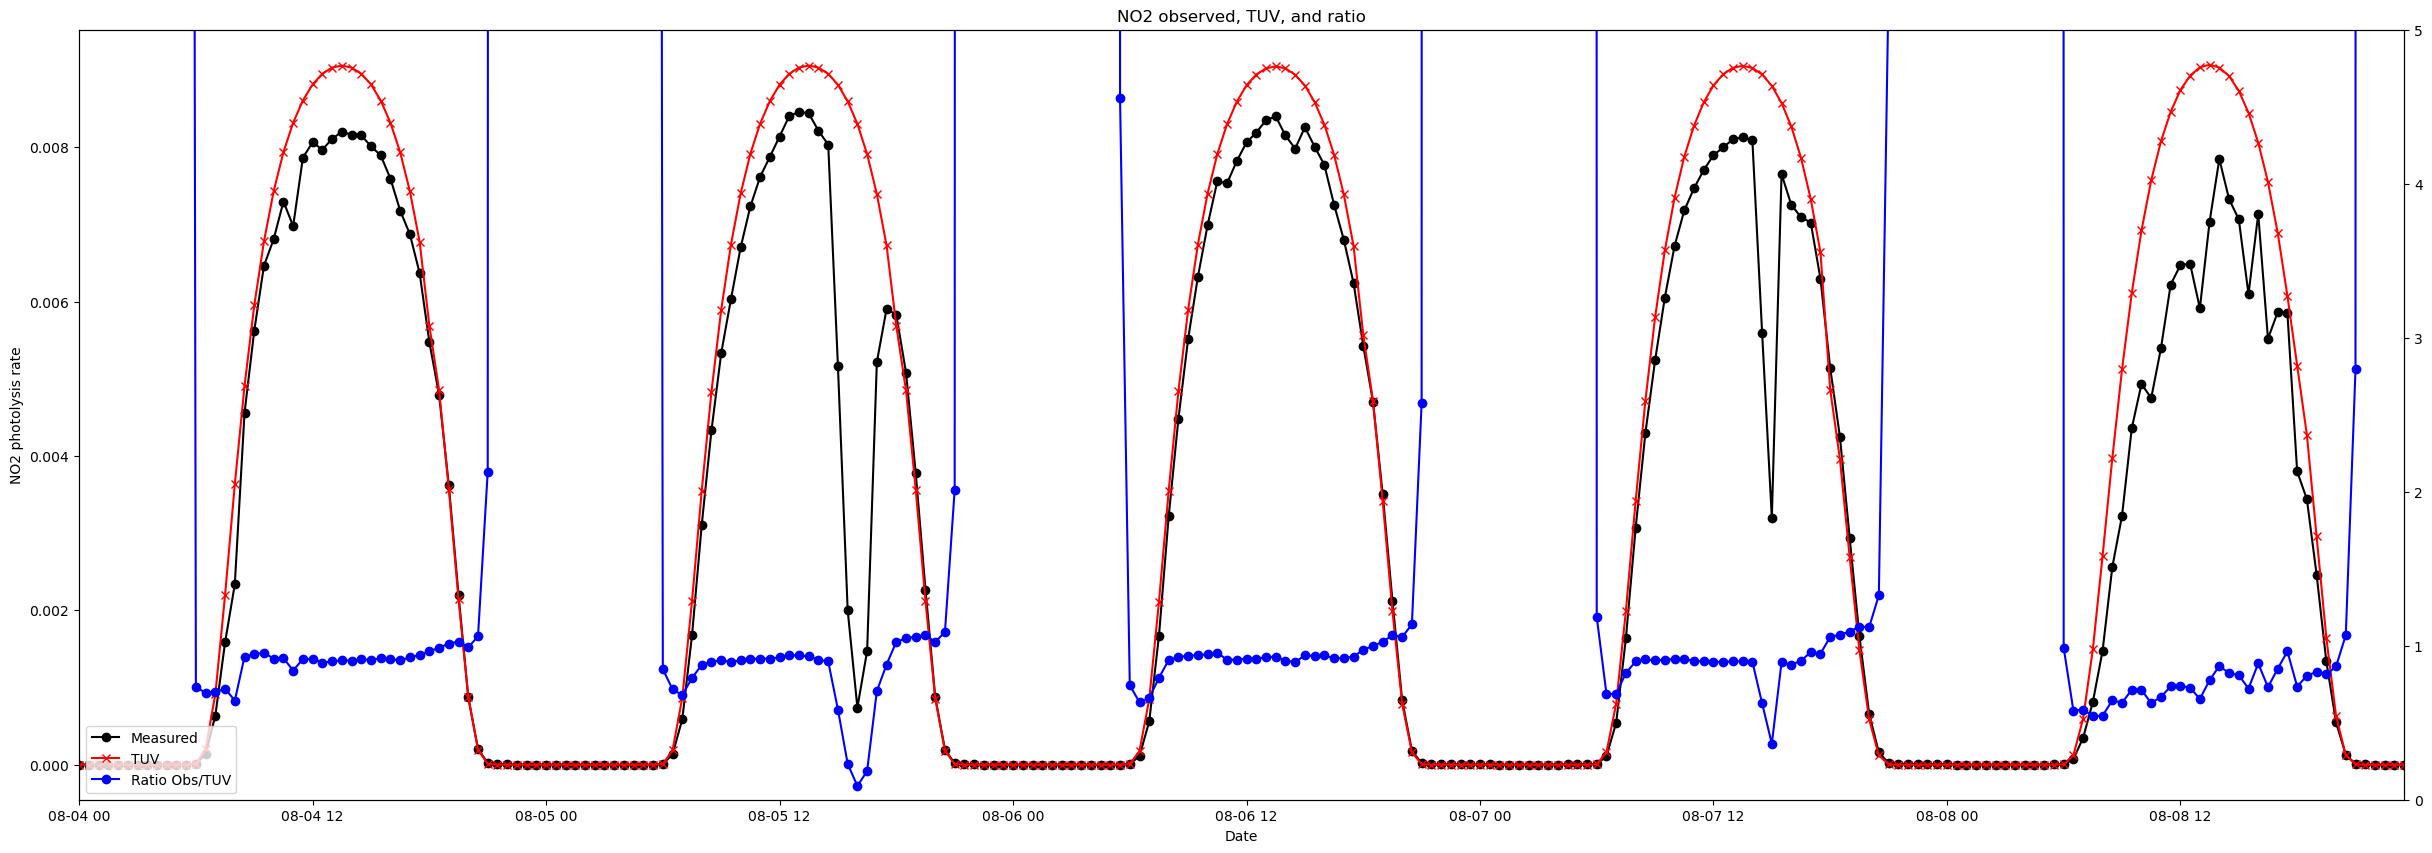

In [104]:
fig, ax1 = plt.subplots(figsize = (30,10))

ax1.margins(x=0)

ax1.plot(df_interp.index, df_interp['jNO2_meas'], color='k', marker='o',label='Measured')
ax1.plot(df_interp.index, df_interp['jNO2'], color='r', marker='x', label='TUV')
ax1.set_ylabel('NO2 photolysis rate')
ax1.set_xlabel('Date')

ax2 = ax1.twinx() 
ax2.margins(x=0)
ax2.plot(df_interp.index, df_interp['jNO2_meas']/df_interp['jNO2'], color='b', marker='o',label='Ratio Obs/TUV')
ax2.set_ylim(0,5)
#ax2.set_axis_off()
# ozone_ticks_30min = []
# for ozone_tick_30min_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
#     ozone_ticks_30min.append(df_adjuststart_30min_ozone.index[ozone_tick_30min_idx])
#ax2.set_xticks(ozone_ticks_30min)
#ax2.set_xticklabels(df_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)
#ax2.set_ylabel('Ozone (ppbv)')


# midnight_vals_30min = []
# for midnight_idx_30min in range(16,len(df_adjuststart_30min_ozone.index),48):
#     midnight_vals_30min.append(df_adjuststart_30min_ozone.index[midnight_idx_30min])
# for day_pos_30min in midnight_vals_30min:
#     ax2.axvline(day_pos_30min, color = 'black')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('NO2 observed, TUV, and ratio')

Text(0.5, 1.0, 'NO2 observed, TUV, and ratio')

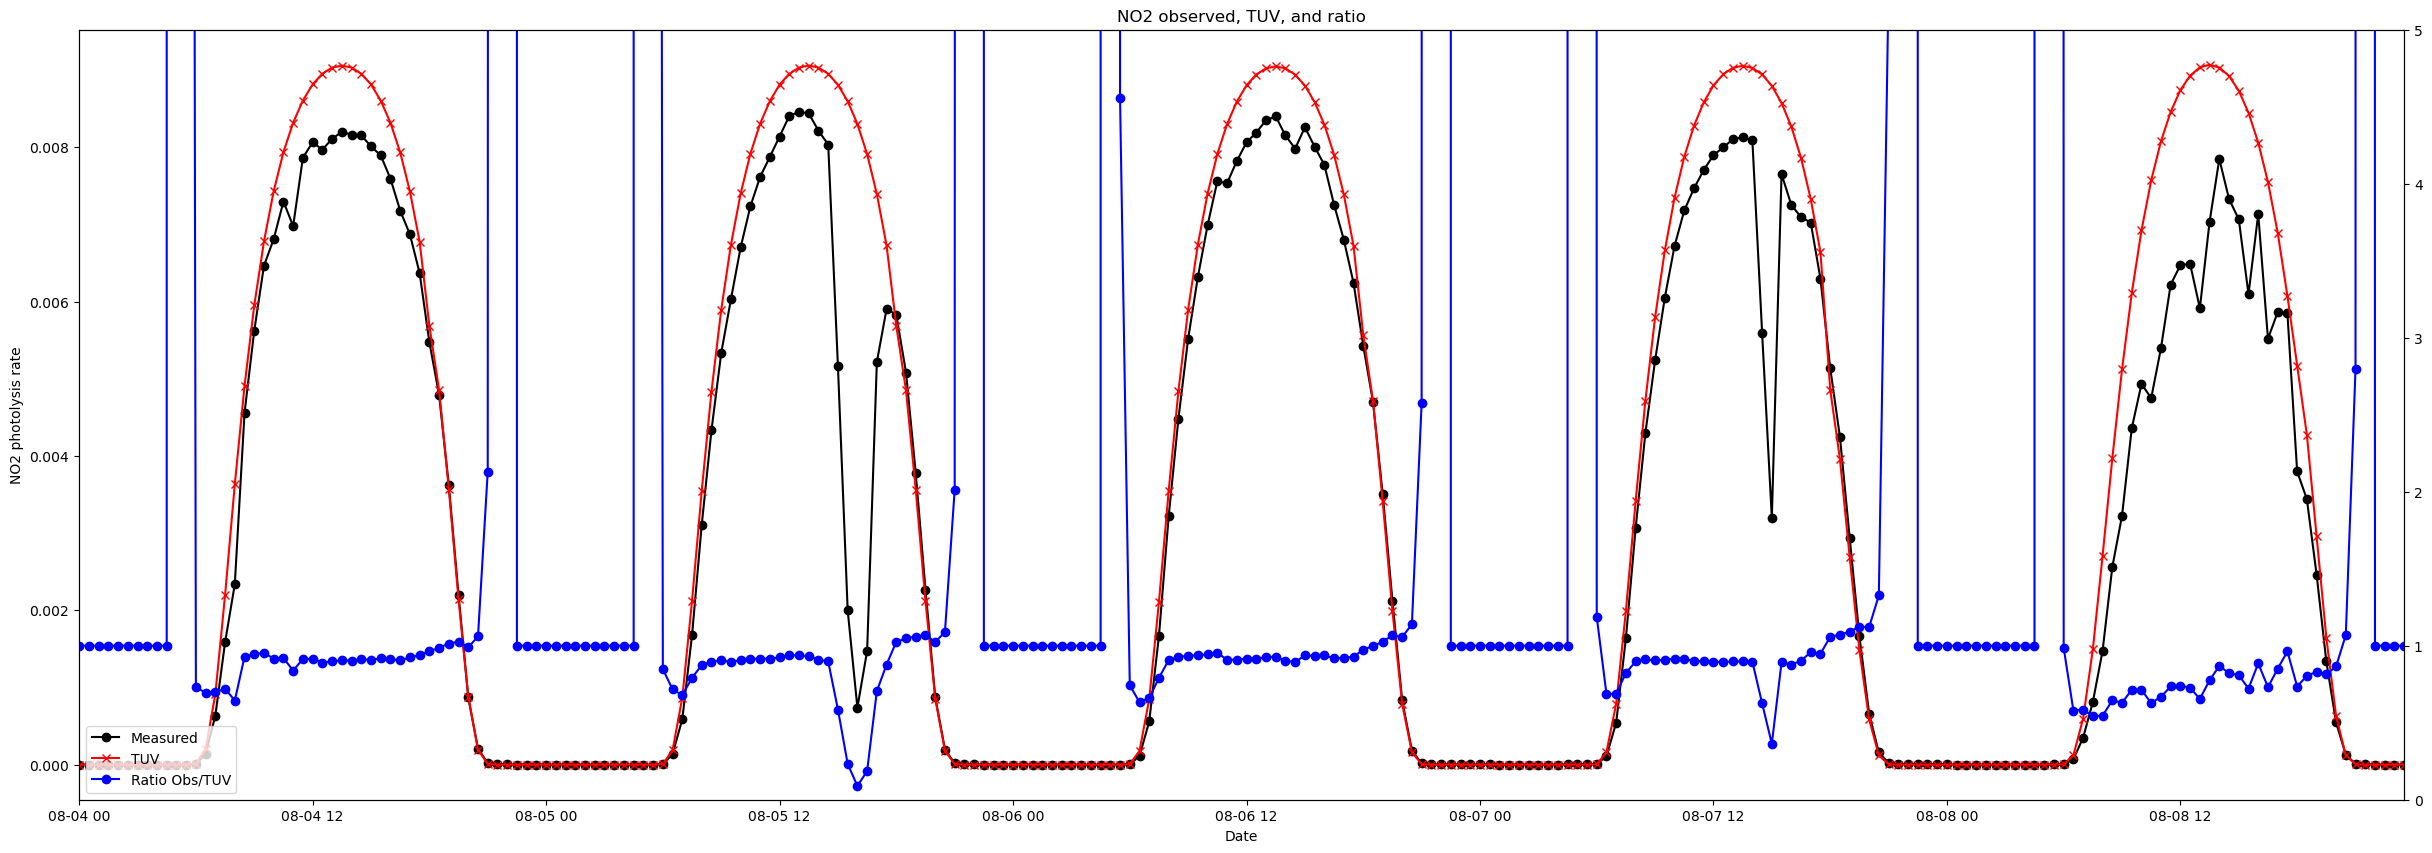

In [75]:
fig, ax1 = plt.subplots(figsize = (30,10))

ax1.margins(x=0)

ax1.plot(df_interp.index, df_interp['jNO2_meas'], color='k', marker='o',label='Measured')
ax1.plot(df_interp.index, df_interp['jNO2'], color='r', marker='x', label='TUV')
ax1.set_ylabel('NO2 photolysis rate')
ax1.set_xlabel('Date')

ax2 = ax1.twinx() 
ax2.margins(x=0)
ax2.plot(df_interp.index, df_ratio, color='b', marker='o',label='Ratio Obs/TUV')
ax2.set_ylim(0,5)
#ax2.set_axis_off()
# ozone_ticks_30min = []
# for ozone_tick_30min_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
#     ozone_ticks_30min.append(df_adjuststart_30min_ozone.index[ozone_tick_30min_idx])
#ax2.set_xticks(ozone_ticks_30min)
#ax2.set_xticklabels(df_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)
#ax2.set_ylabel('Ozone (ppbv)')


# midnight_vals_30min = []
# for midnight_idx_30min in range(16,len(df_adjuststart_30min_ozone.index),48):
#     midnight_vals_30min.append(df_adjuststart_30min_ozone.index[midnight_idx_30min])
# for day_pos_30min in midnight_vals_30min:
#     ax2.axvline(day_pos_30min, color = 'black')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('NO2 observed, TUV, and ratio')

In [50]:
df_ratio.values

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 7.08130138e+06, 3.45130951e+01,
       7.30883236e-01, 6.94314908e-01, 6.97388212e-01, 7.21650608e-01,
       6.43488993e-01, 9.29021050e-01, 9.44909893e-01, 9.53605842e-01,
       9.16409044e-01, 9.19328262e-01, 8.39014278e-01, 9.13982006e-01,
       9.14852808e-01, 8.90081802e-01, 8.97763801e-01, 9.05243409e-01,
       9.03900681e-01, 9.10884817e-01, 9.08933950e-01, 9.17447060e-01,
       9.12884106e-01, 9.04854206e-01, 9.25009851e-01, 9.40001876e-01,
       9.62883916e-01, 9.87475826e-01, 1.01356959e+00, 1.02714280e+00,
       9.89368174e-01, 1.06071264e+00, 2.13071940e+00, 1.88839882e+02,
       8.39357614e+07, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [51]:
print(df_ratio)

time_local
2024-08-04 00:00:00      1.000000
2024-08-04 00:30:00      1.000000
2024-08-04 01:00:00      1.000000
2024-08-04 01:30:00      1.000000
2024-08-04 02:00:00      1.000000
                          ...    
2024-08-08 21:30:00    524.871828
2024-08-08 22:00:00      1.000000
2024-08-08 22:30:00      1.000000
2024-08-08 23:00:00      1.000000
2024-08-08 23:30:00      1.000000
Length: 240, dtype: float64


In [83]:
df_ratio.loc[df_ratio > 2]

time_local
2024-08-04 05:00:00    7.081301e+06
2024-08-04 05:30:00    3.451310e+01
2024-08-04 21:00:00    2.130719e+00
2024-08-04 21:30:00    1.888399e+02
2024-08-04 22:00:00    8.393576e+07
2024-08-05 05:00:00    7.693411e+07
2024-08-05 05:30:00    4.099521e+01
2024-08-05 21:00:00    2.013400e+00
2024-08-05 21:30:00    1.962338e+02
2024-08-05 22:00:00    2.250324e+09
2024-08-06 05:00:00    1.993039e+08
2024-08-06 05:30:00    4.554149e+00
2024-08-06 21:00:00    2.574840e+00
2024-08-06 21:30:00    3.758573e+02
2024-08-06 22:00:00    1.051904e+12
2024-08-07 05:00:00    1.011418e+12
2024-08-07 05:30:00    4.586356e+02
2024-08-07 21:00:00    5.285534e+00
2024-08-07 21:30:00    1.846721e+03
2024-08-07 22:00:00    2.351335e+19
2024-08-08 05:00:00    7.373793e+16
2024-08-08 05:30:00    4.382670e+02
2024-08-08 21:00:00    2.795648e+00
2024-08-08 21:30:00    5.248718e+02
dtype: float64

In [88]:
df_ratio['2024-08-04 05:00:00']

np.float64(7081301.384964878)

In [92]:
print(df_interp['jNO2_meas']['2024-08-04 05:00:00'])
print(df_interp['jNO2']['2024-08-04 05:00:00'])

1.41137499834392e-06
1.993101157e-13


In [57]:
print(df_interp['jNO2_meas']/df_interp['jNO2'].values)

time_local
2024-08-04 00:00:00             inf
2024-08-04 00:30:00             inf
2024-08-04 01:00:00             inf
2024-08-04 01:30:00             inf
2024-08-04 02:00:00             inf
2024-08-04 02:30:00             inf
2024-08-04 03:00:00             inf
2024-08-04 03:30:00             inf
2024-08-04 04:00:00             inf
2024-08-04 04:30:00             inf
2024-08-04 05:00:00    7.081301e+06
2024-08-04 05:30:00    3.451310e+01
2024-08-04 06:00:00    7.308832e-01
2024-08-04 06:30:00    6.943149e-01
2024-08-04 07:00:00    6.973882e-01
2024-08-04 07:30:00    7.216506e-01
2024-08-04 08:00:00    6.434890e-01
2024-08-04 08:30:00    9.290210e-01
2024-08-04 09:00:00    9.449099e-01
2024-08-04 09:30:00    9.536058e-01
2024-08-04 10:00:00    9.164090e-01
2024-08-04 10:30:00    9.193283e-01
2024-08-04 11:00:00    8.390143e-01
2024-08-04 11:30:00    9.139820e-01
2024-08-04 12:00:00    9.148528e-01
2024-08-04 12:30:00    8.900818e-01
2024-08-04 13:00:00    8.977638e-01
2024-08-04 13:30:

In [94]:
print(df_interp['jNO2']['2024-08-04 05:30:00'])
print(df_interp['jNO2']['2024-08-04 04:30:00'])

3.645072388942947e-08
0.0
